## CelebFaces Attributes - Ünlülerin Özellikleri

In [1]:
import pandas as pd

attr_df = pd.read_csv("C:/Users/Sena/Desktop/SenaVeİlayda/list_attr_celeba.csv")
bbox_df = pd.read_csv("C:/Users/Sena/Desktop/SenaVeİlayda/list_bbox_celeba.csv")
eval_partition_df = pd.read_csv("C:/Users/Sena/Desktop/SenaVeİlayda/list_eval_partition.csv")
landmarks_df = pd.read_csv("C:/Users/Sena/Desktop/SenaVeİlayda/list_landmarks_align_celeba.csv")

In [3]:
# MISSING DATA CHECK-EKSİK VERİ KONTROLÜ
attr_df.isnull().sum()
bbox_df.isnull().sum()
eval_partition_df.isnull().sum()
landmarks_df.isnull().sum()

image_id        0
lefteye_x       0
lefteye_y       0
righteye_x      0
righteye_y      0
nose_x          0
nose_y          0
leftmouth_x     0
leftmouth_y     0
rightmouth_x    0
rightmouth_y    0
dtype: int64

In [5]:
from PIL import Image
import os
import numpy as np

In [7]:
img_folder = "C:/Users/Sena/Desktop/SenaVeİlayda/img_align_celeba"
# VISUAL PRE-PROCCESSING OPERATIONS - GÖRSEL ÖN İŞLEME İŞLEMLERİ
for img_name in os.listdir(img_folder):
    img_path = os.path.join(img_folder, img_name)
    img = Image.open(img_path)

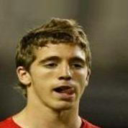

In [9]:
img = img.resize((128,128))  # SIZING - BOYUTLANDIRMA
img

In [11]:
img_array = np.array(img) / 255.0  # NORMALIZATION - NORMALİZASYON

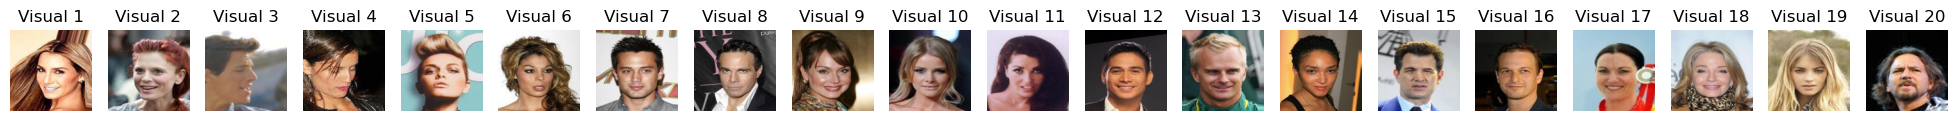

In [13]:
import matplotlib.pyplot as plt

img_folder = "C:/Users/Sena/Desktop/SenaVeİlayda/img_align_celeba"

# GET LIST OF IMAGE FILES
img_files = [f for f in os.listdir(img_folder) if f.endswith('.jpg')]

num_images_to_show = 20 

plt.figure(figsize=(25, 25))

for i, img_file in enumerate(img_files[:num_images_to_show]):
    img_path = os.path.join(img_folder, img_file)
    img = Image.open(img_path)
    img = img.resize((128, 128))  
    img_array = np.array(img) / 255.0  
    
    plt.subplot(1, num_images_to_show, i + 1)
    plt.imshow(img_array)
    plt.title(f'Visual {i+1}')
    plt.axis('off')

plt.show()

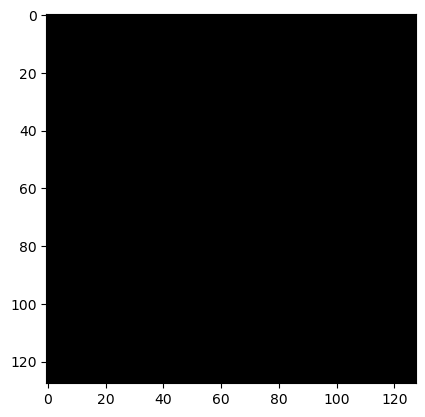

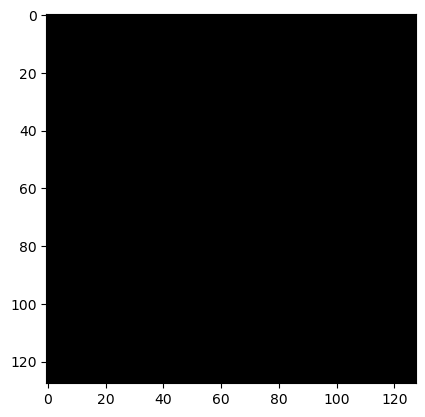

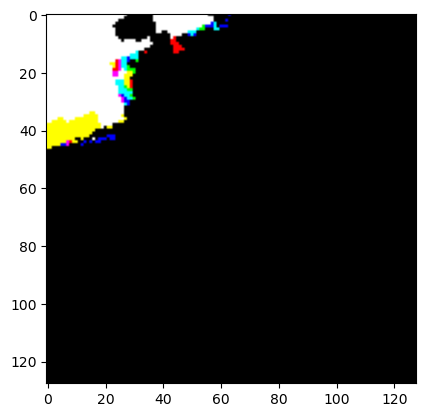

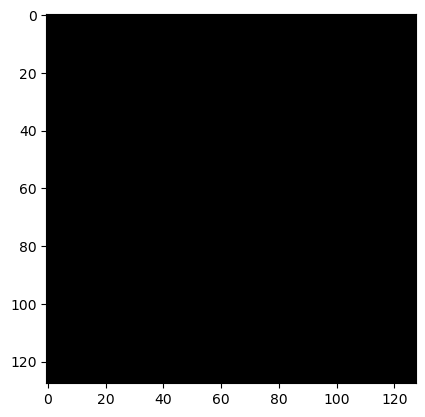

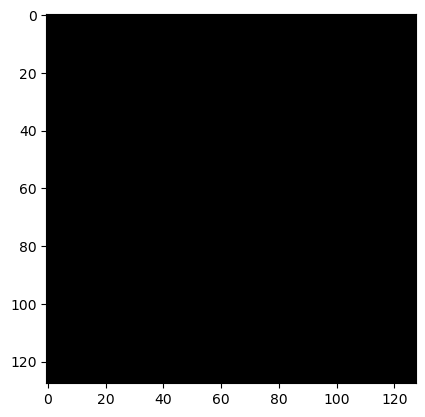

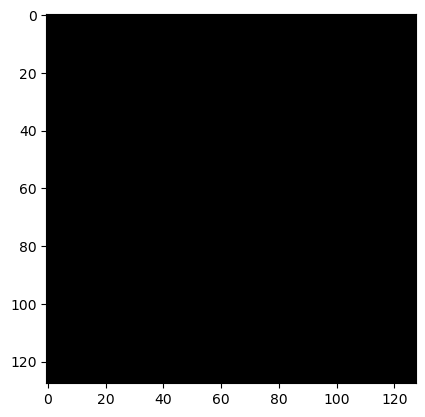

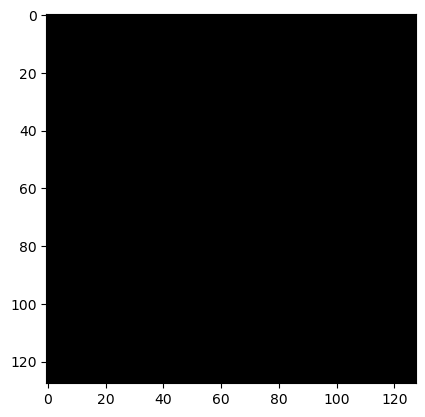

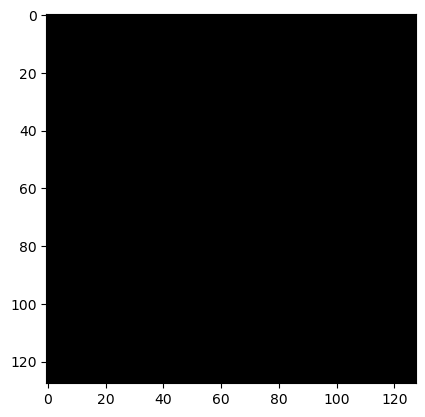

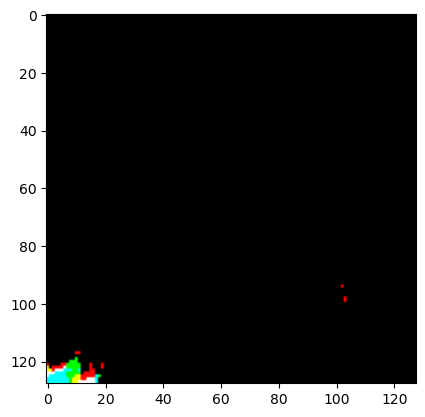

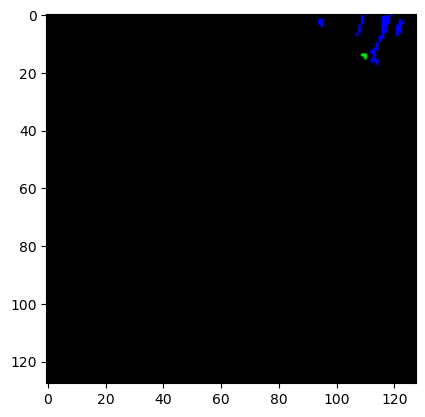

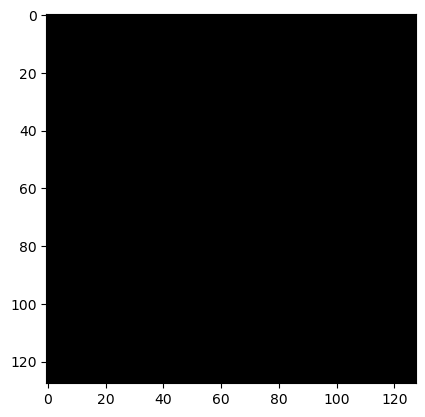

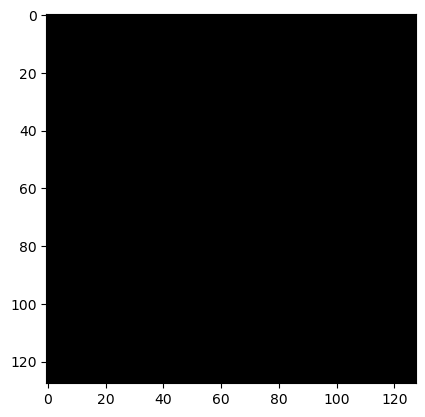

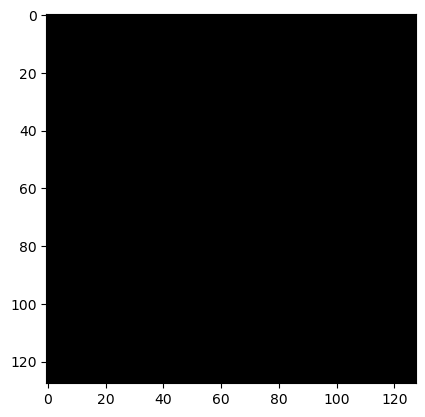

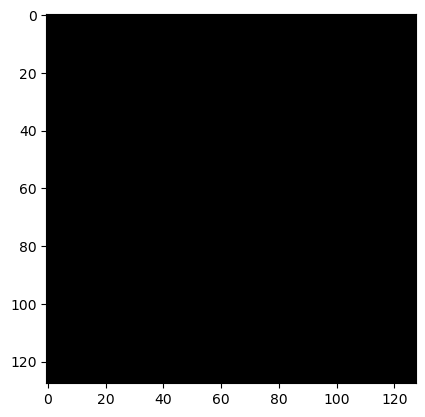

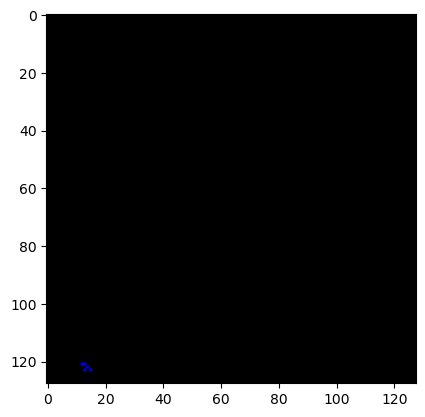

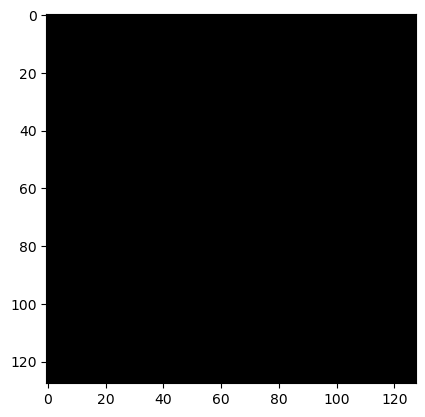

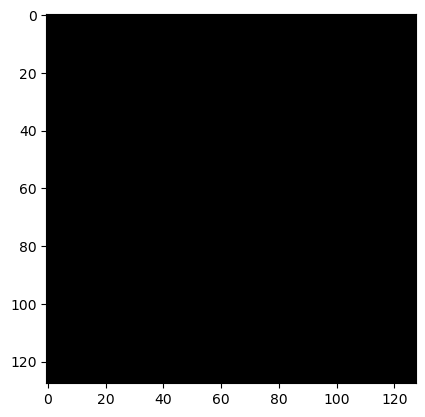

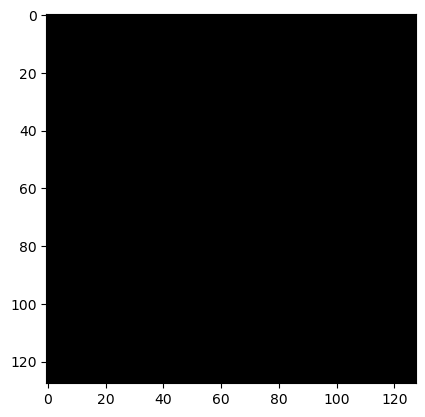

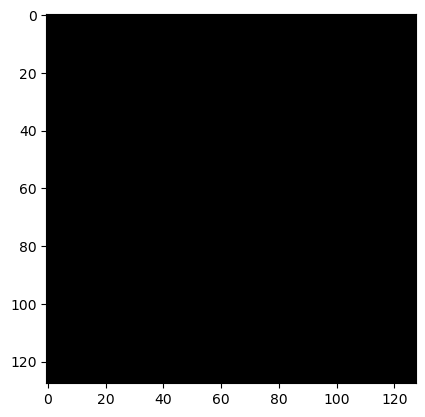

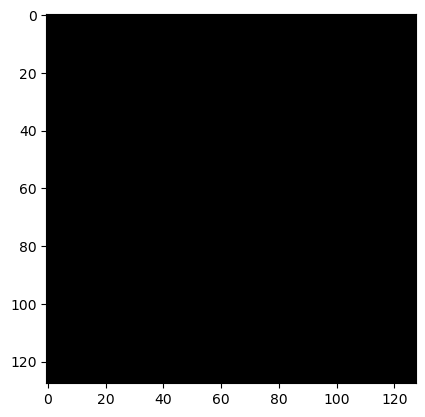

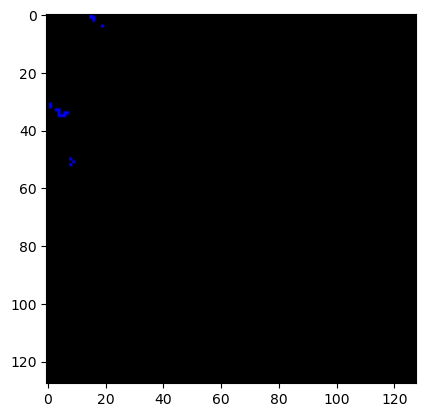

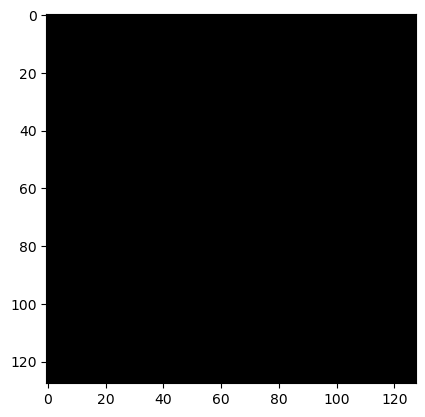

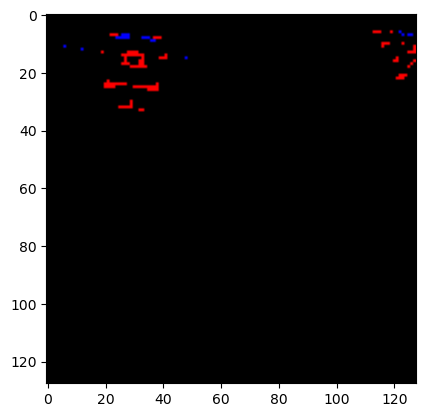

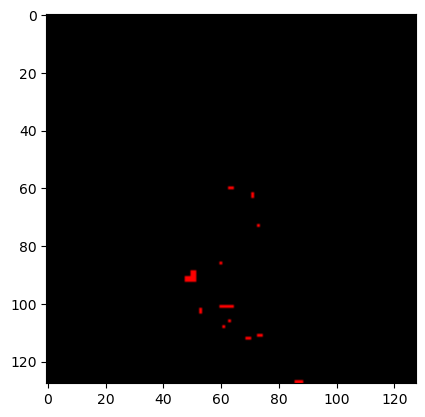

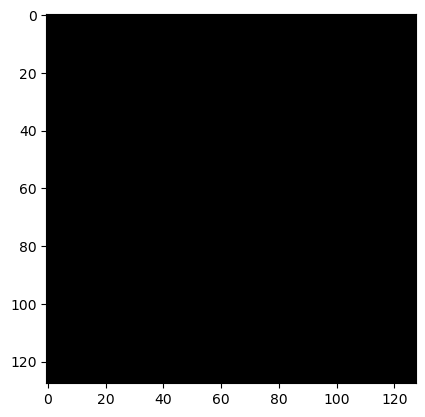

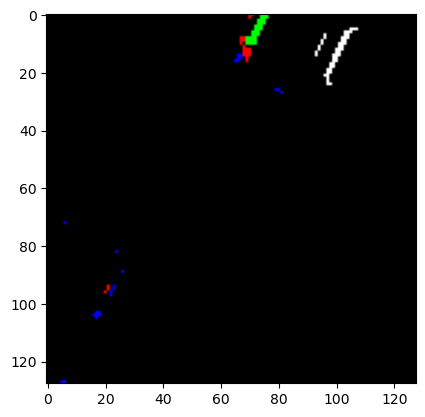

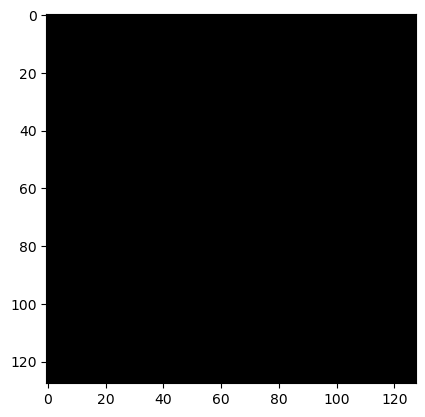

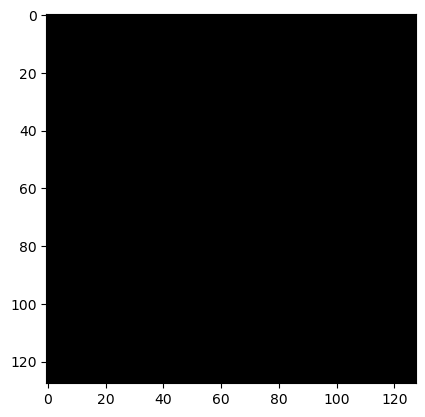

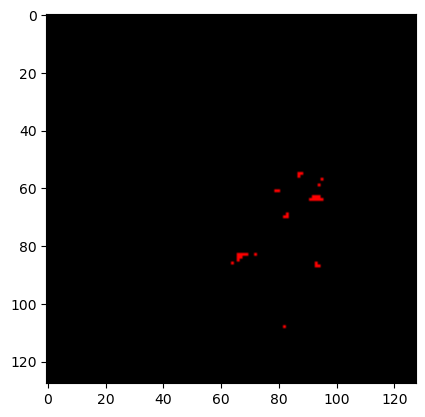

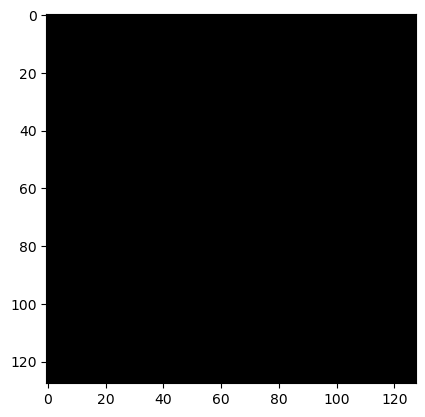

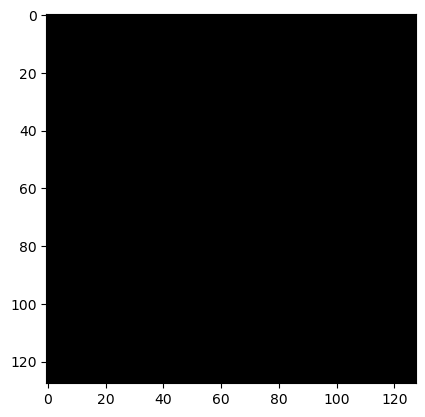

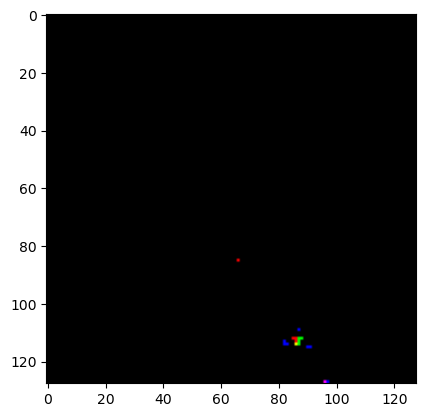

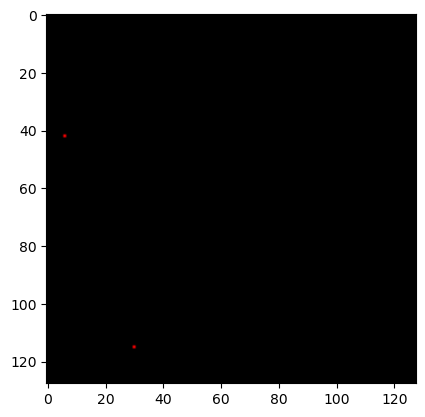

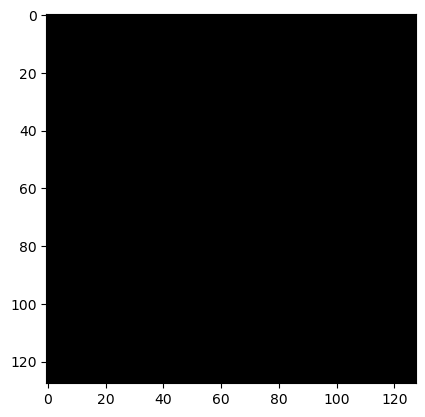

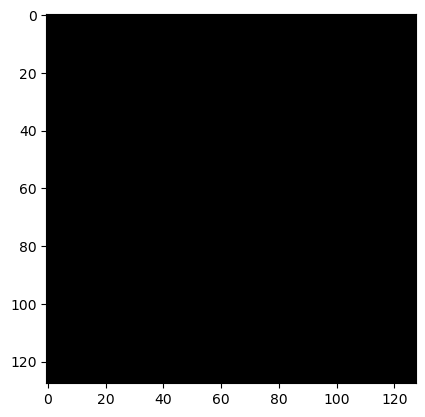

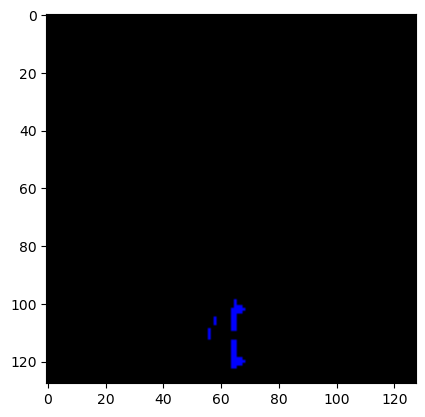

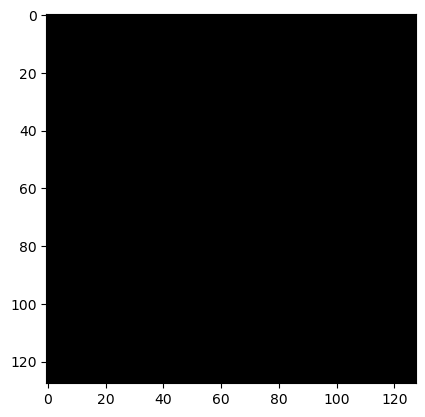

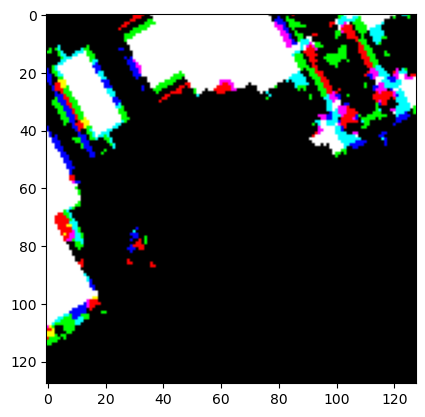

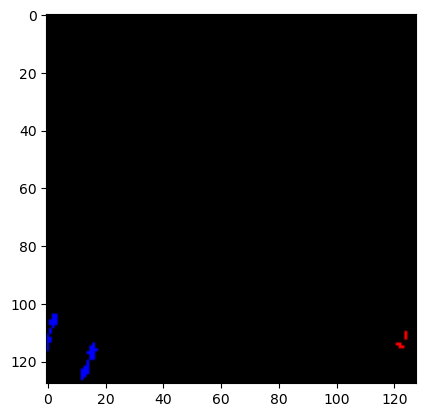

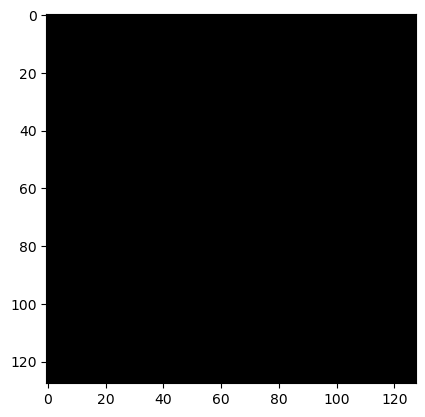

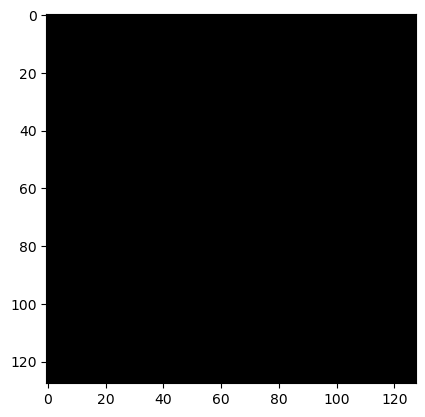

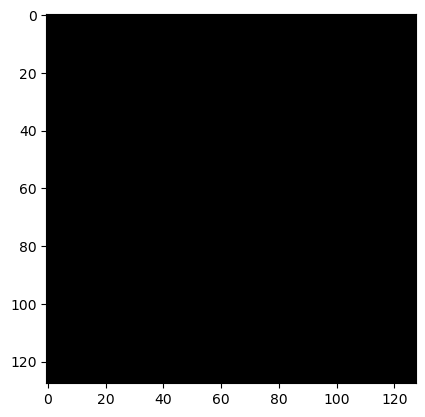

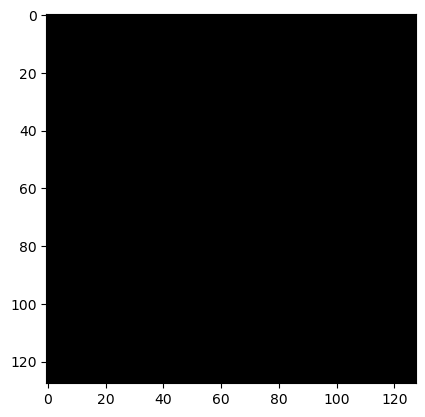

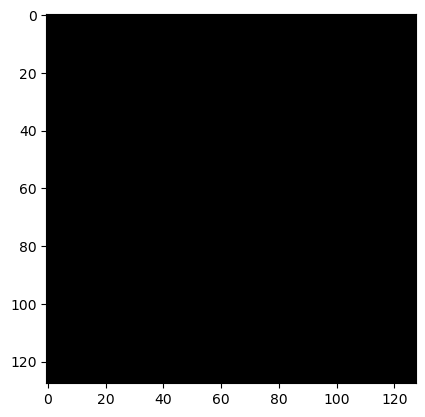

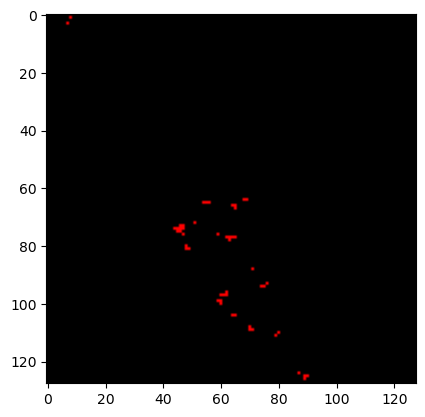

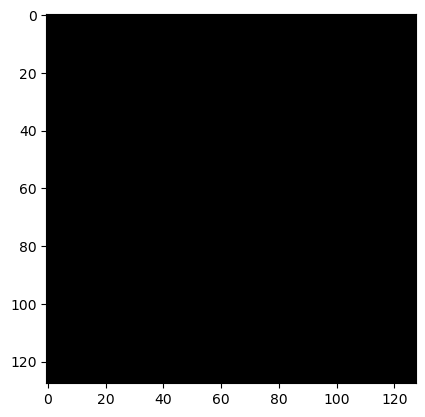

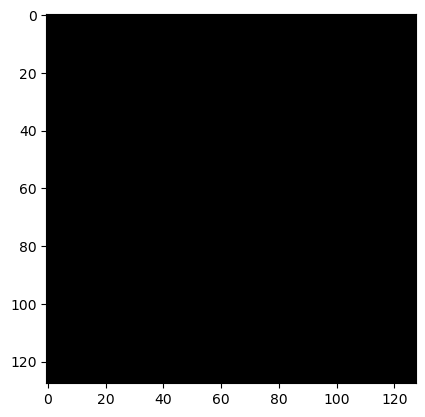

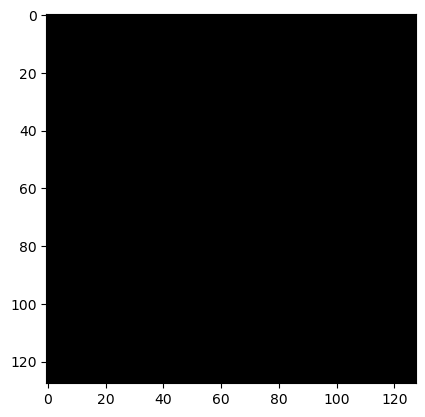

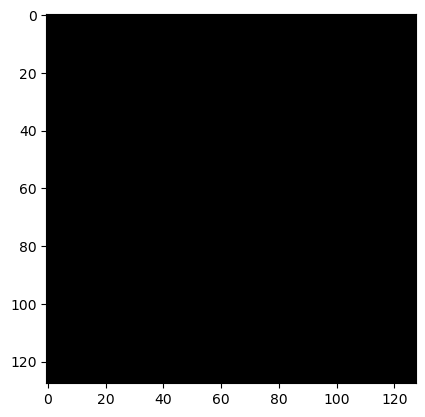

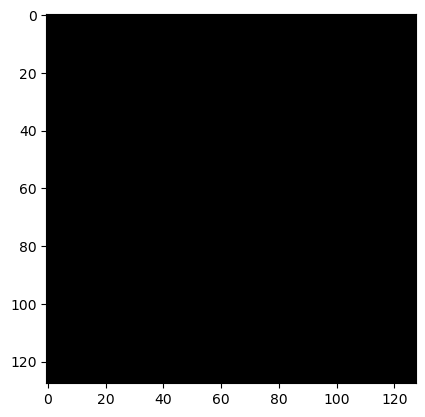

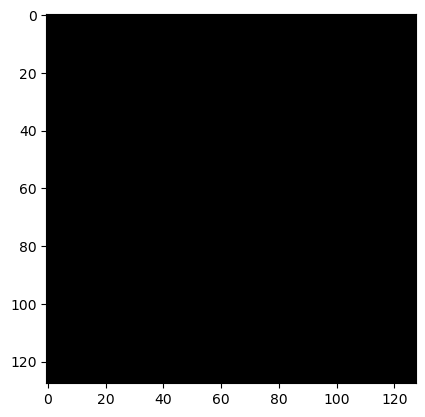

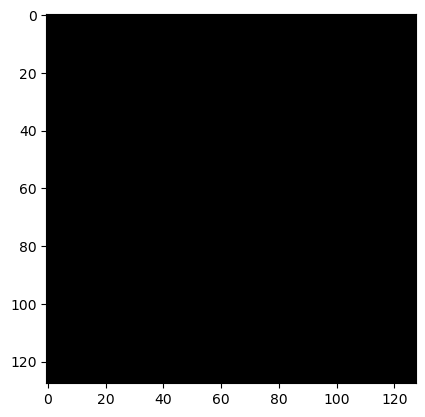

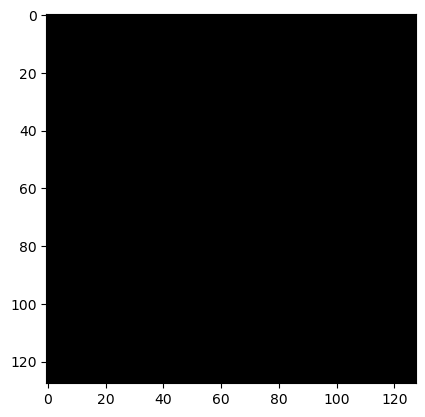

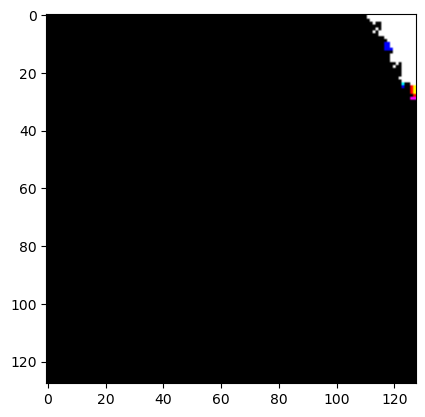

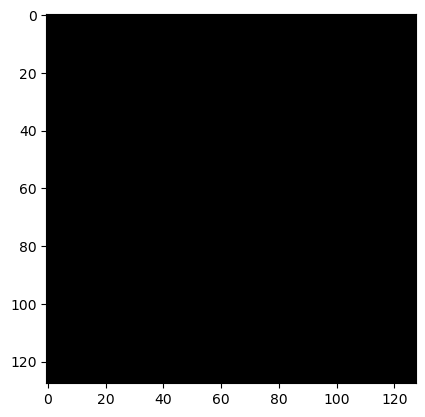

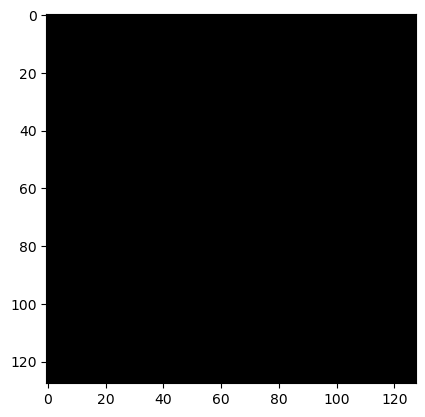

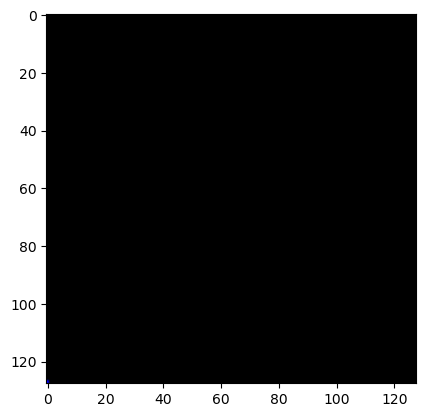

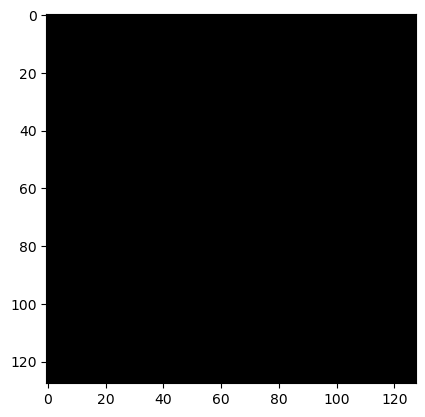

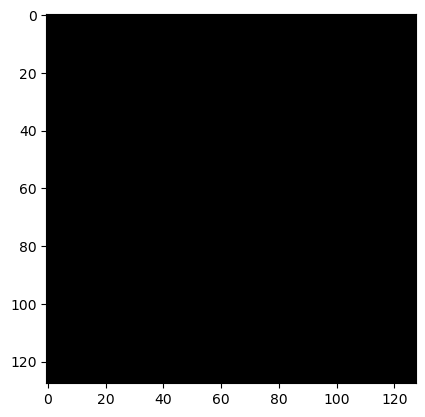

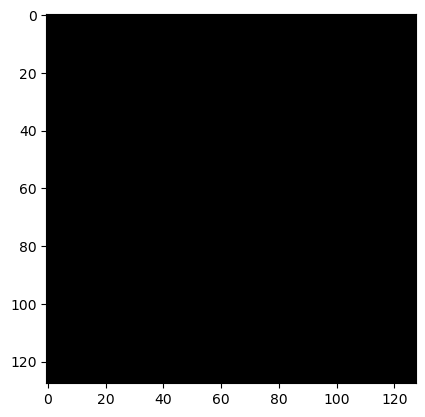

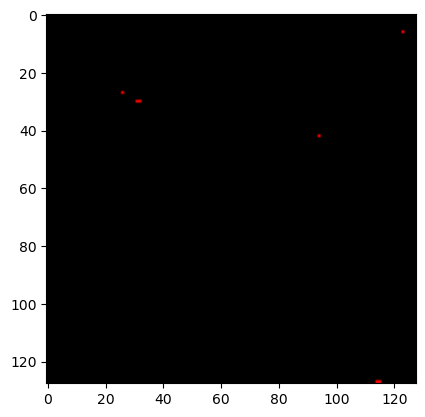

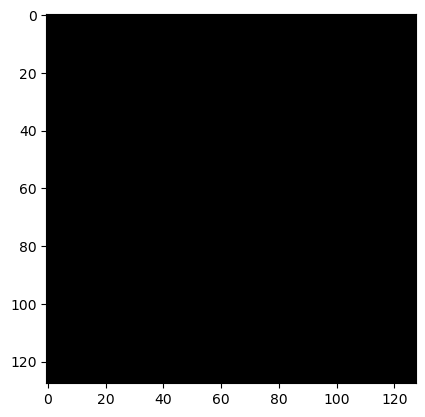

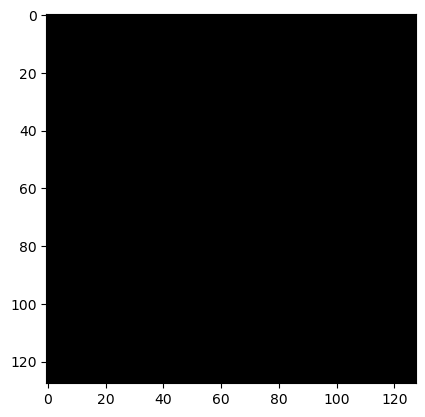

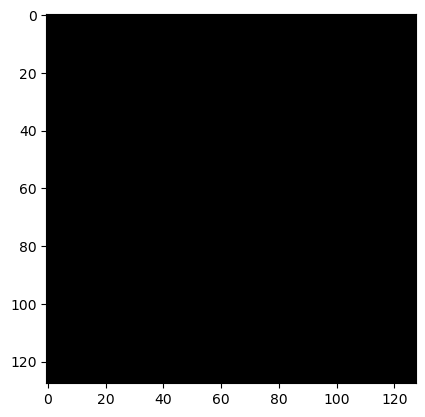

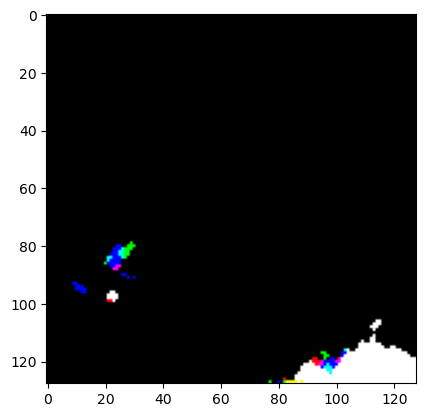

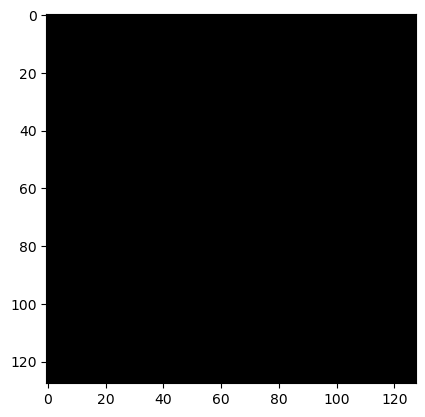

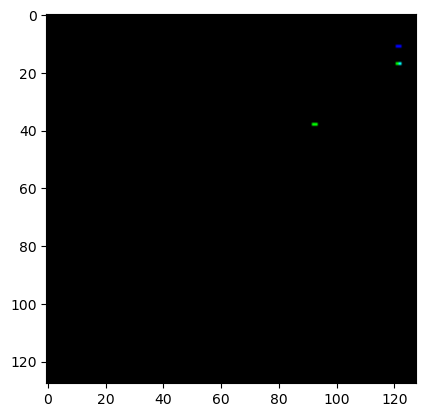

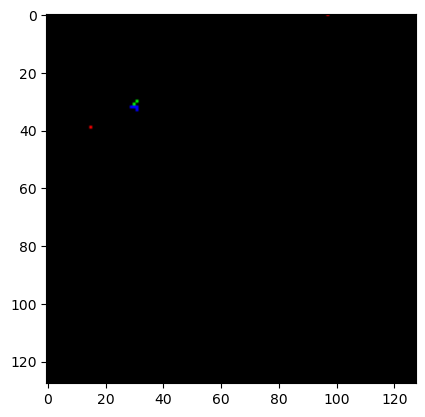

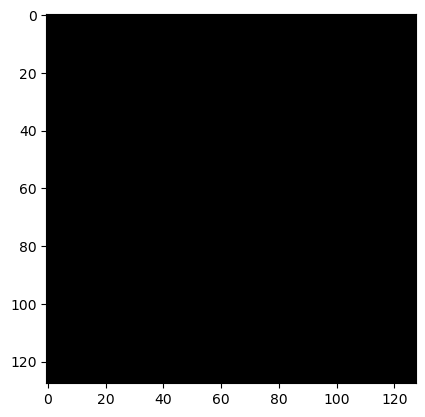

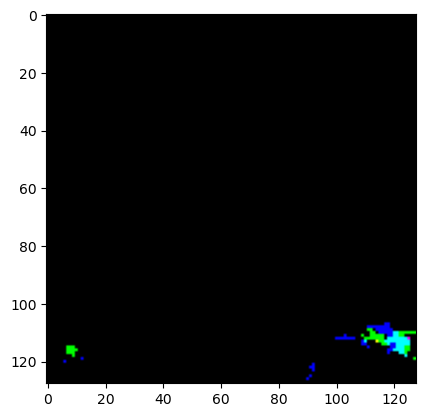

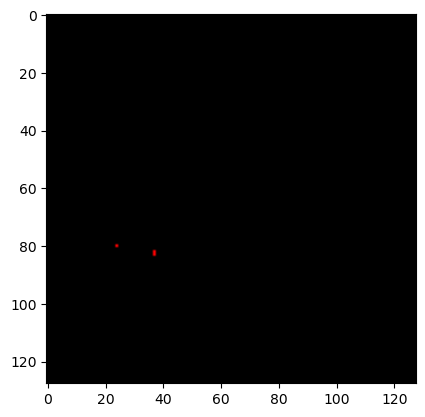

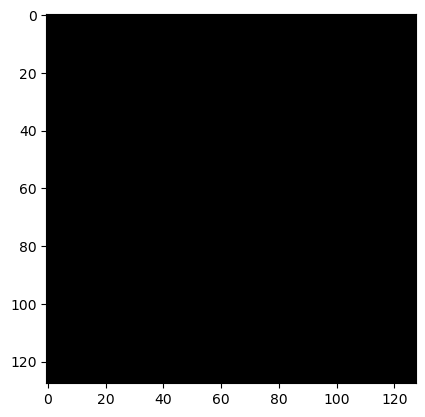

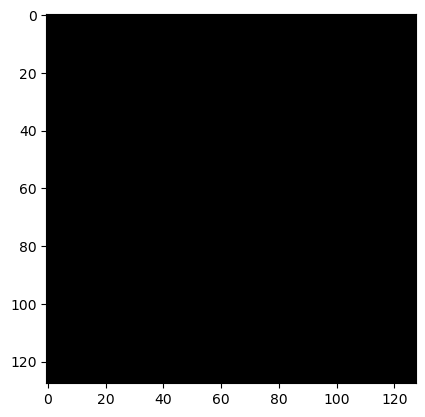

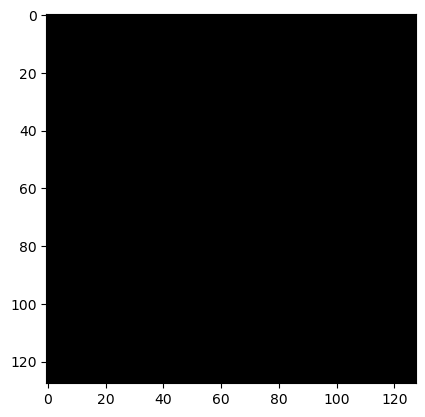

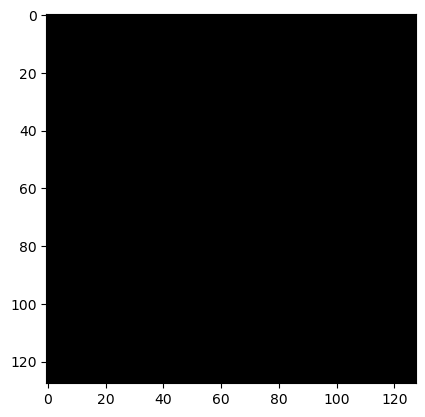

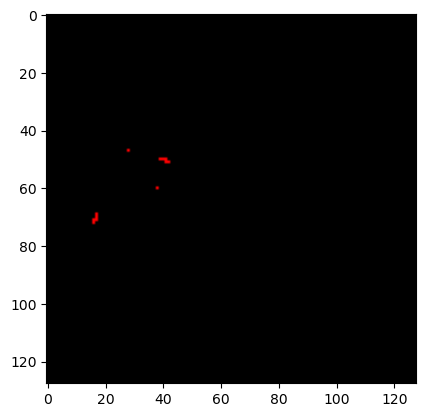

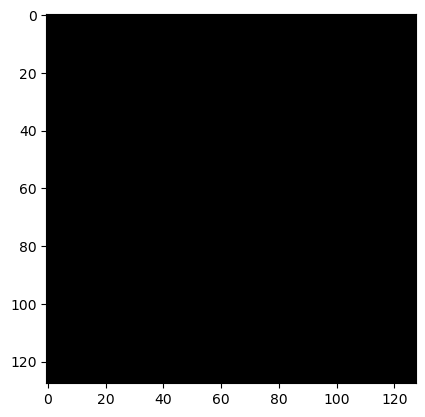

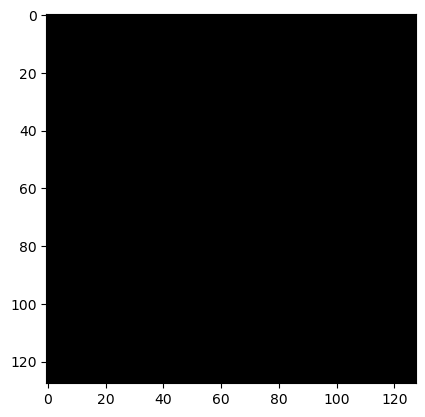

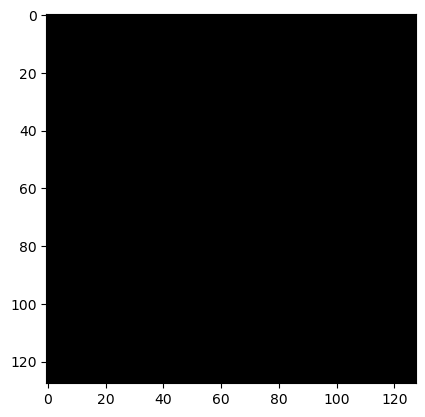

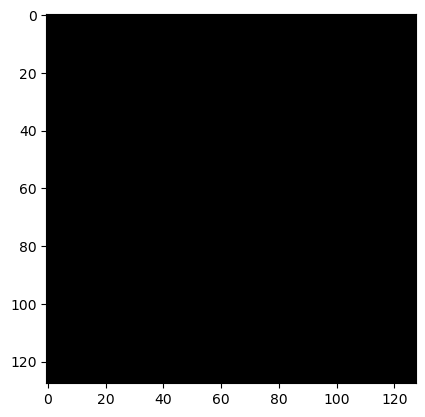

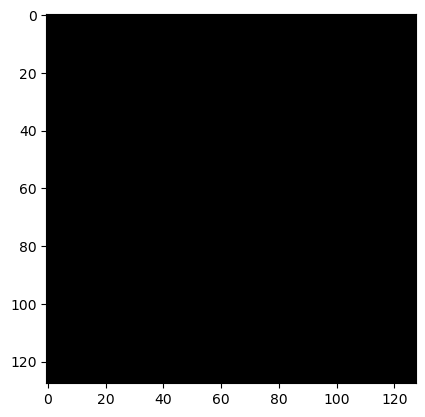

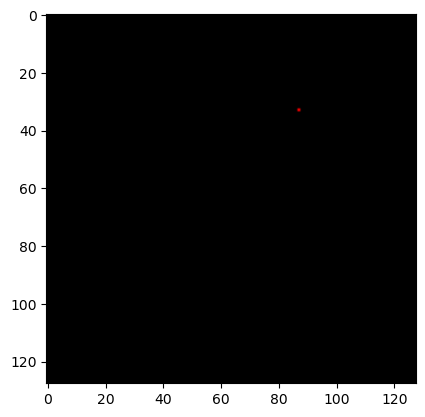

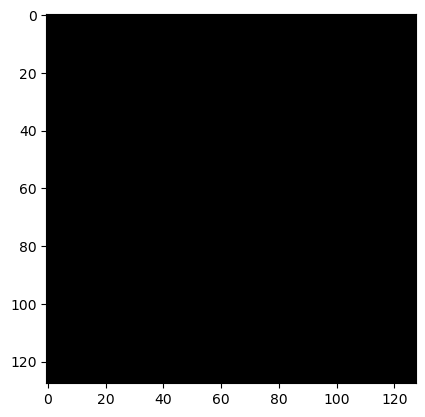

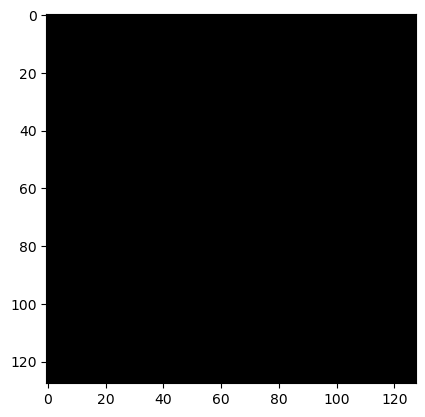

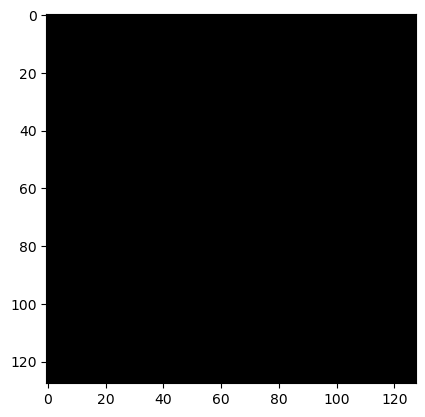

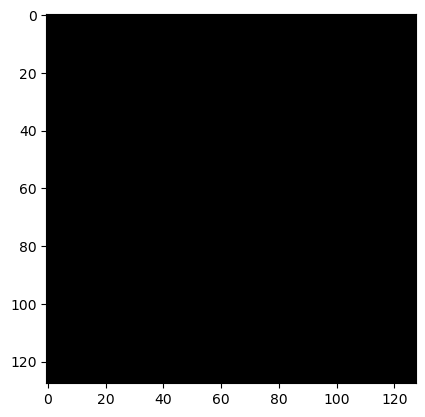

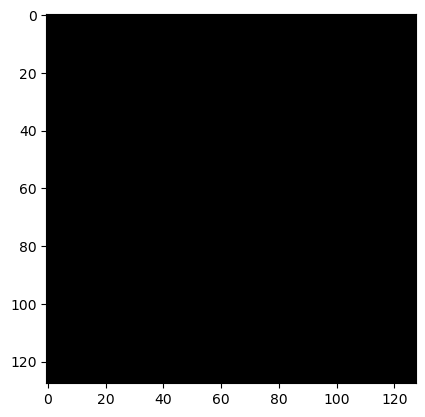

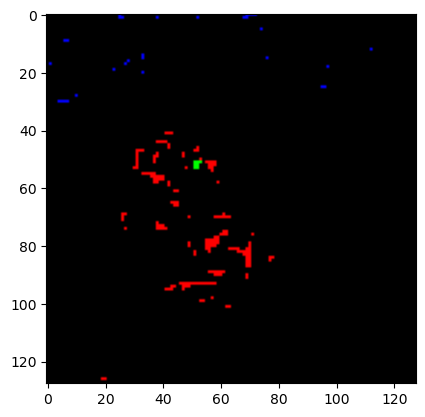

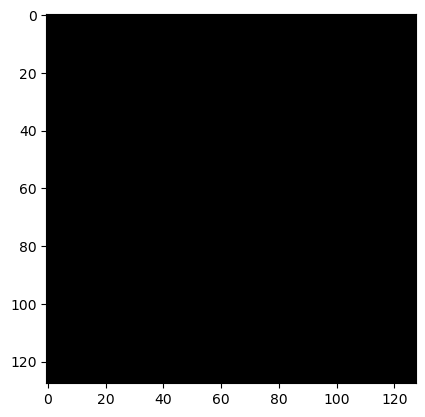

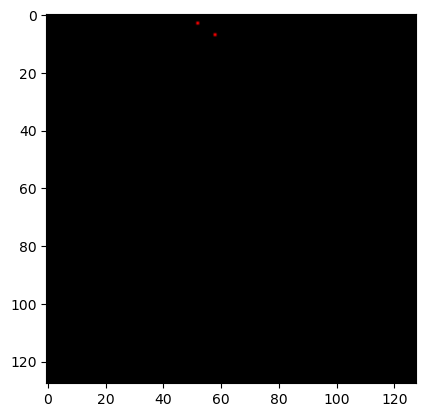

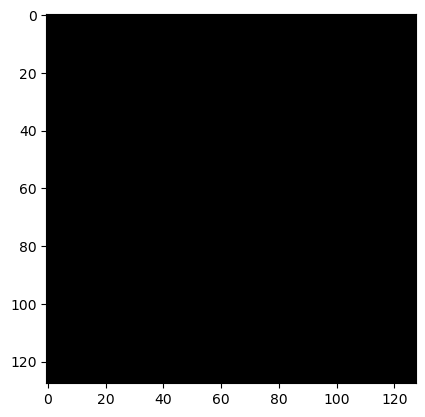

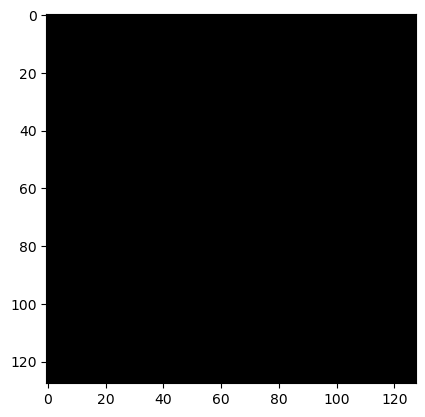

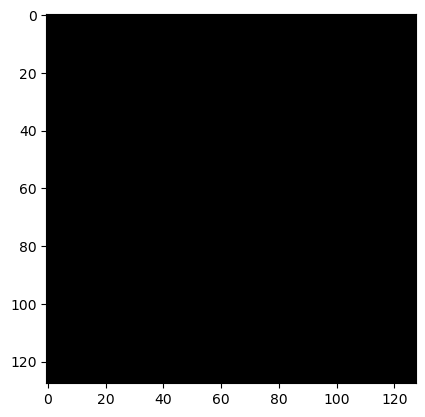

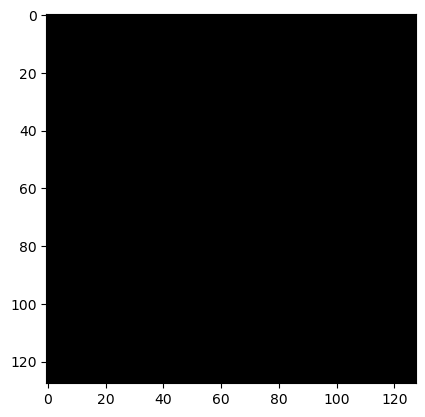

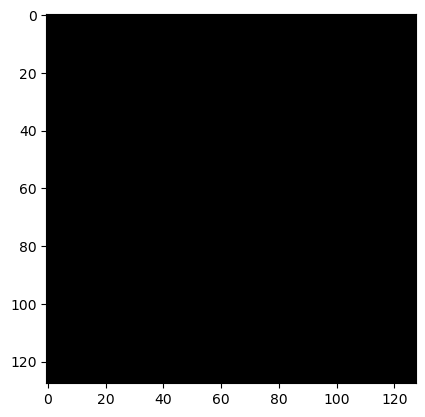

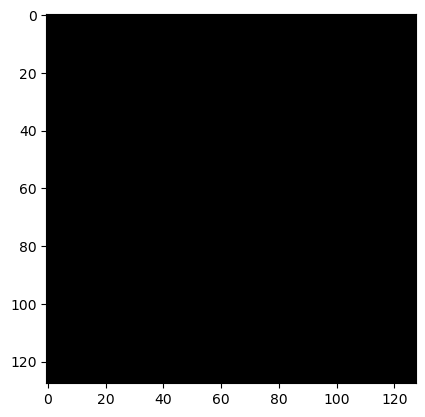

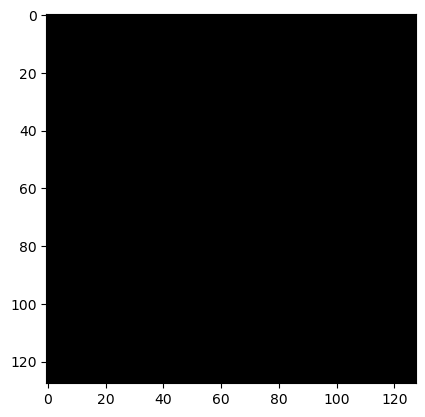

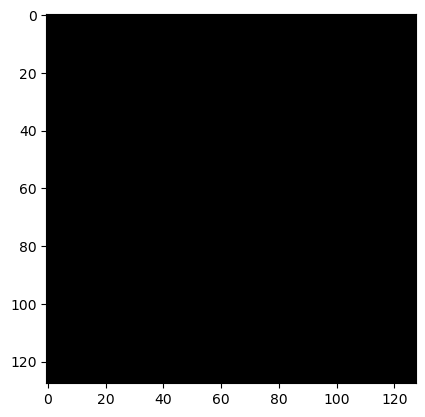

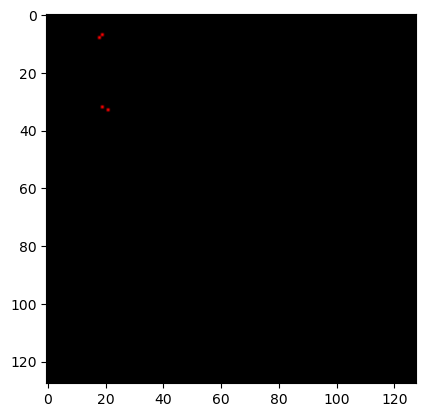

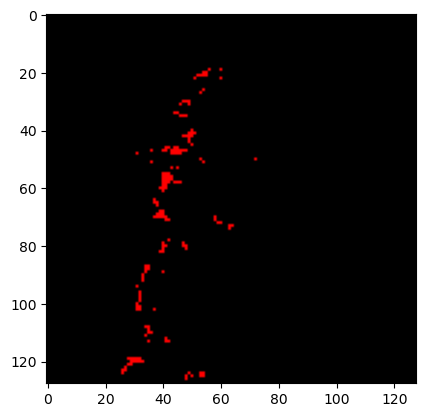

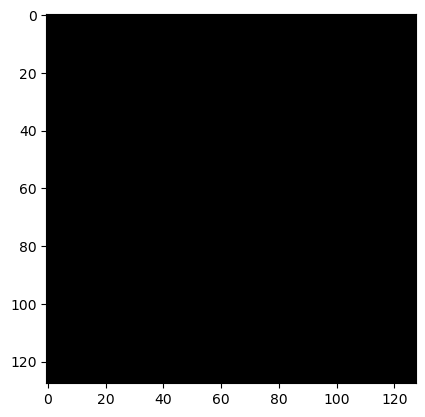

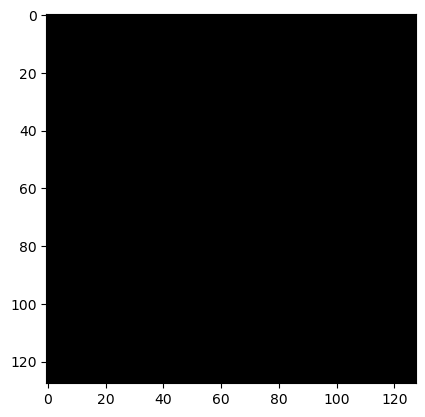

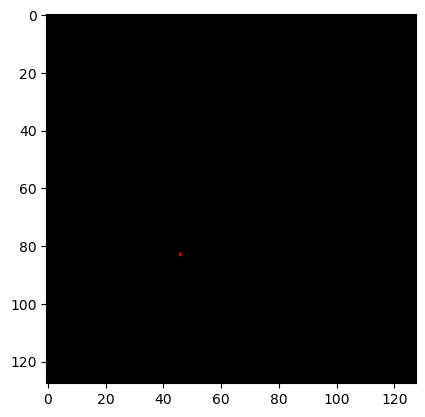

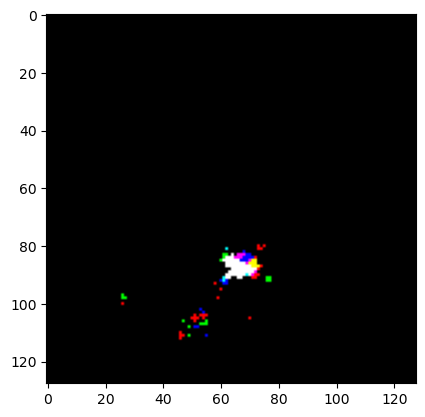

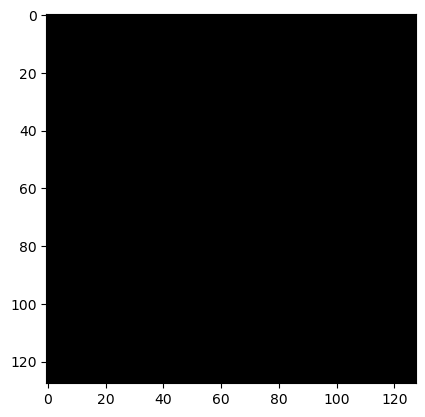

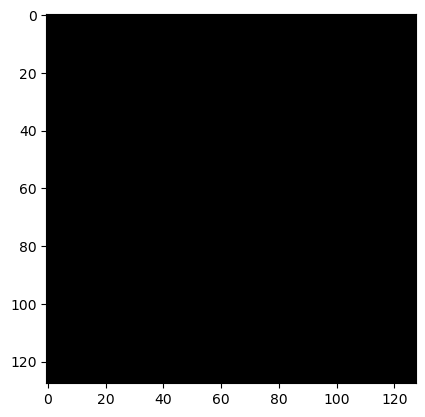

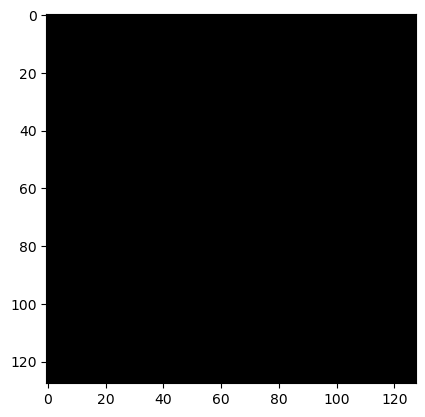

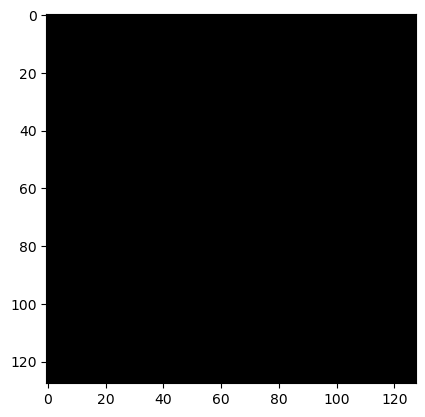

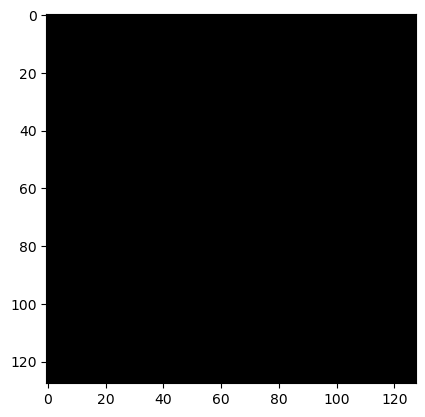

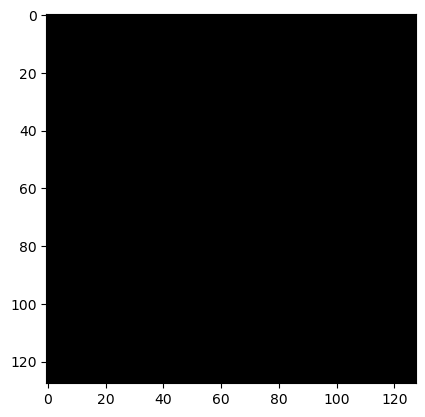

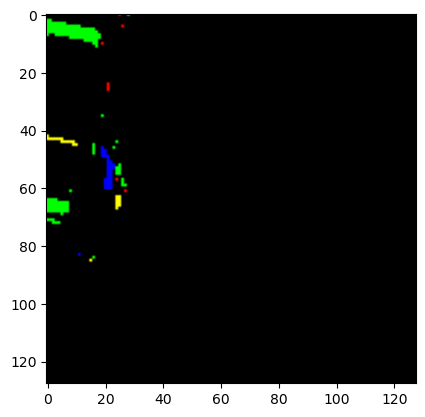

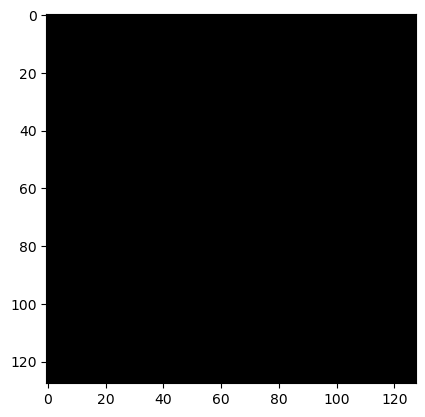

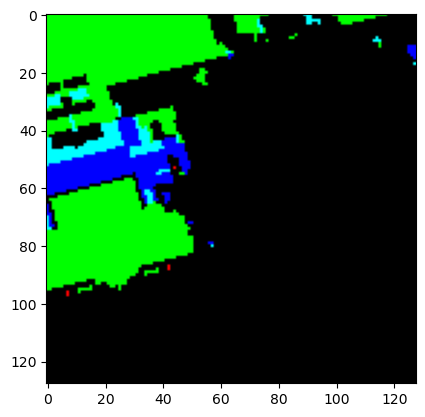

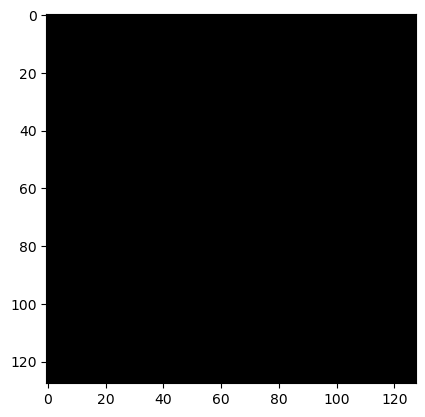

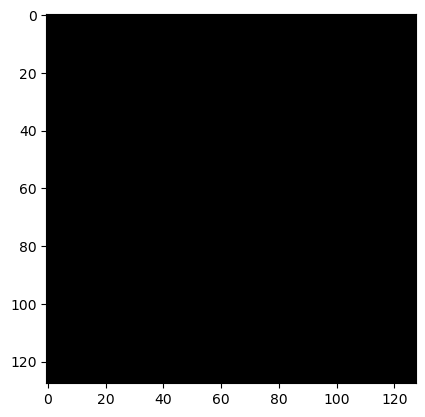

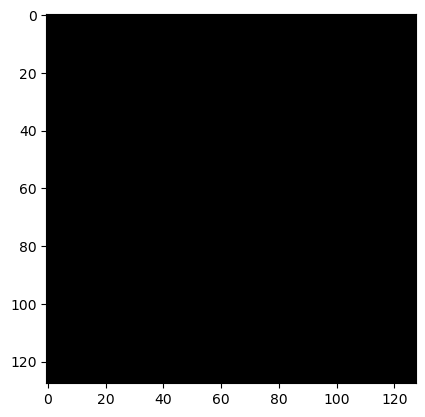

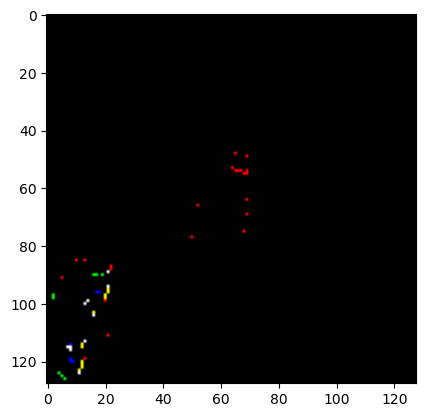

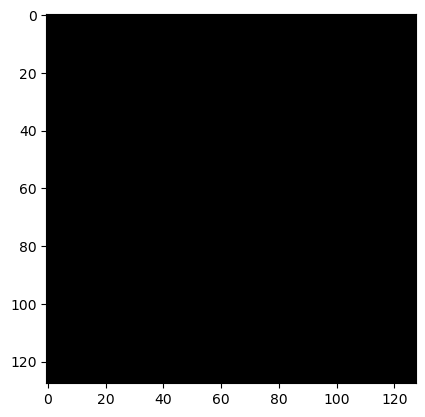

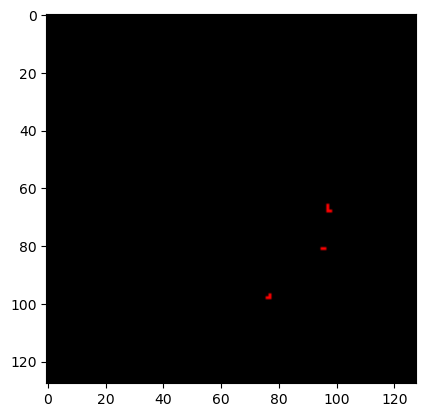

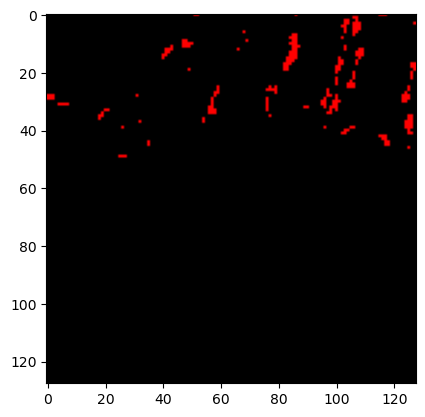

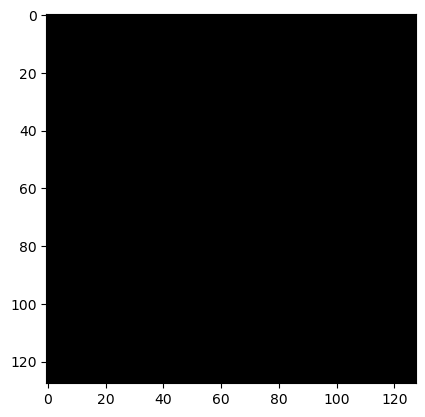

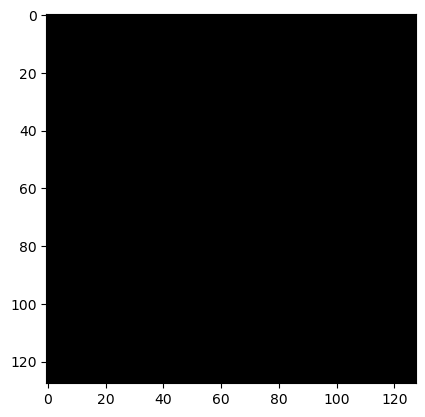

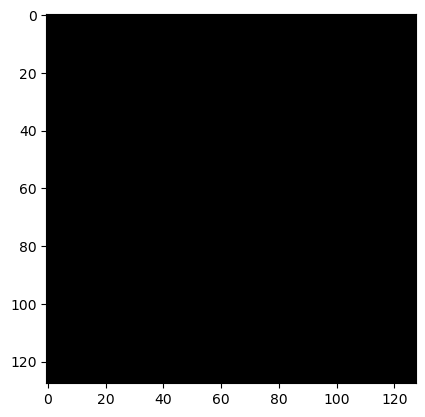

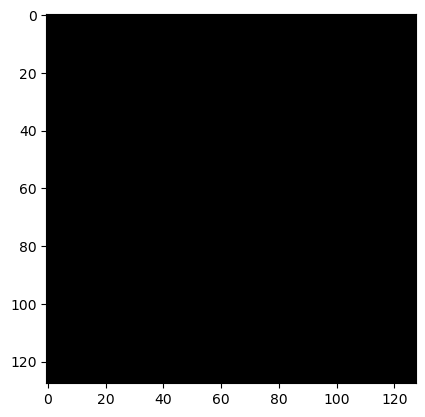

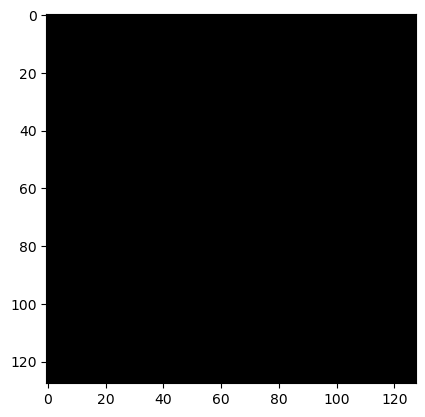

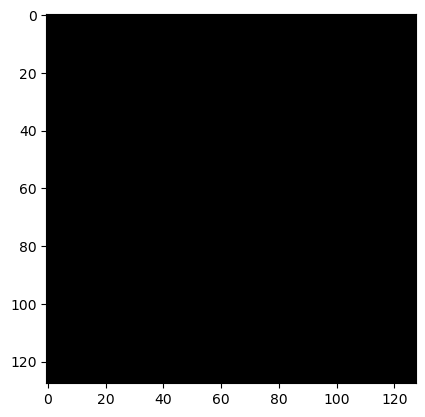

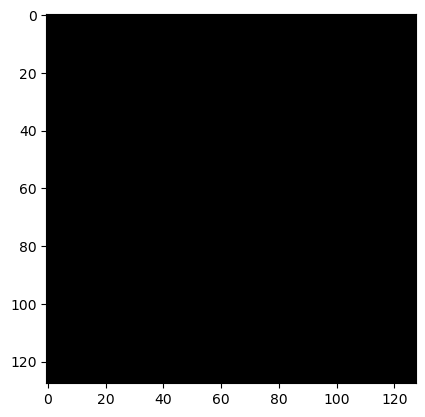

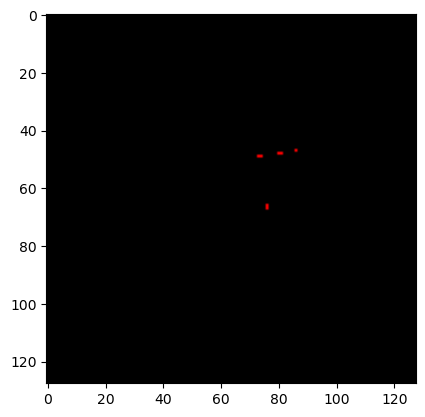

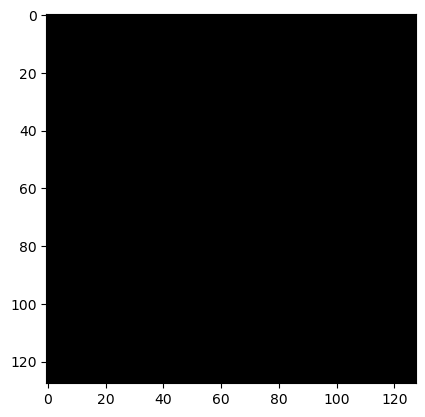

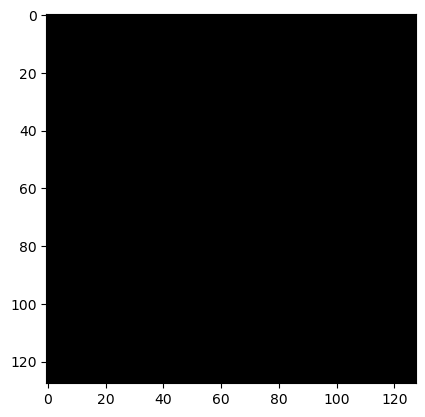

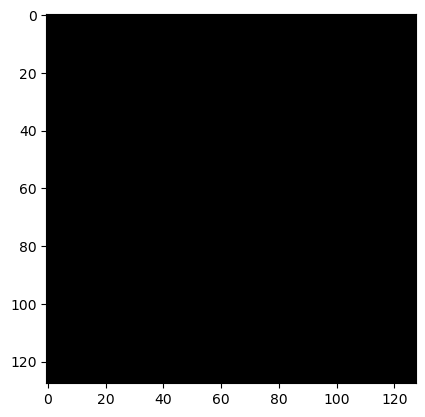

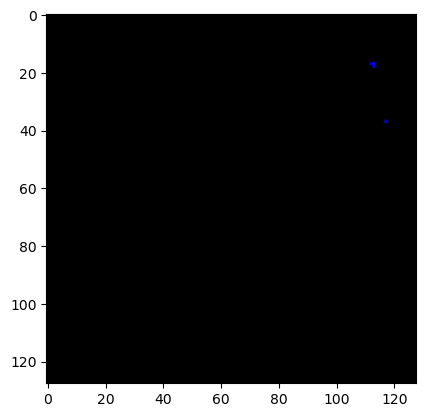

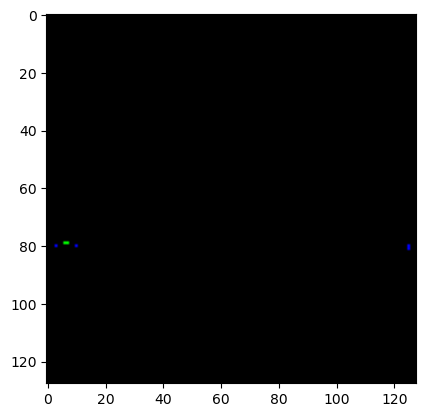

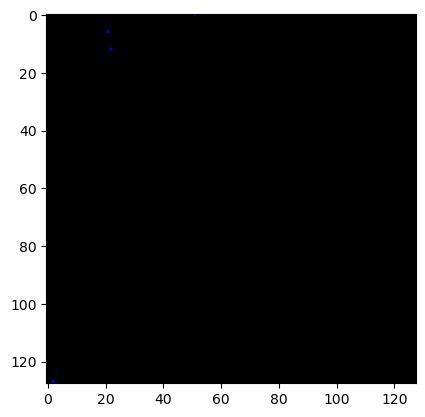

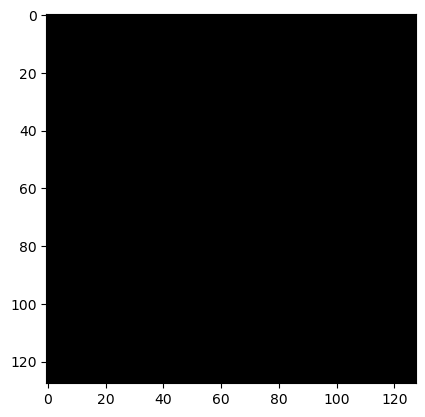

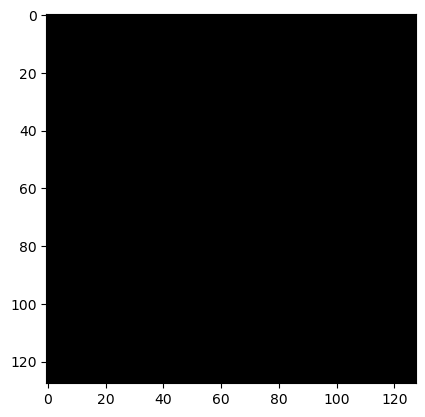

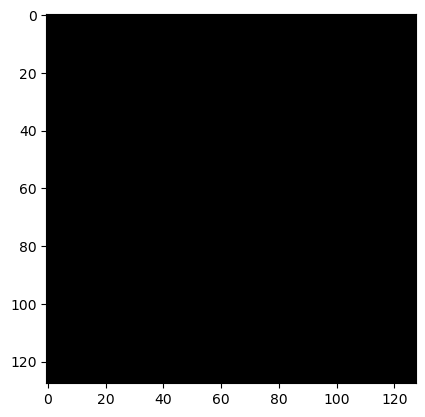

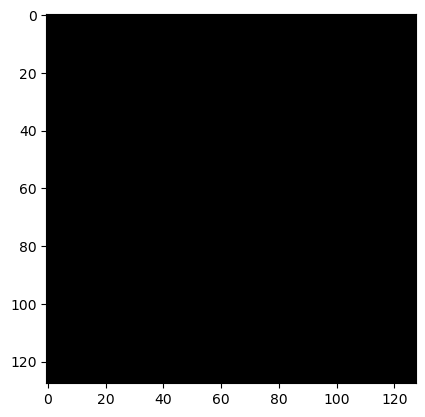

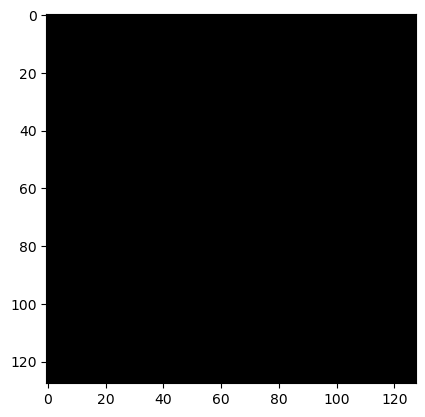

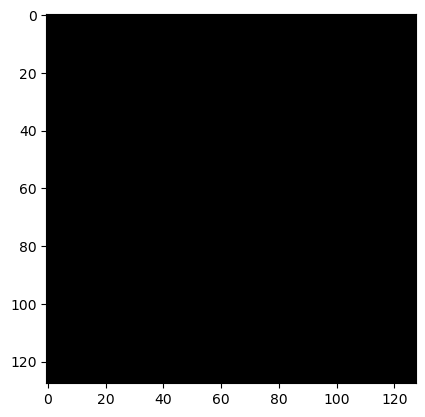

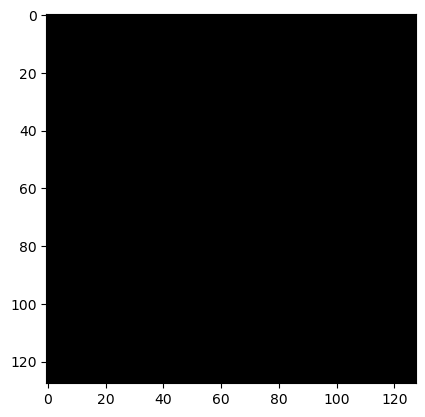

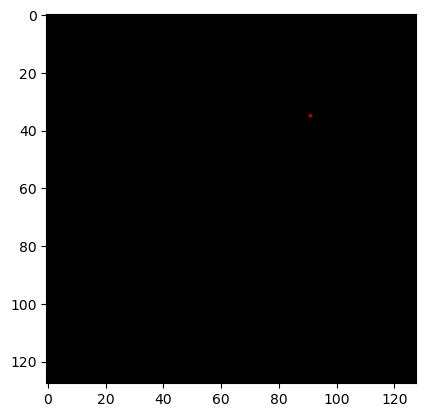

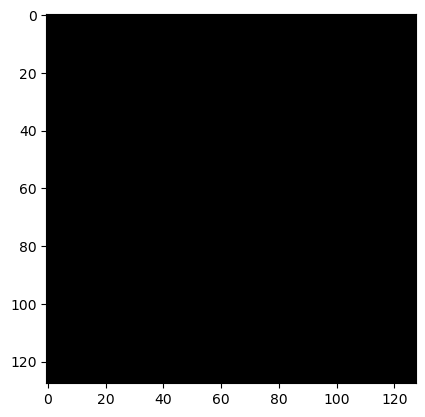

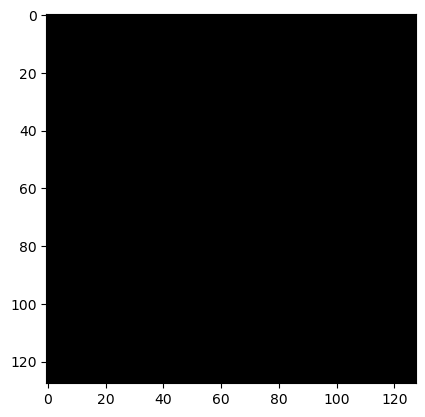

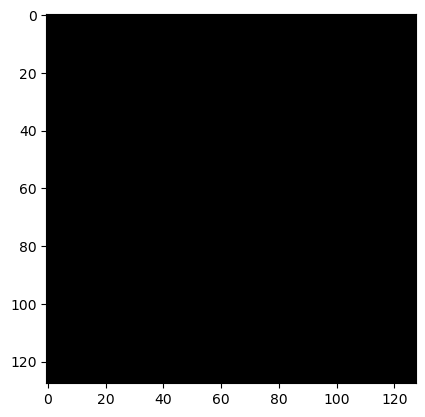

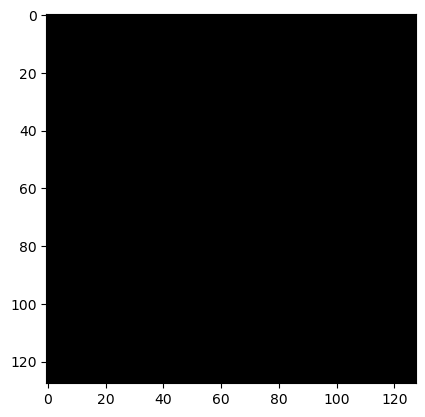

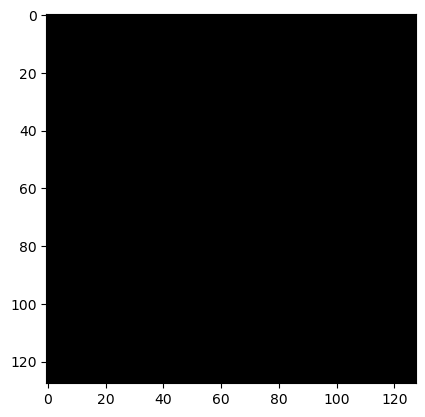

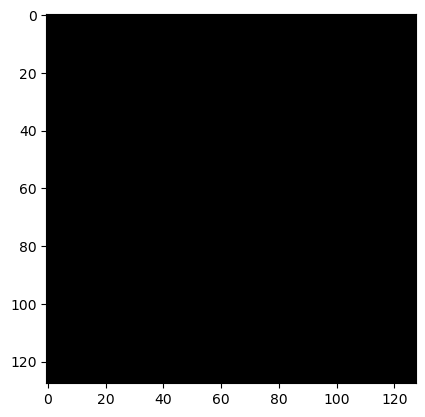

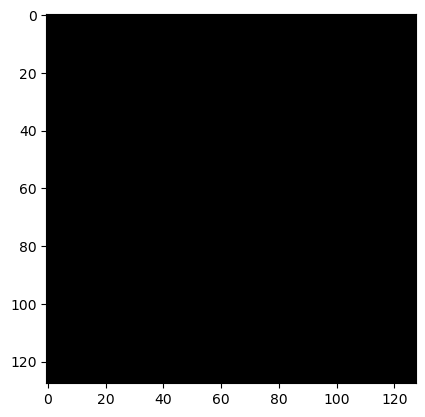

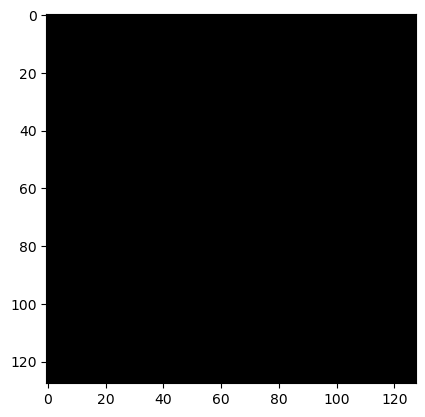

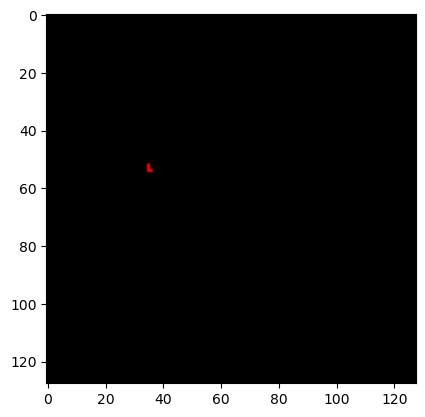

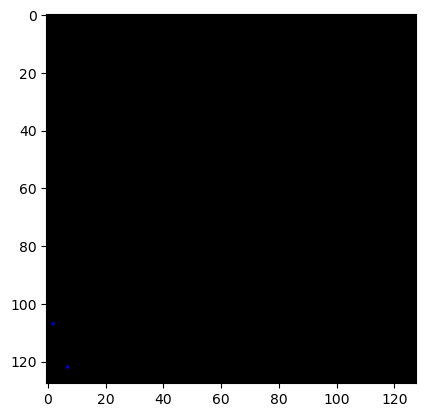

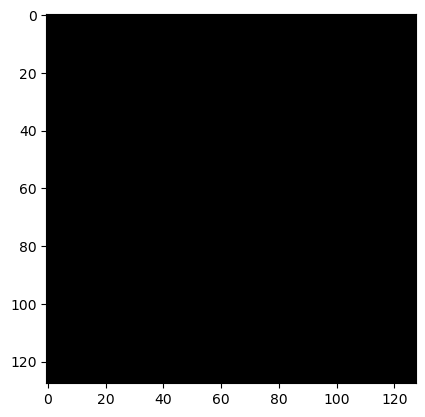

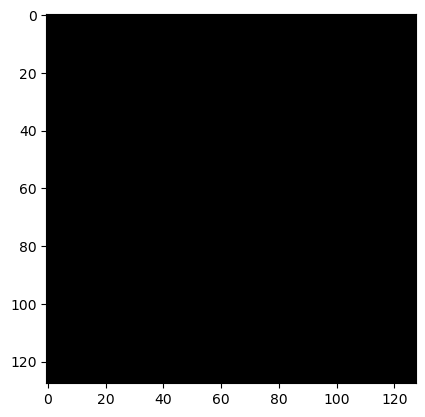

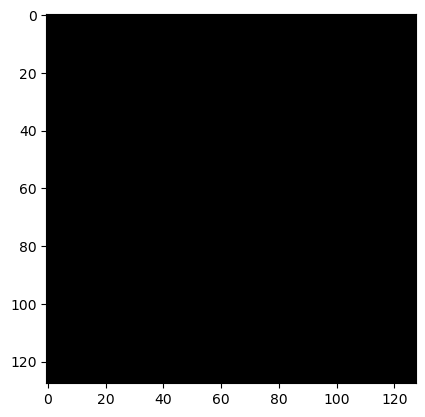

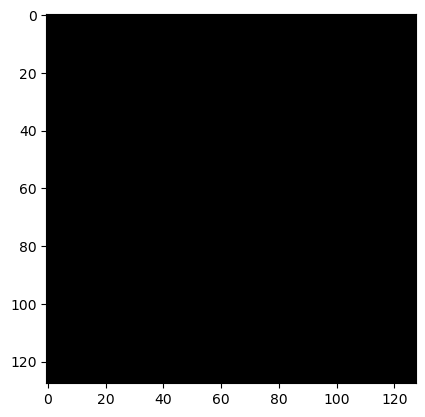

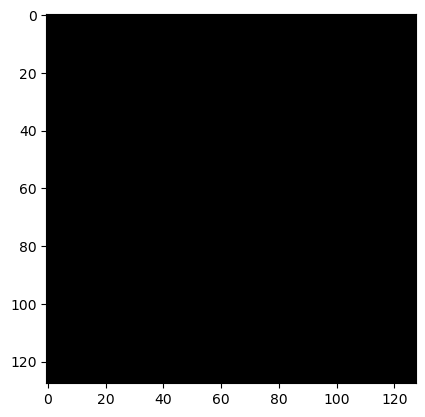

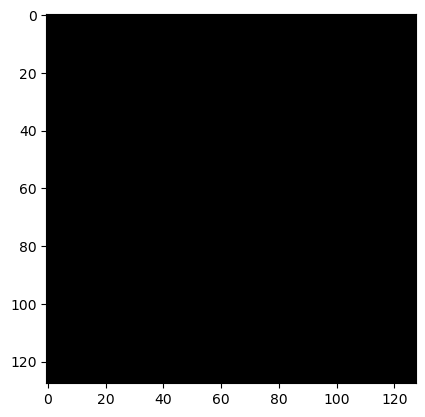

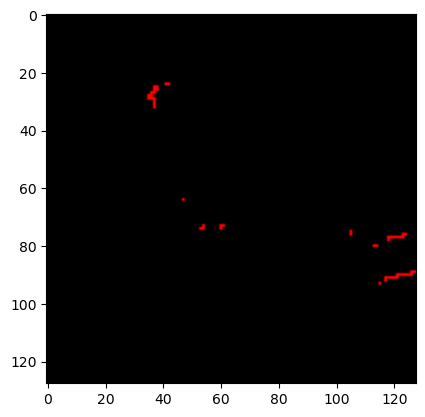

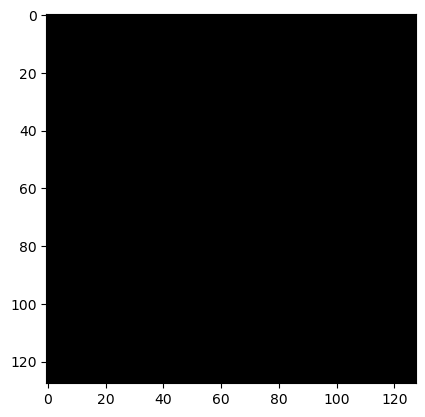

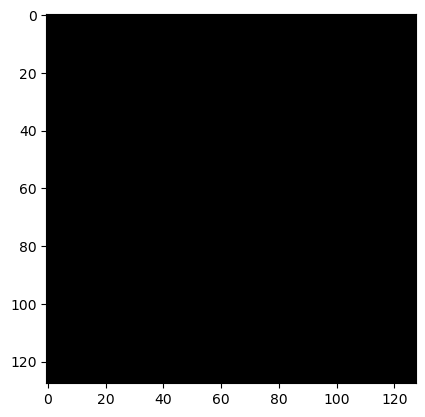

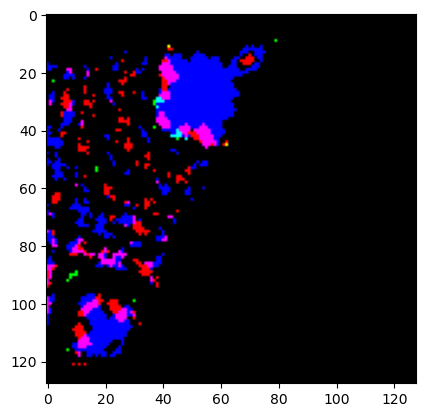

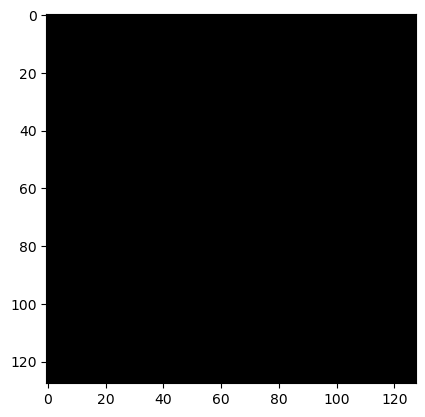

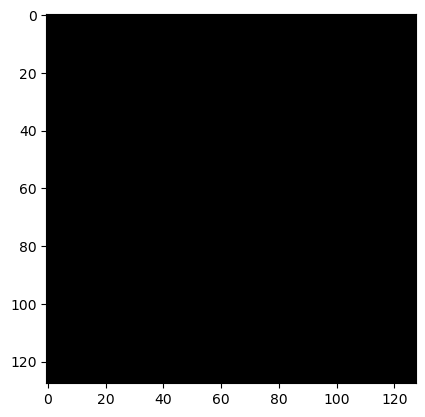

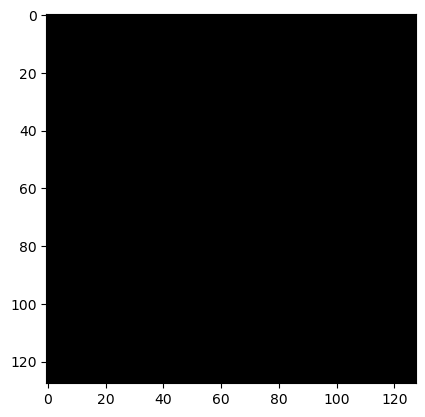

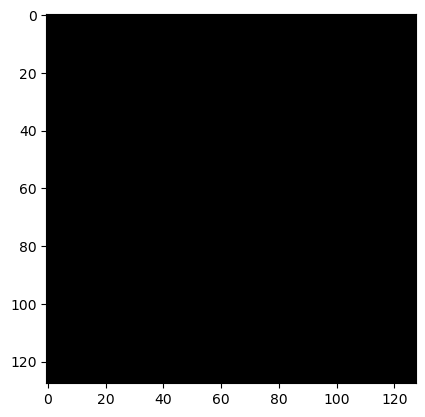

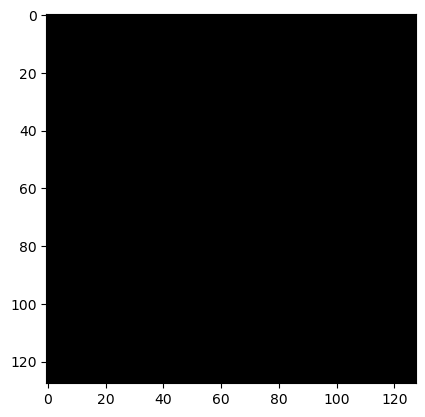

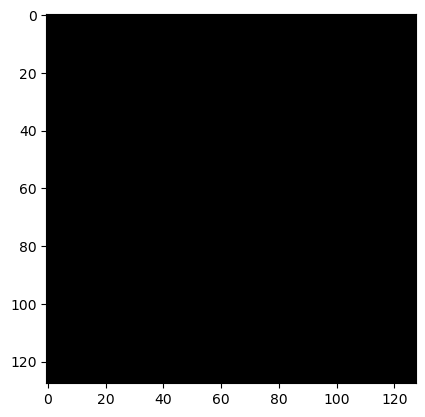

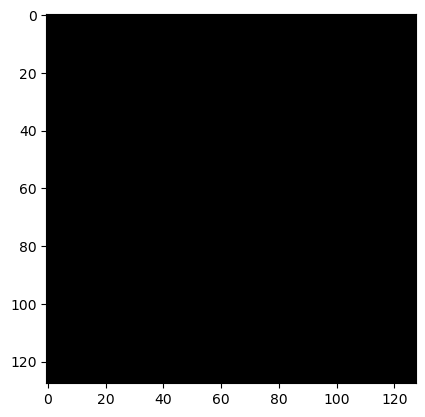

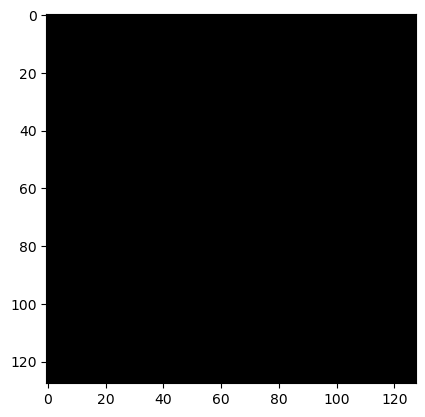

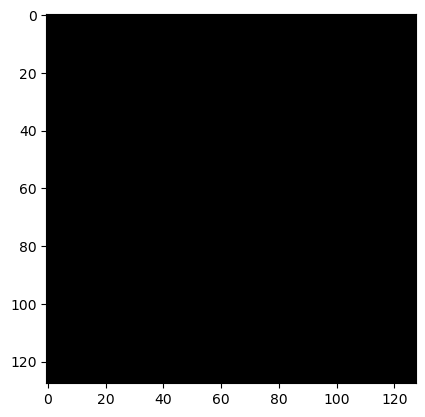

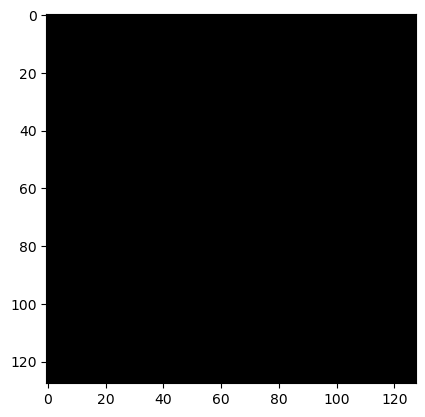

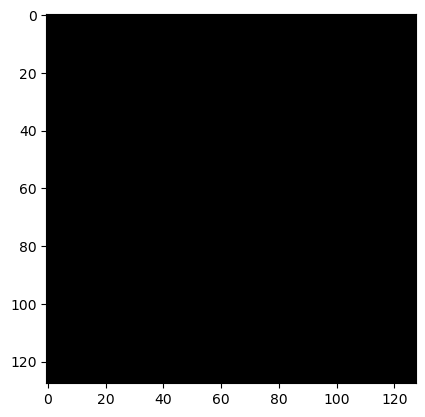

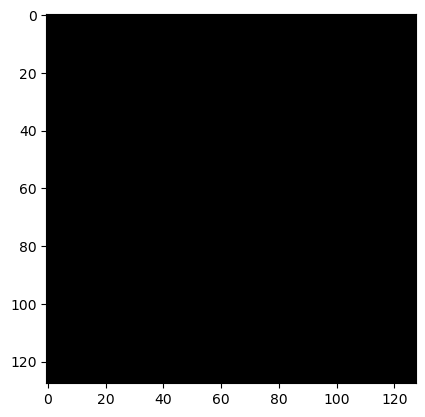

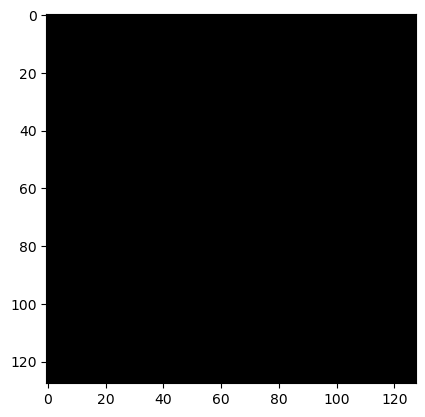

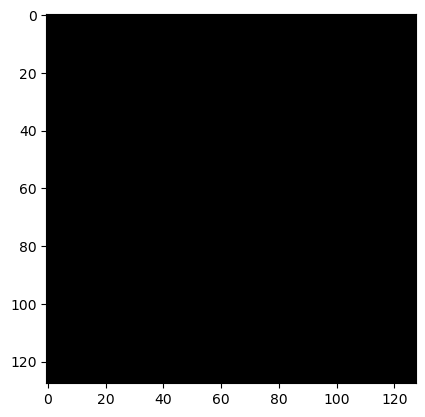

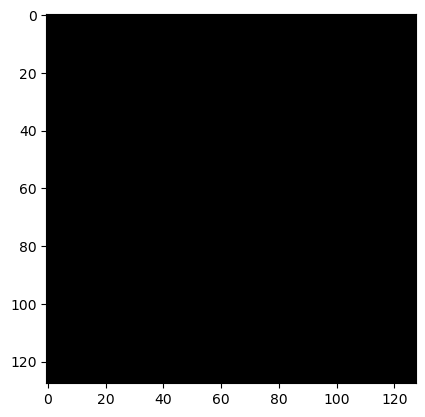

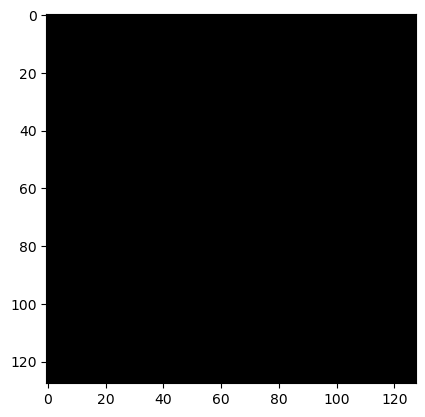

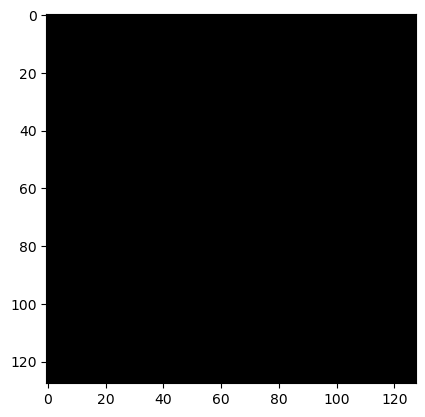

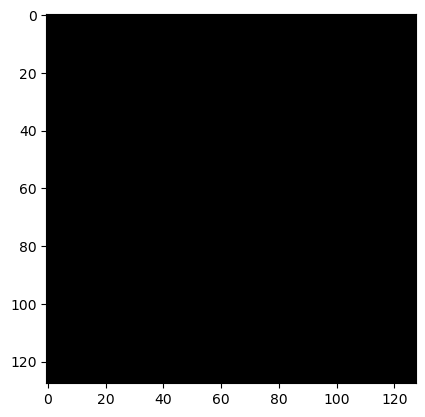

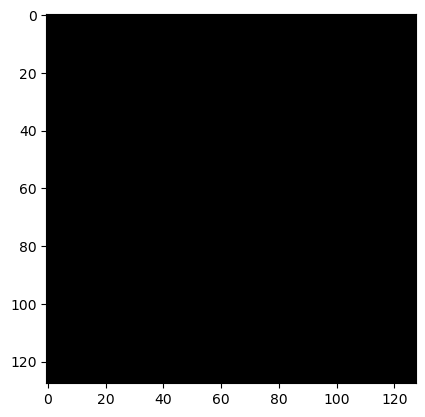

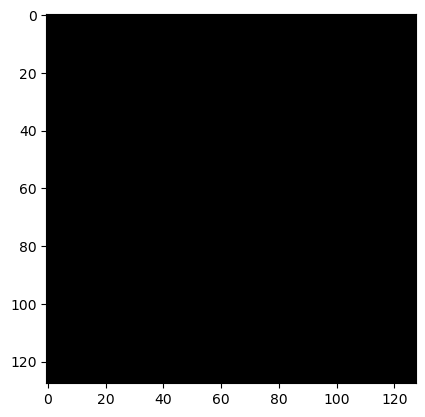

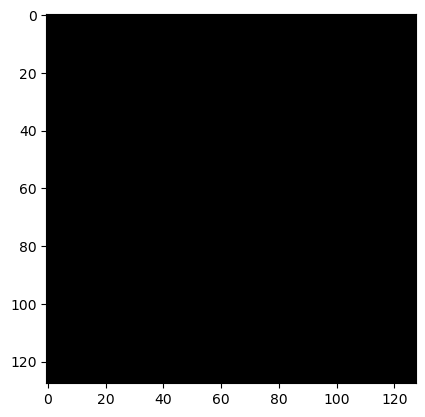

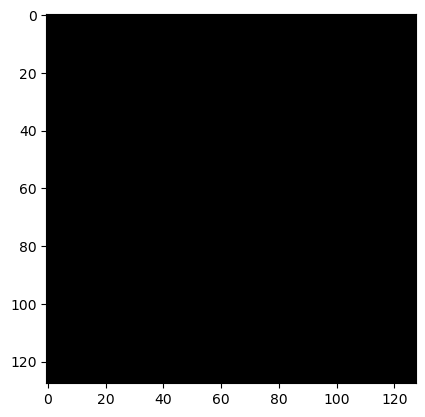

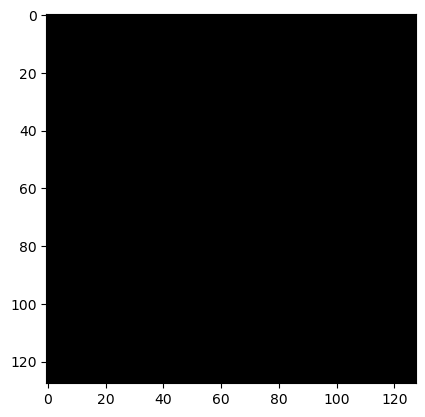

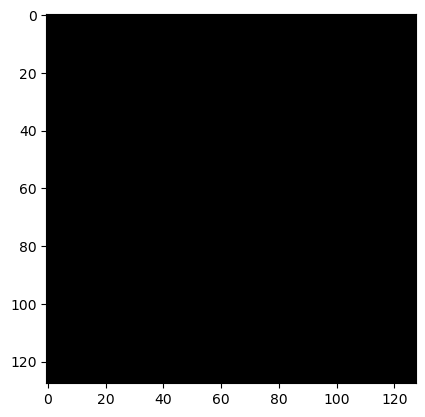

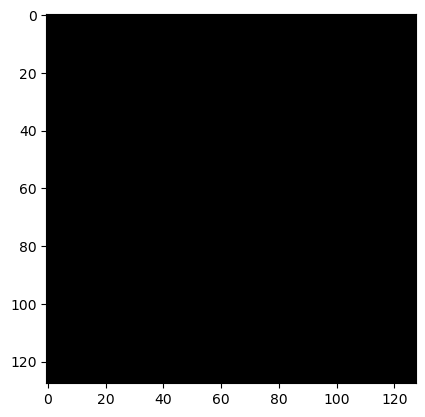

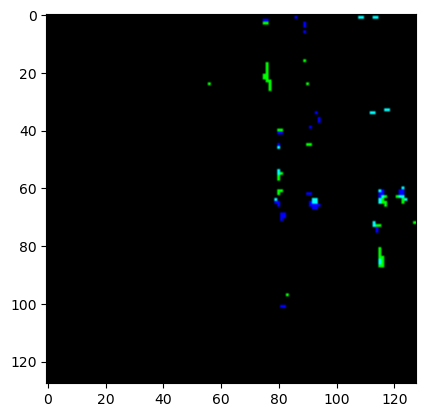

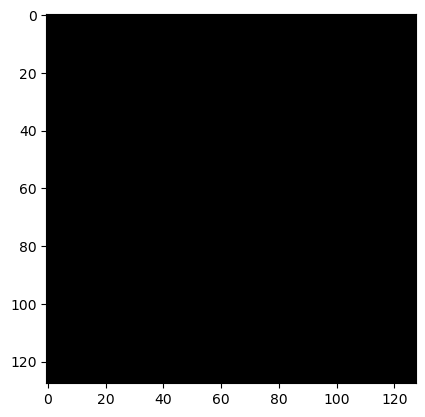

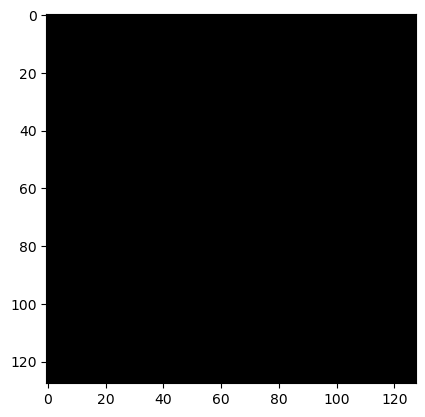

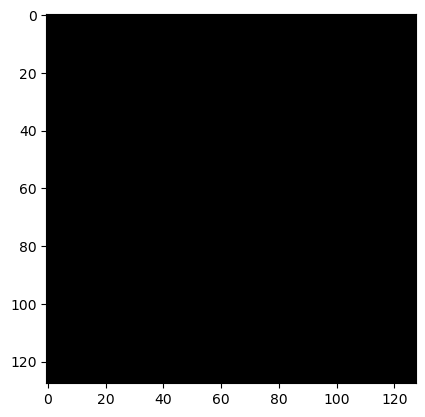

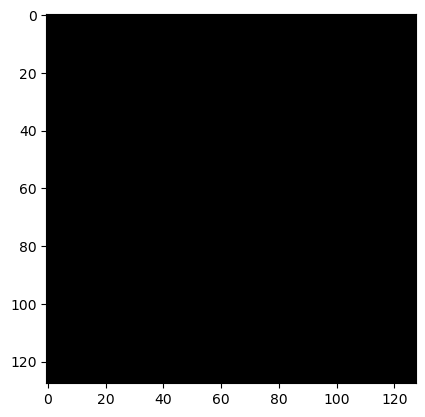

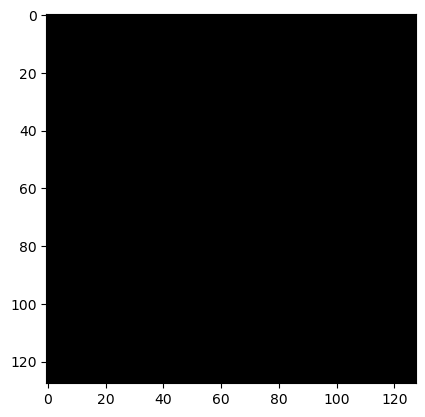

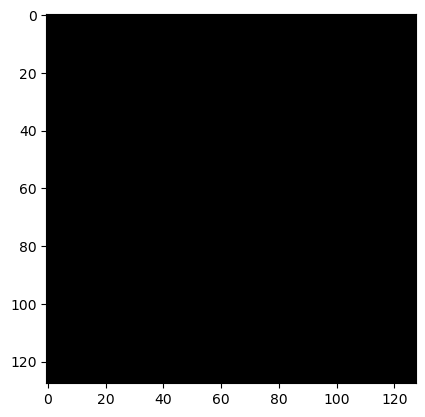

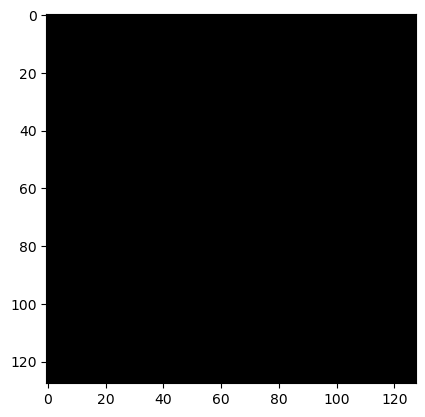

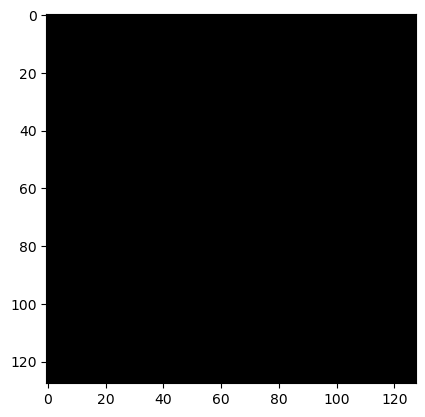

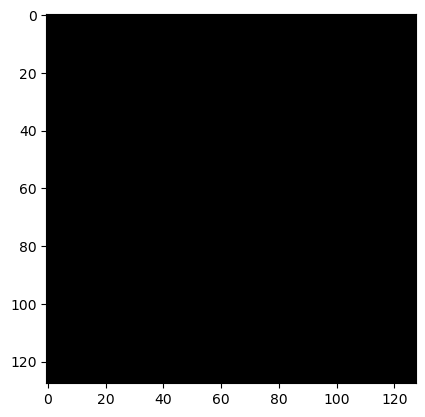

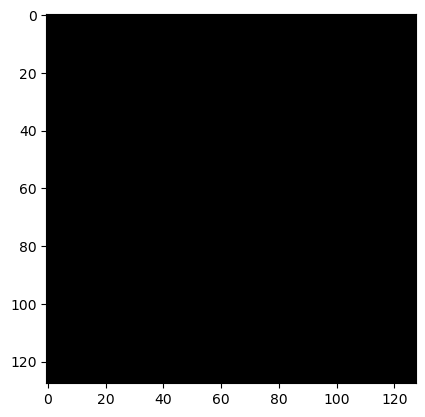

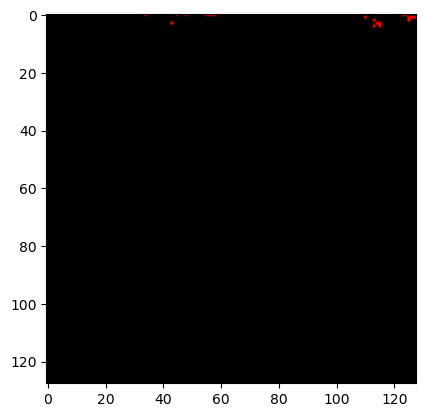

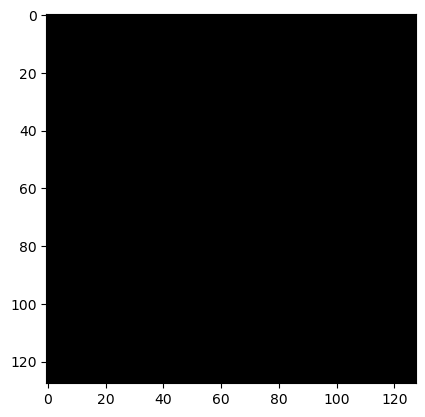

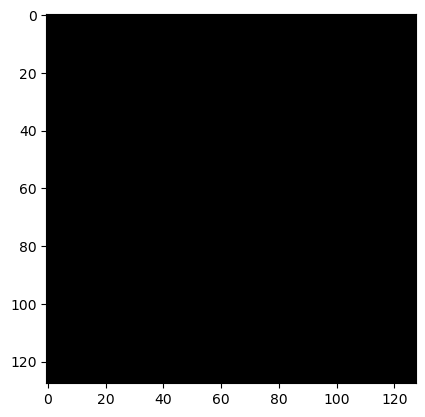

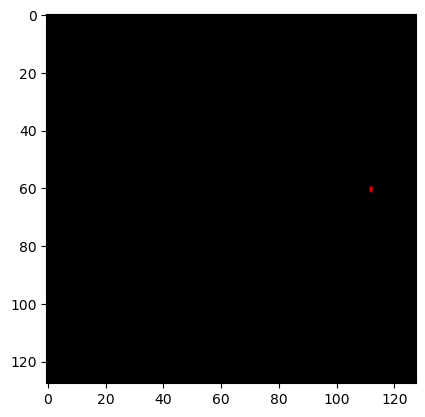

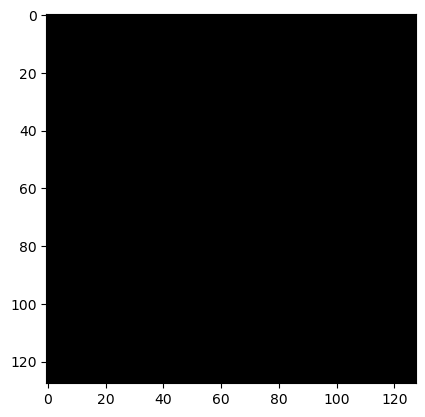

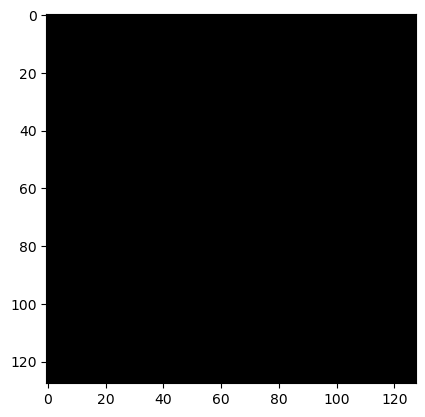

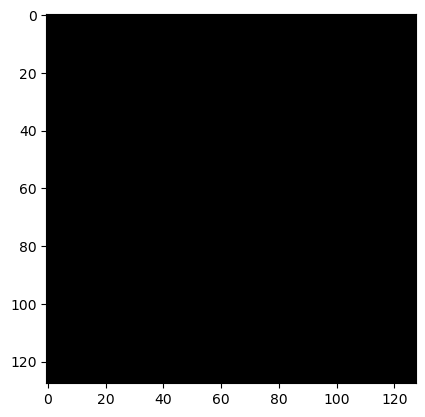

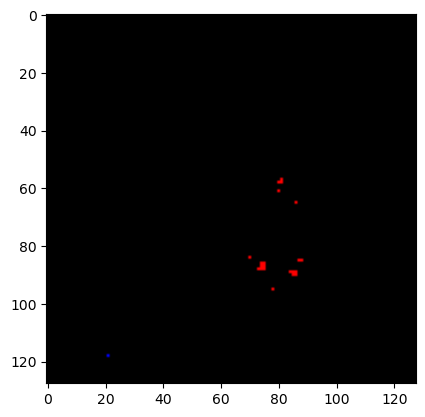

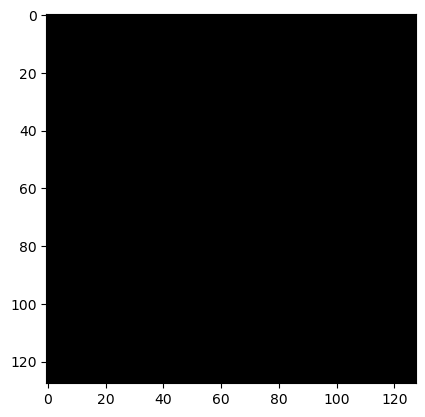

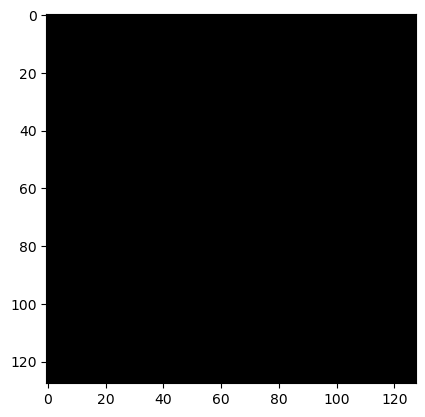

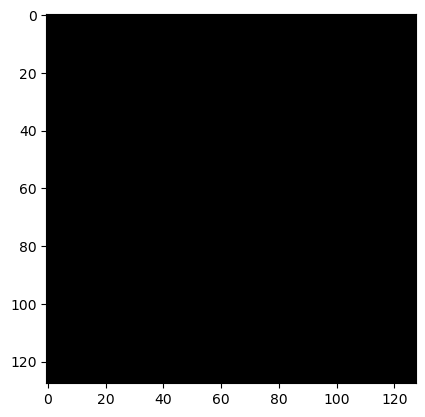

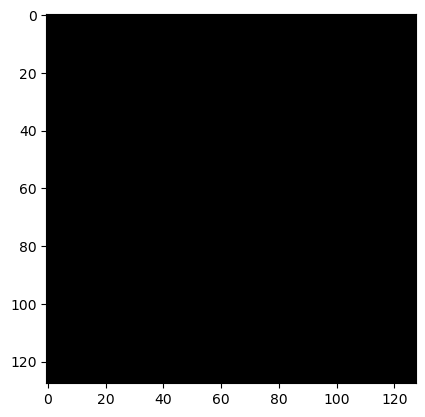

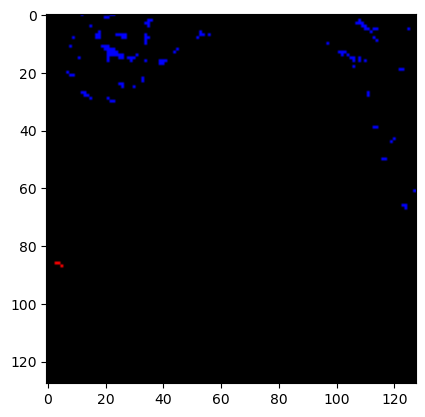

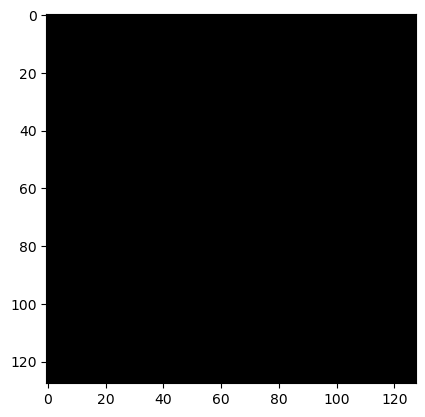

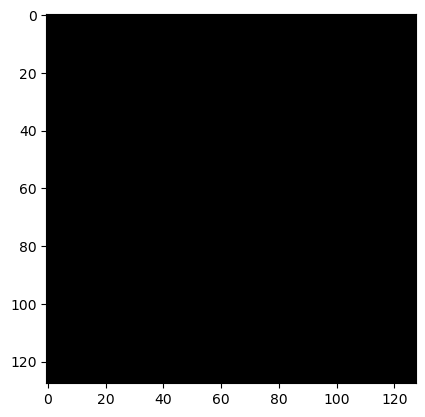

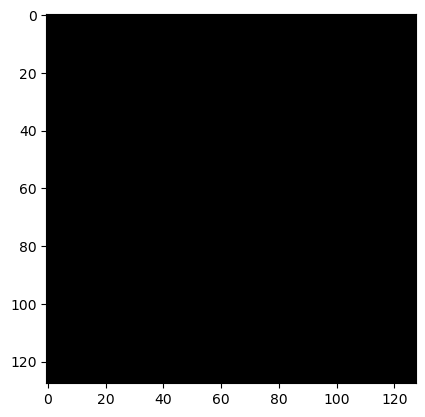

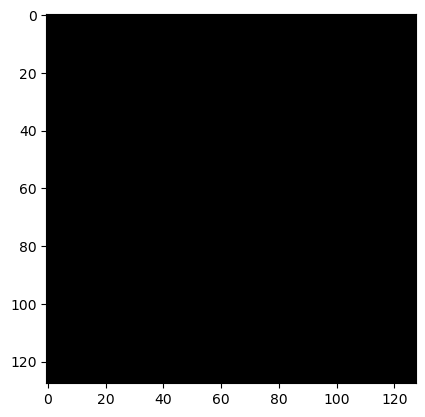

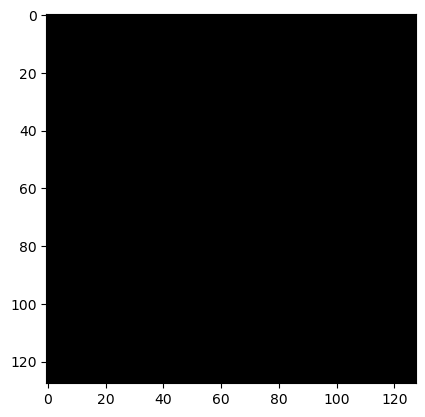

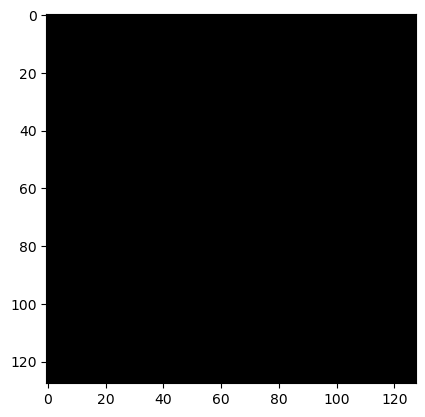

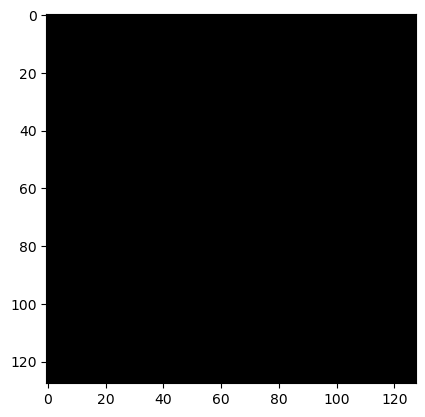

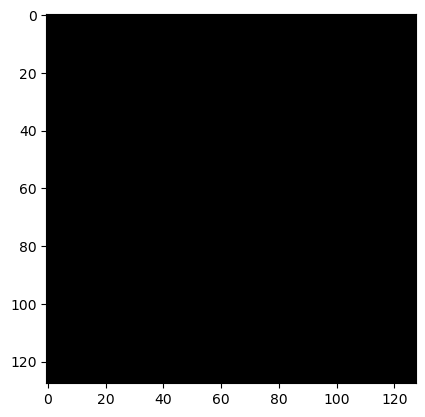

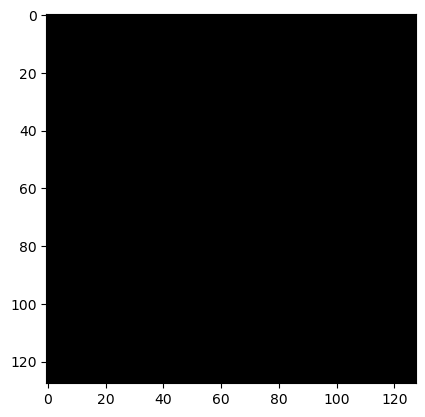

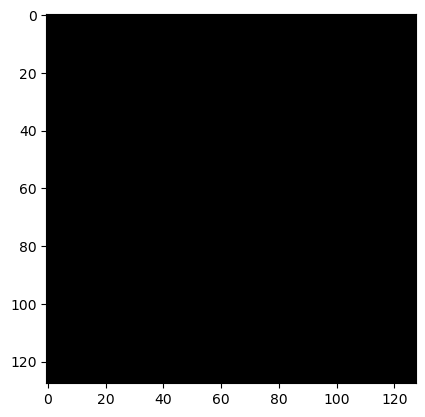

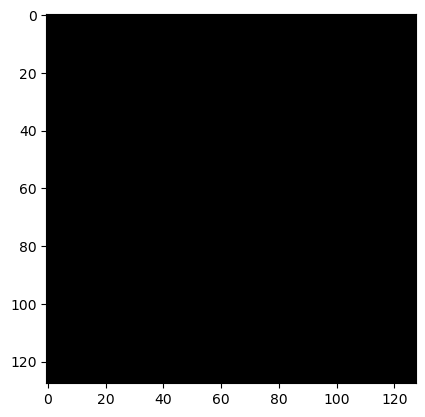

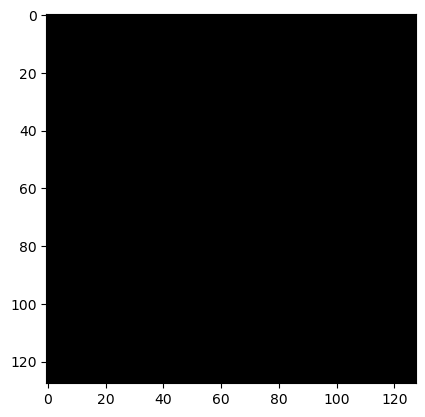

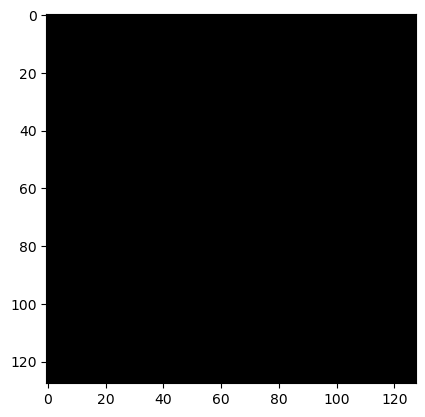

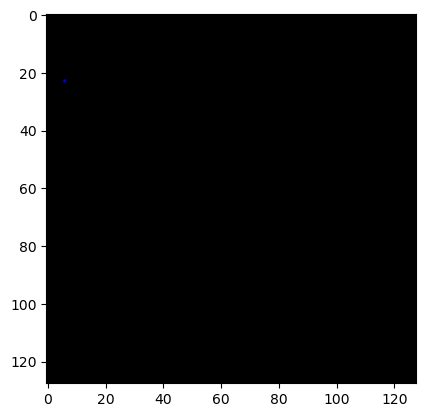

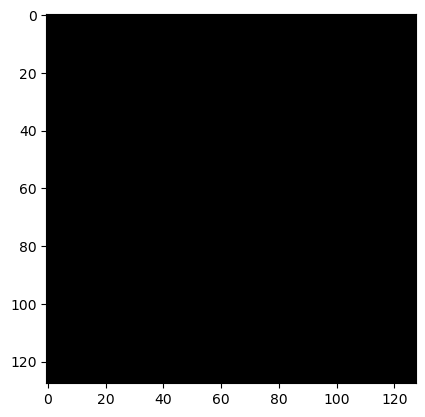

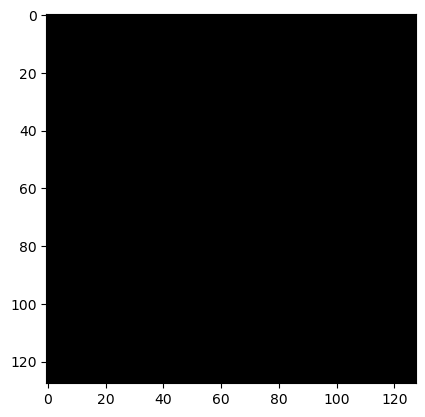

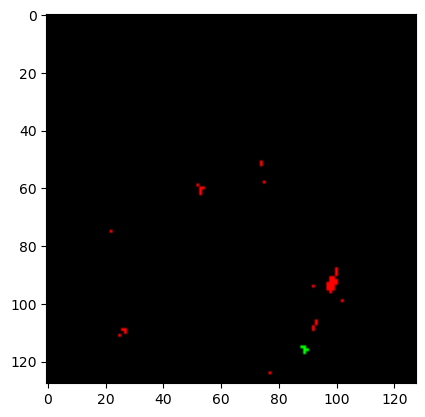

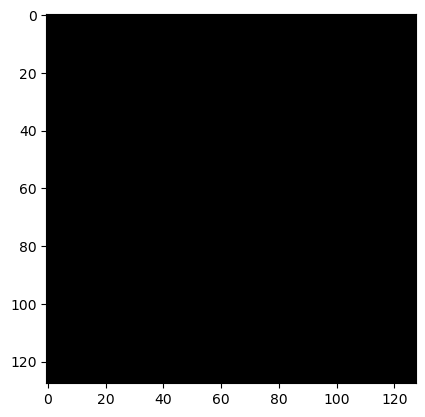

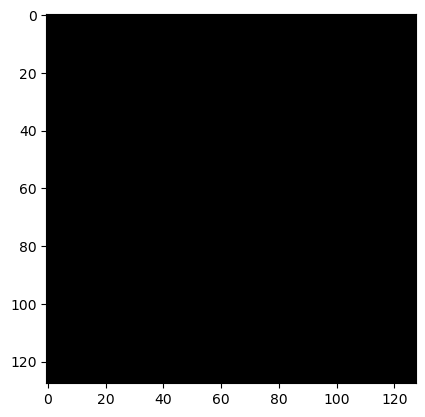

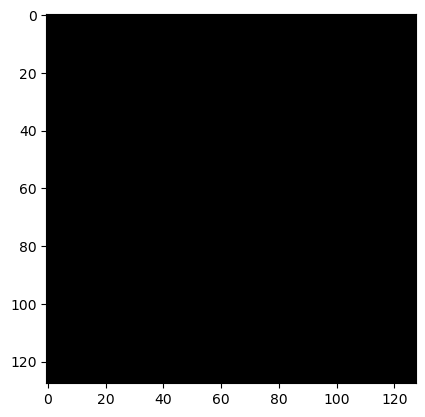

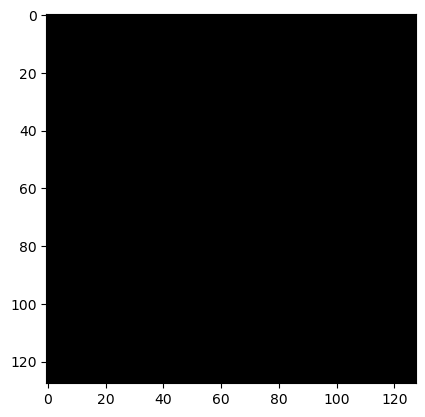

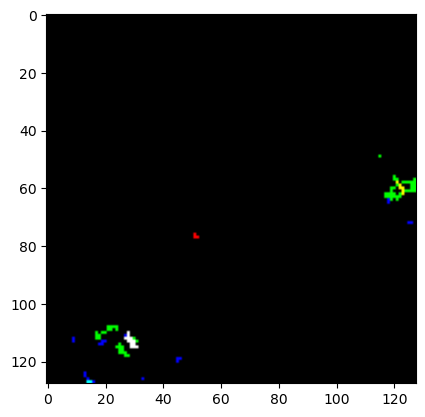

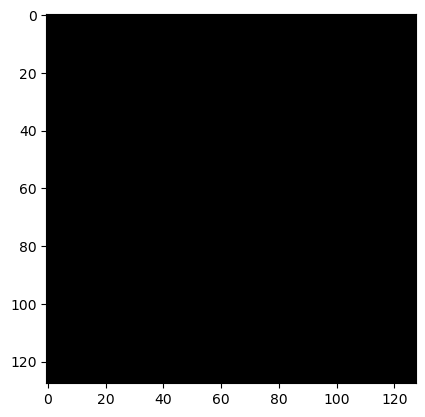

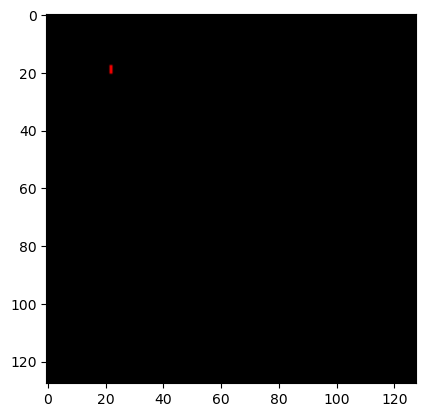

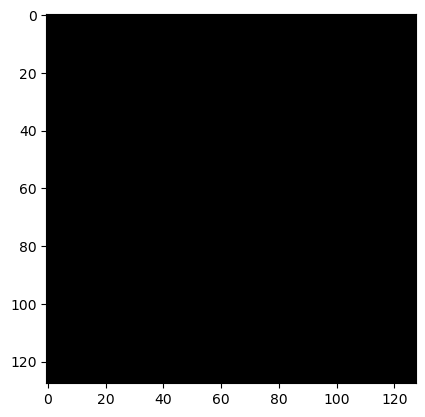

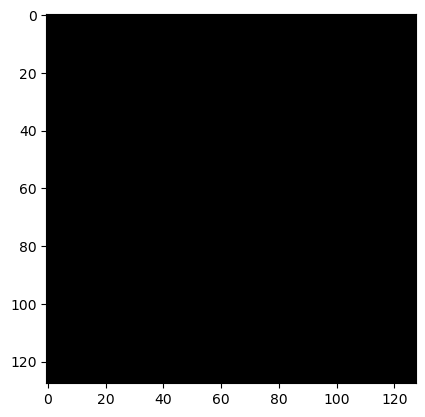

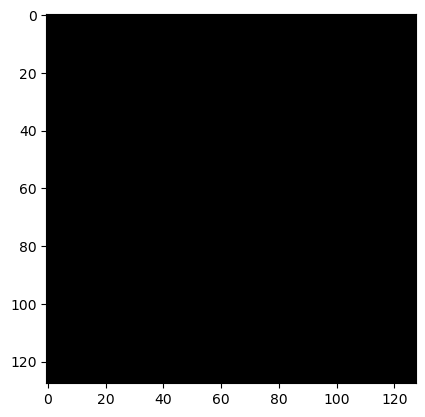

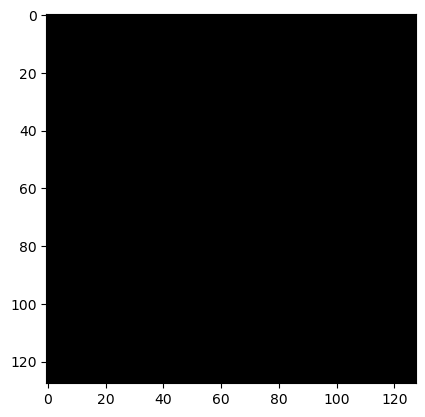

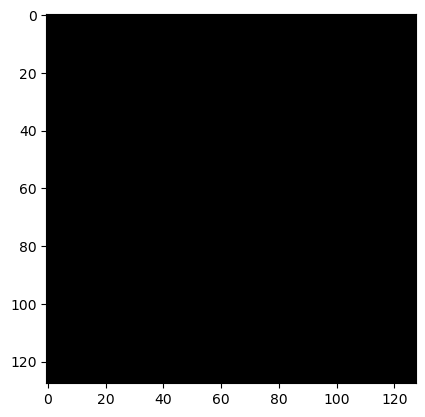

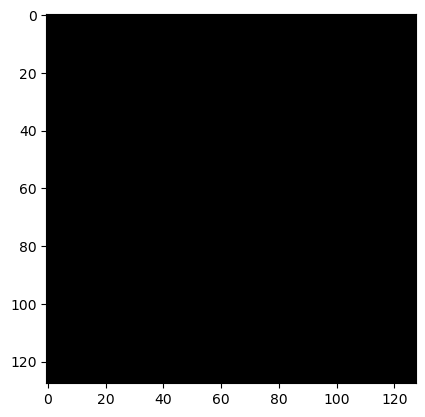

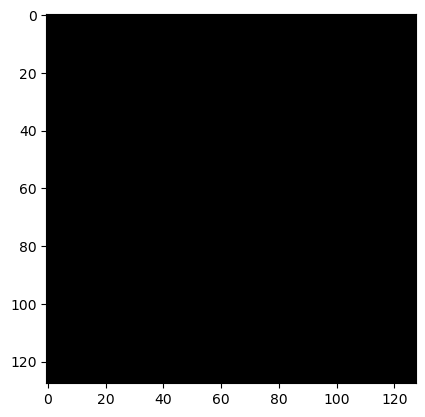

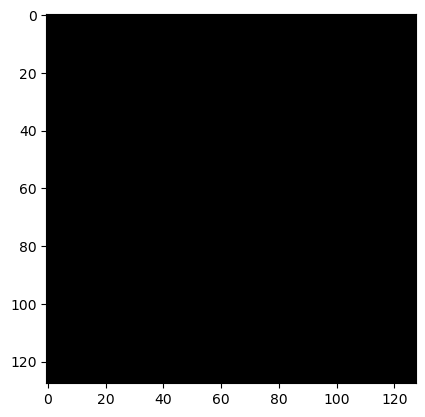

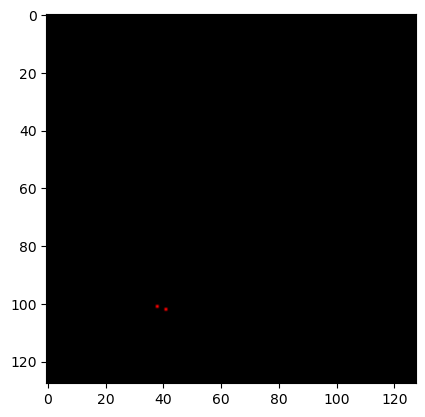

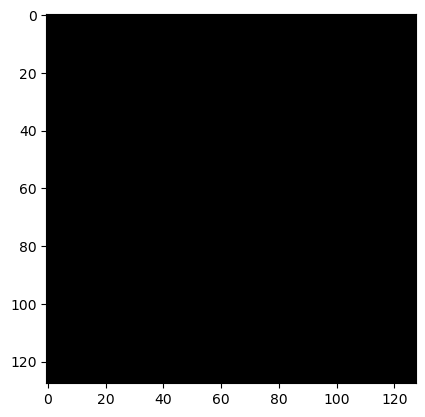

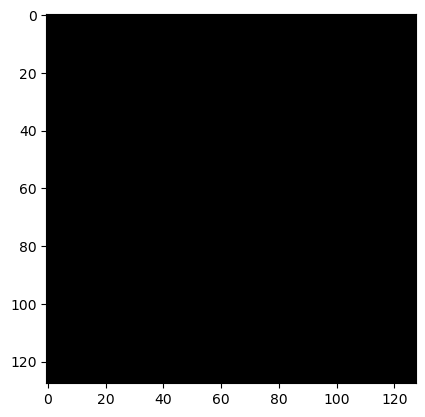

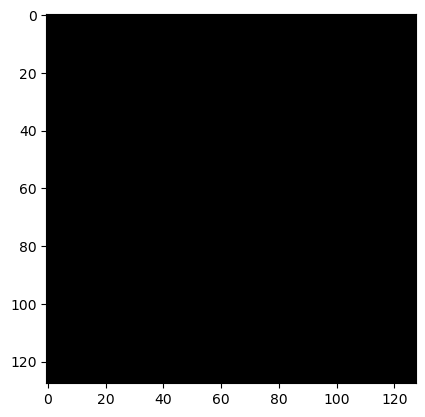

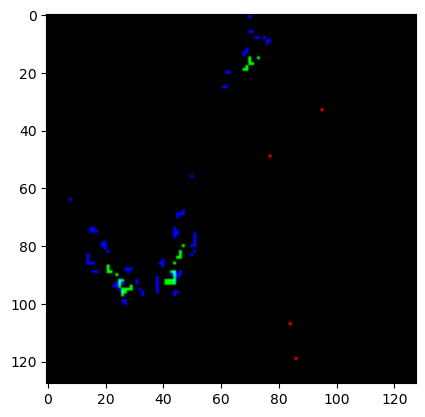

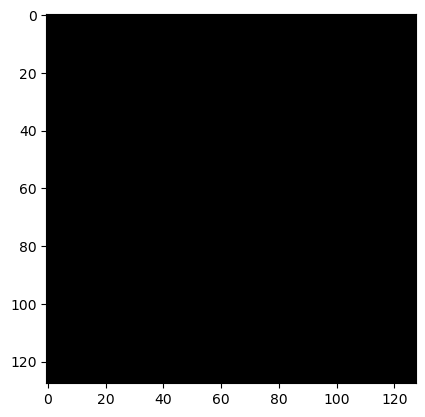

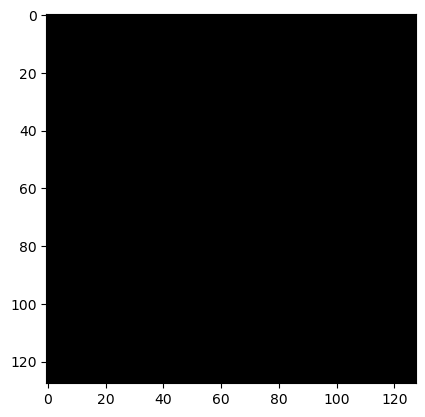

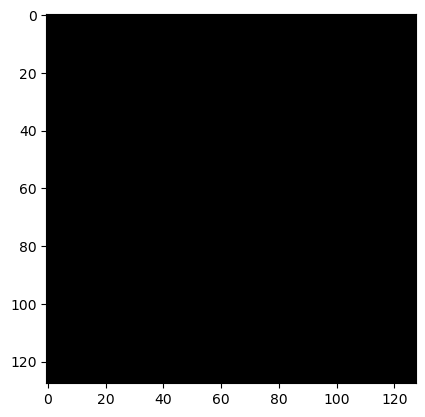

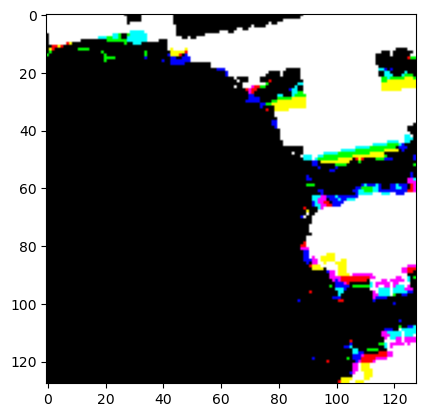

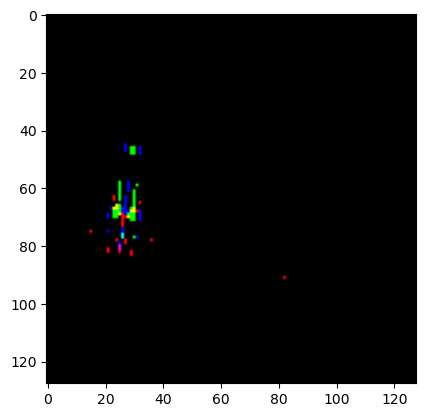

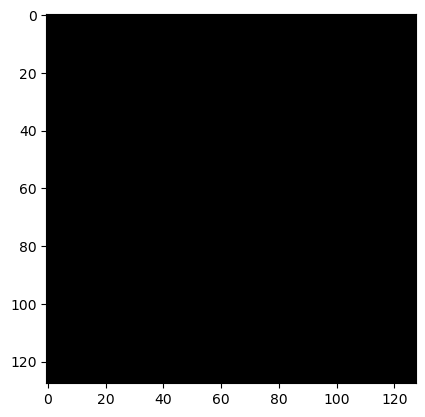

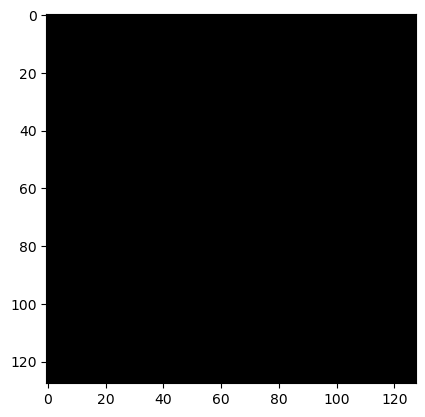

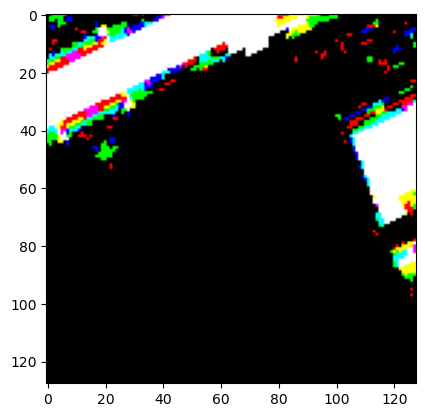

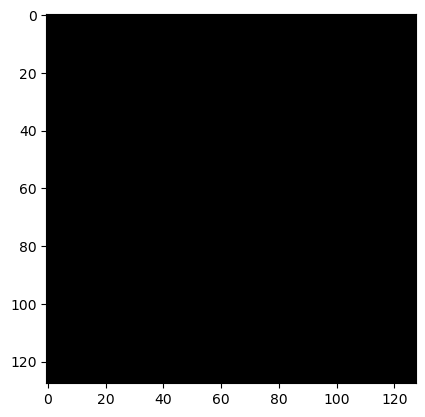

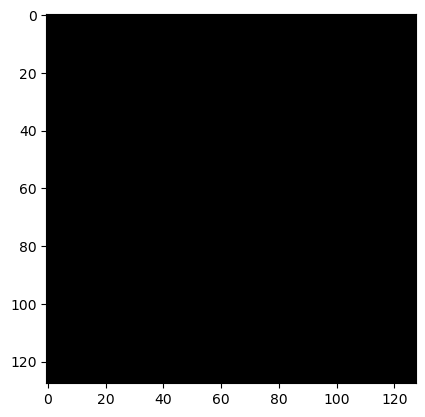

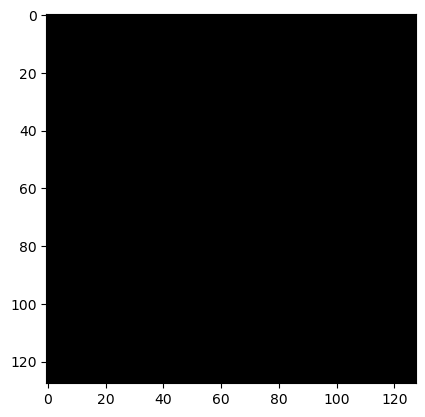

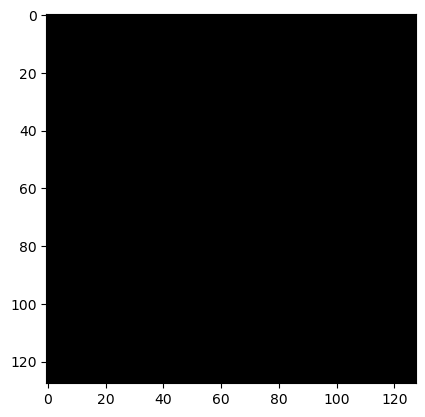

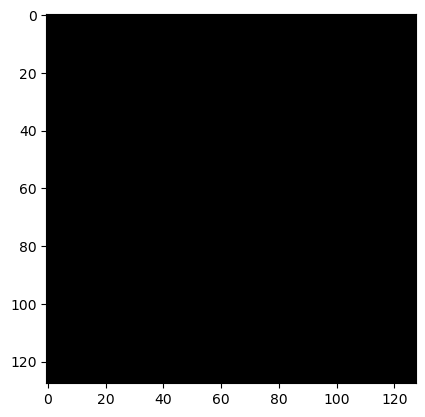

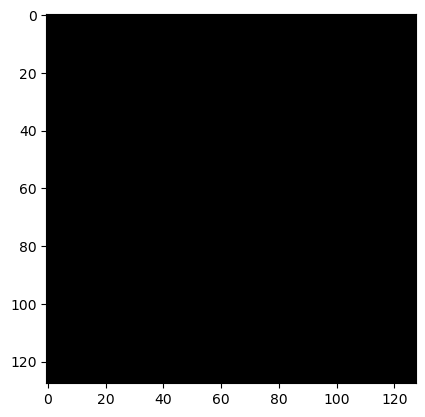

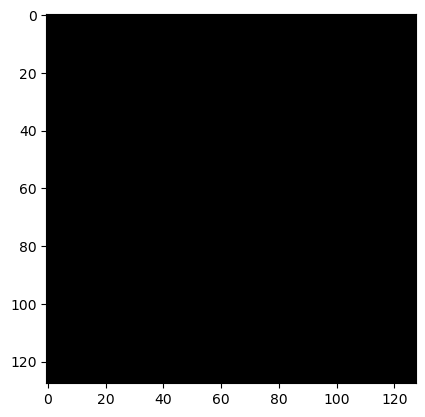

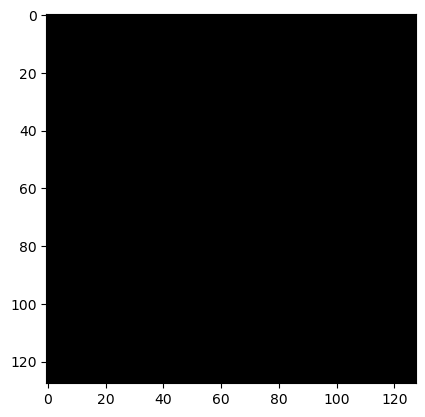

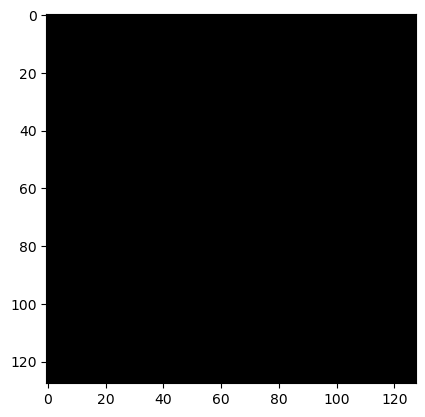

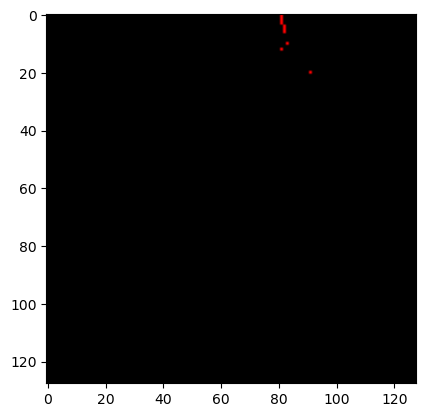

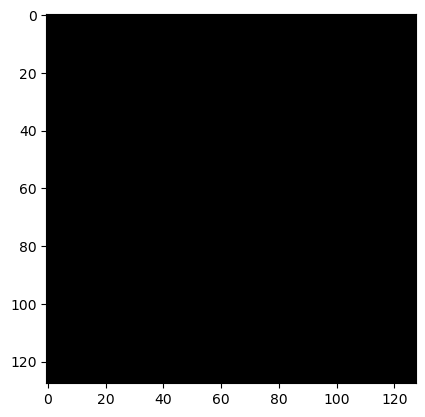

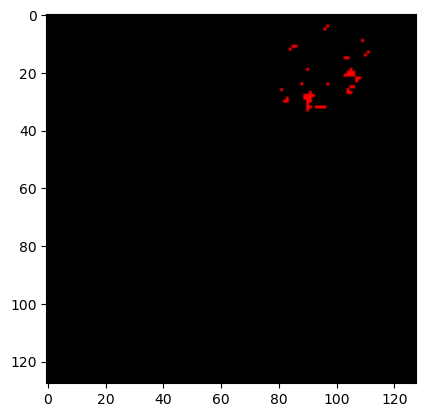

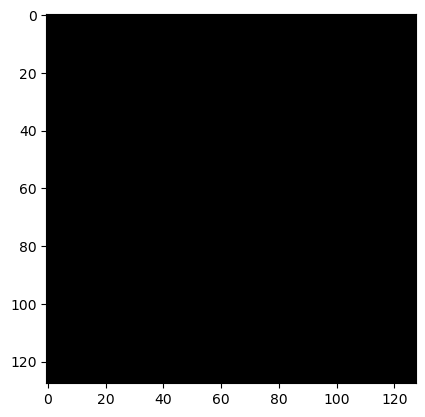

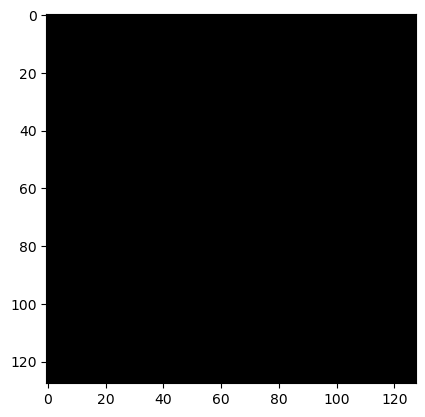

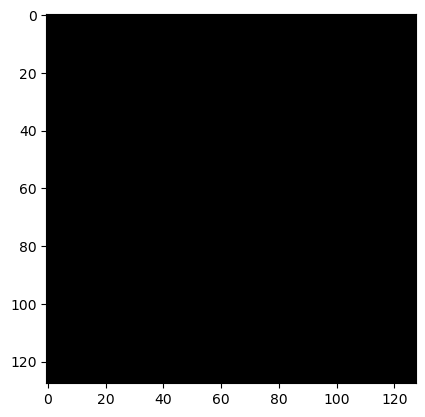

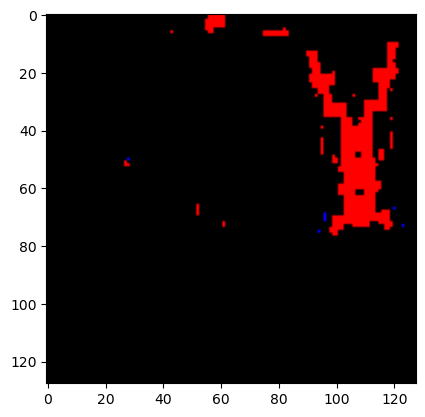

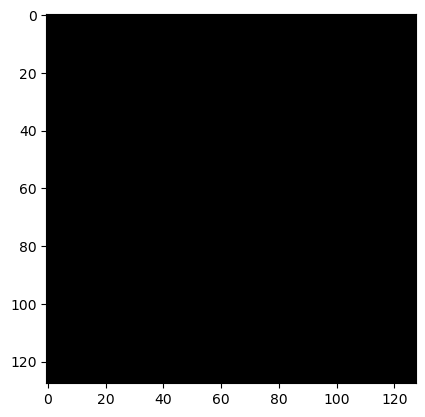

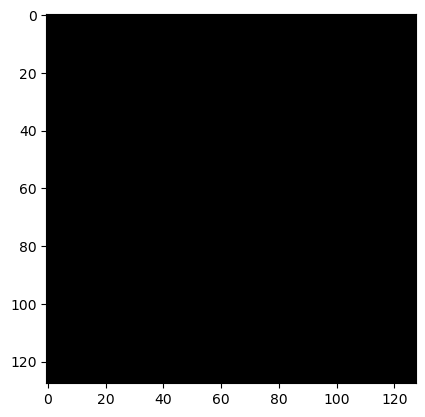

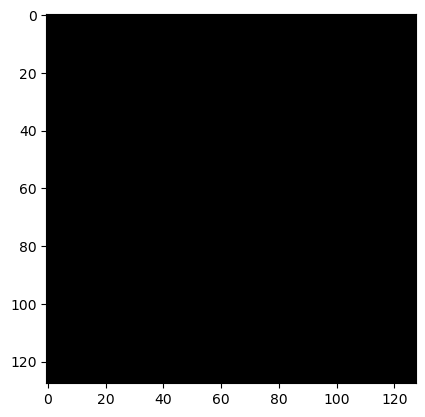

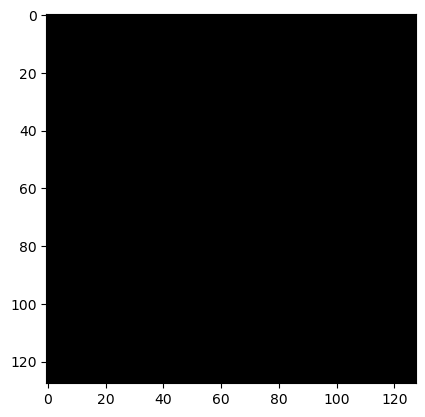

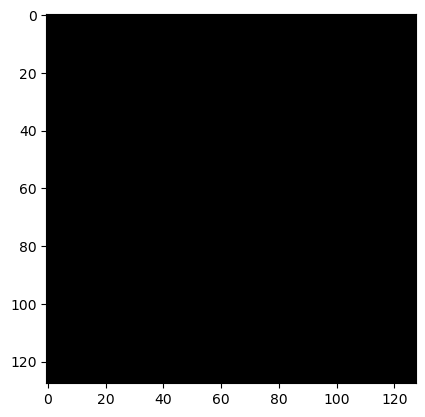

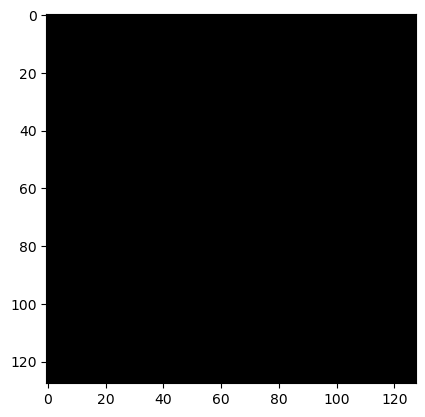

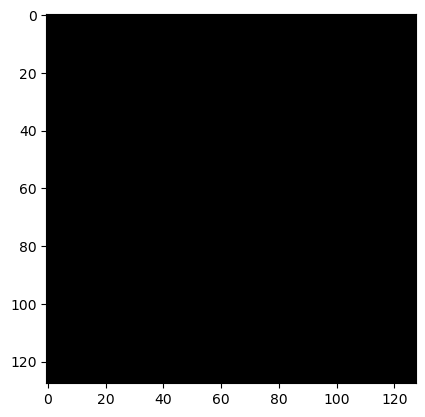

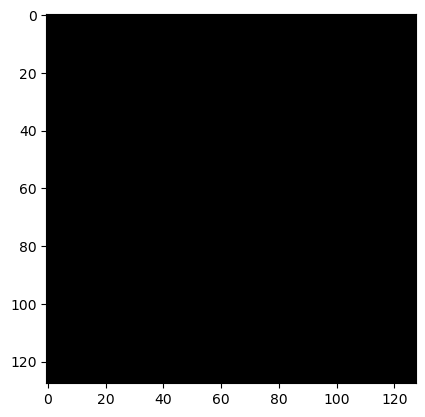

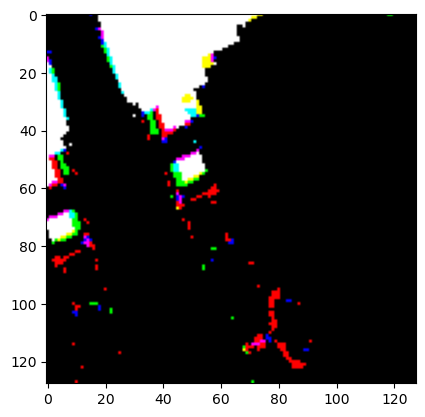

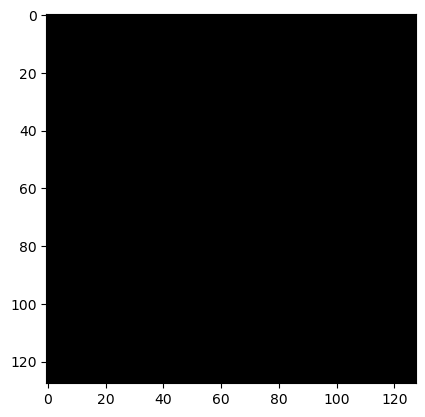

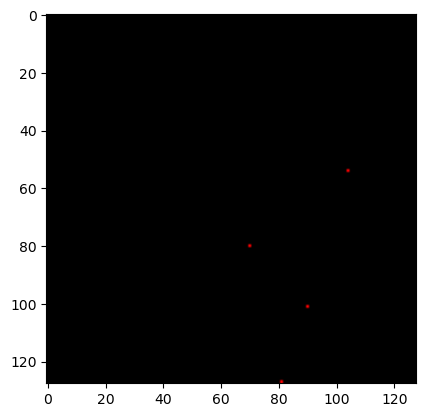

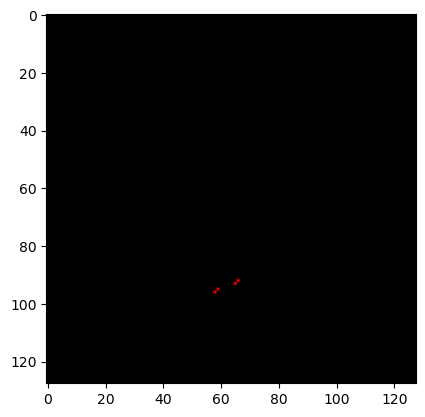

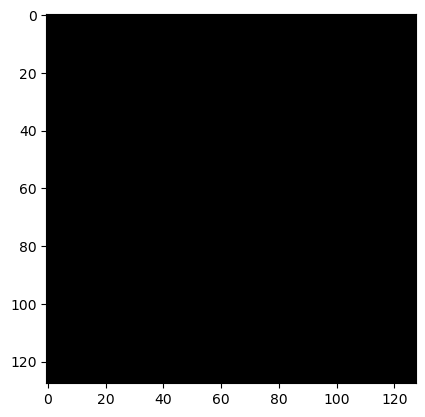

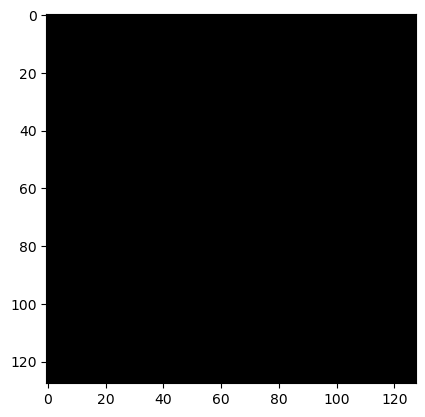

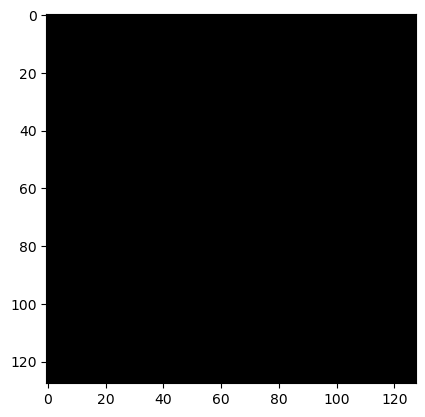

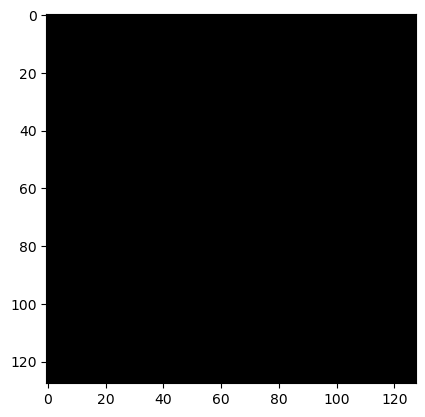

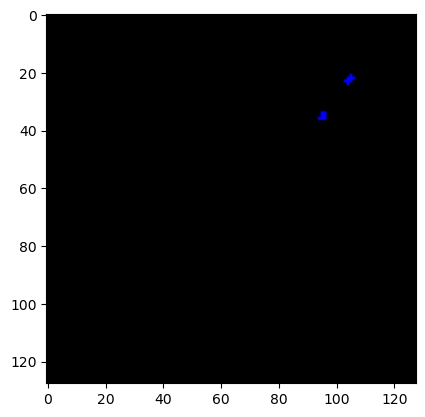

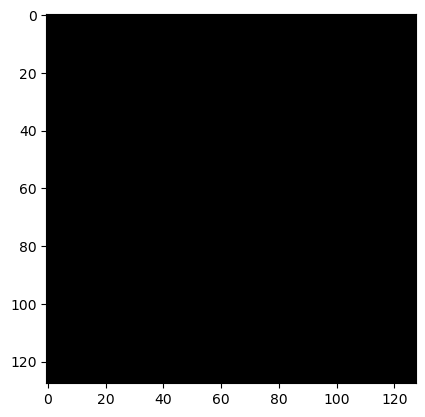

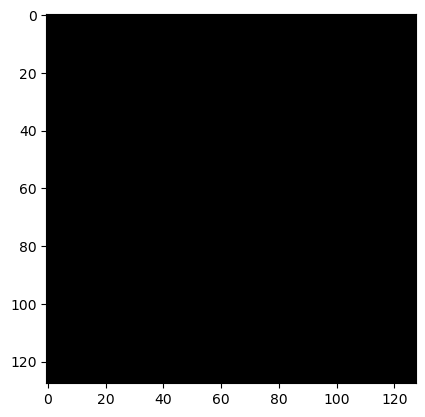

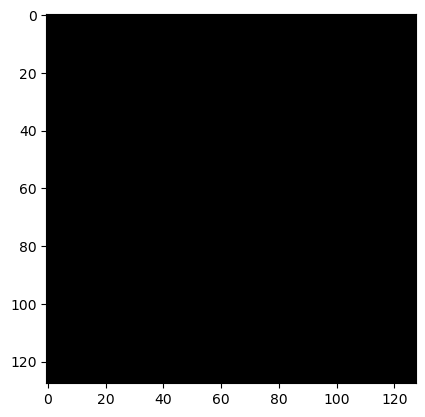

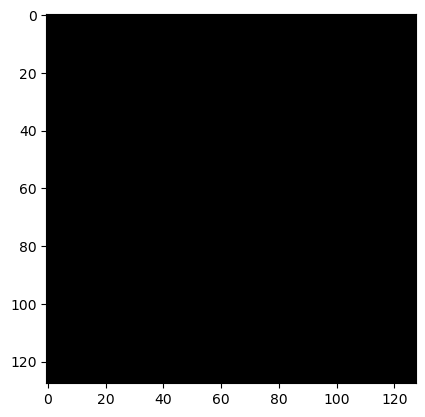

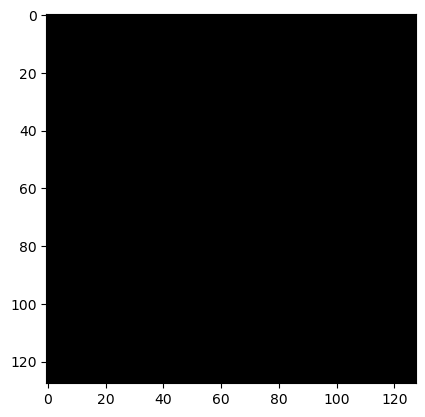

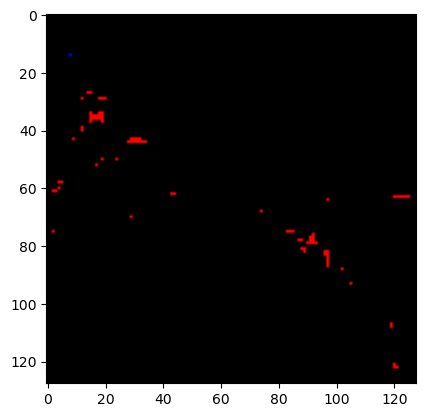

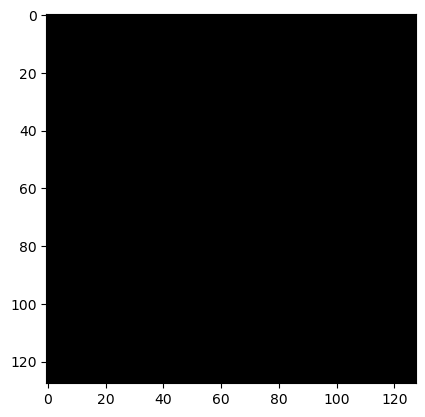

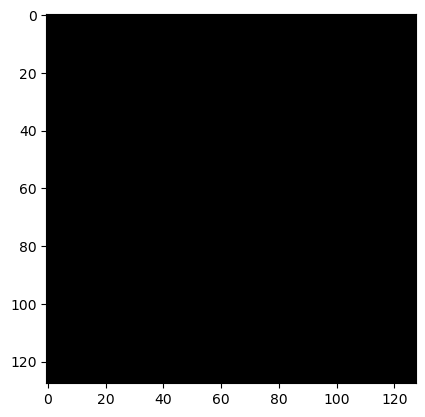

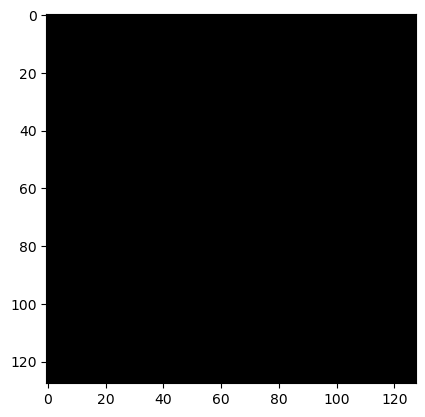

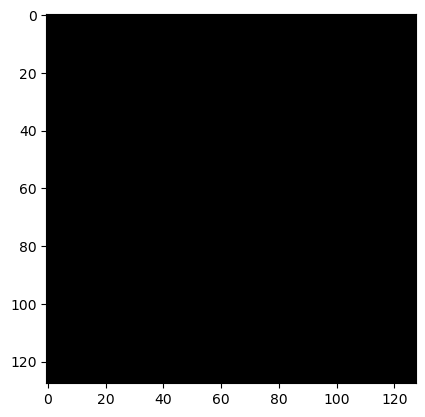

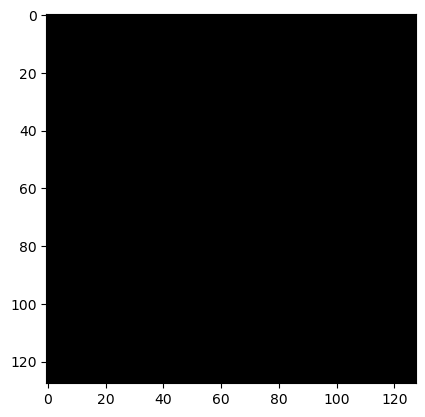

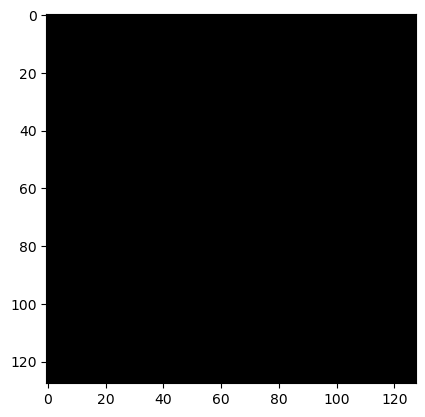

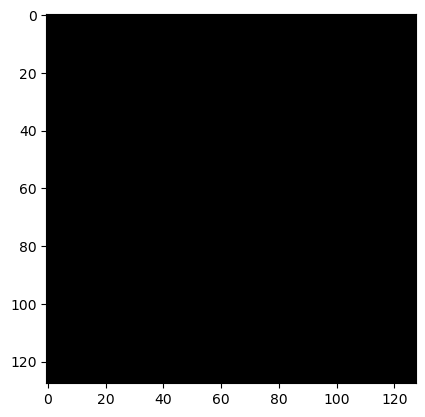

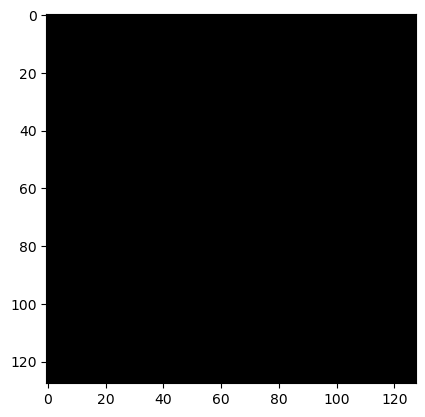

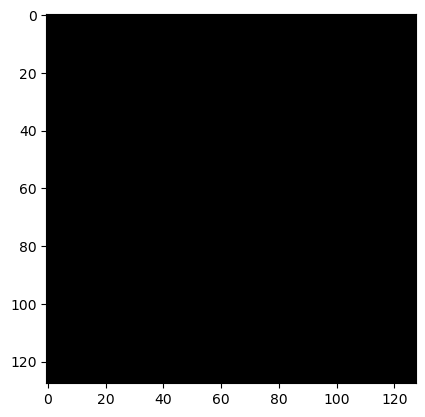

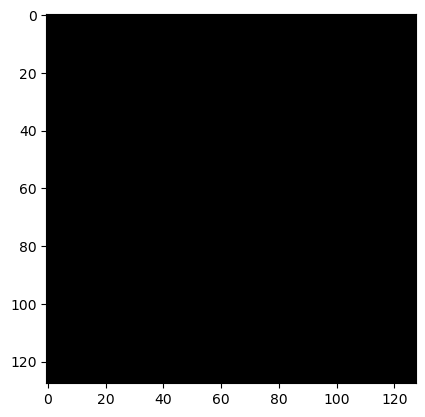

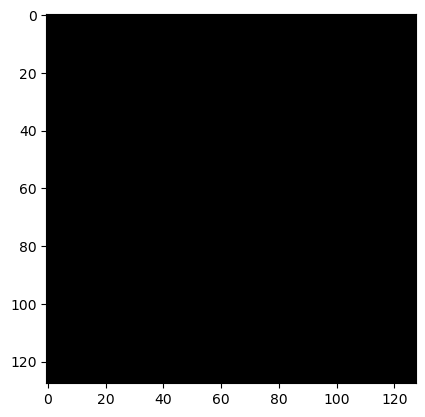

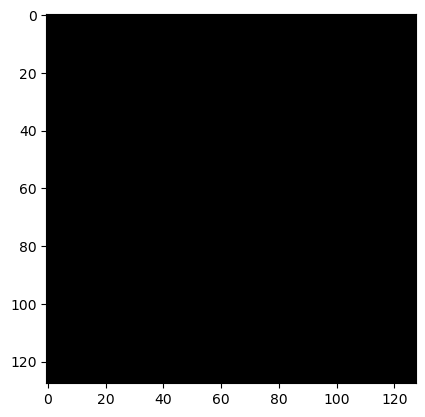

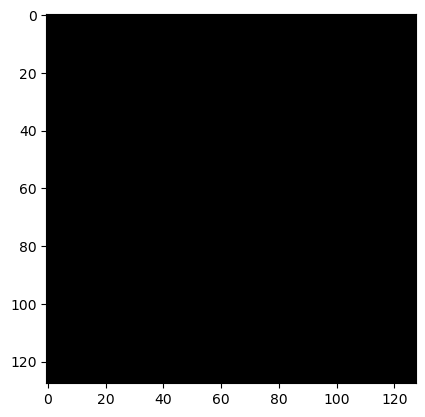

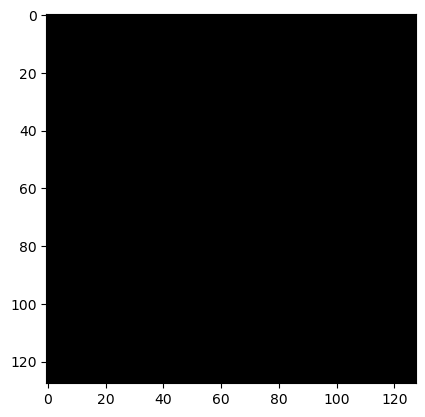

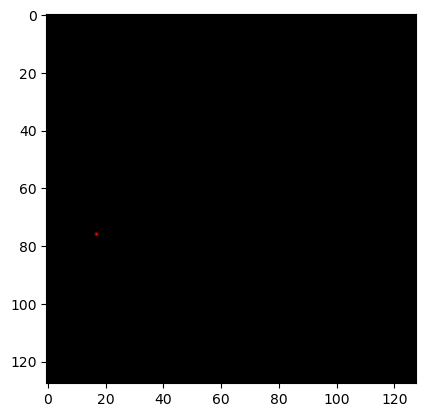

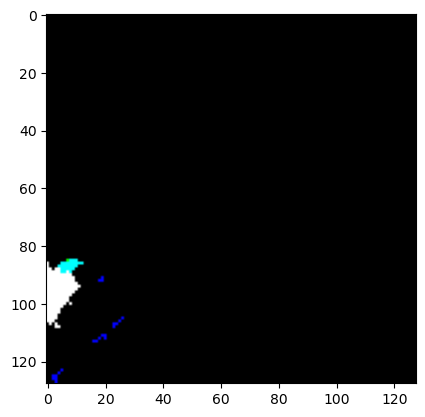

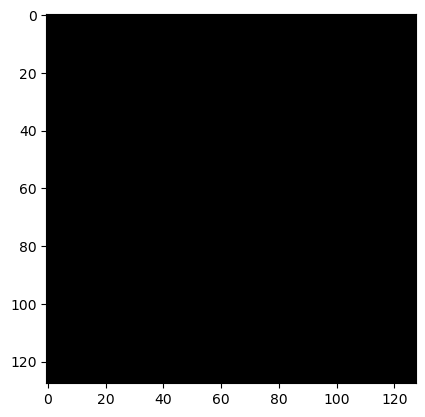

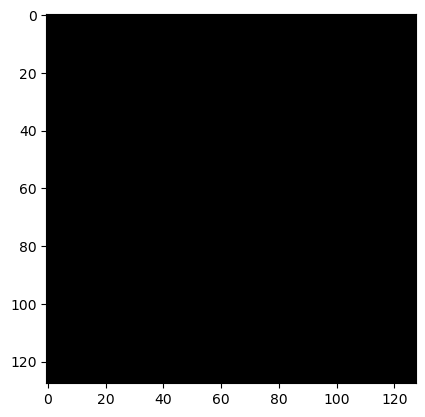

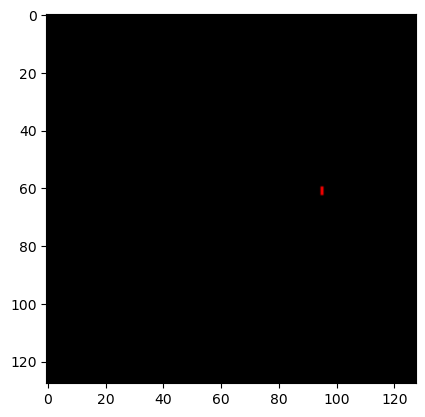

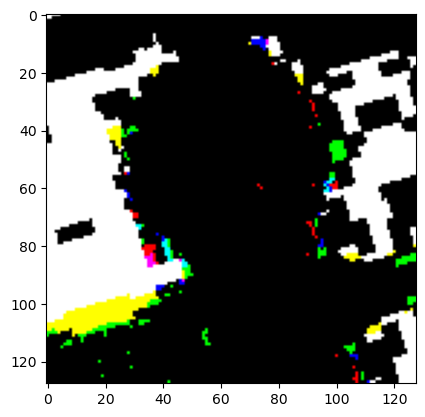

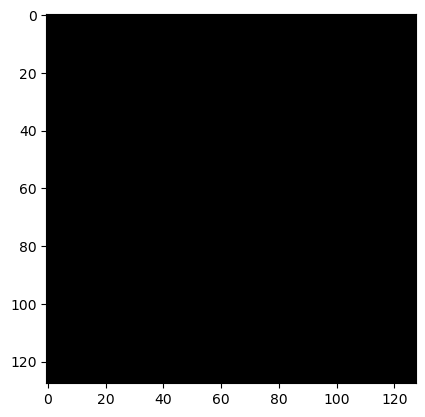

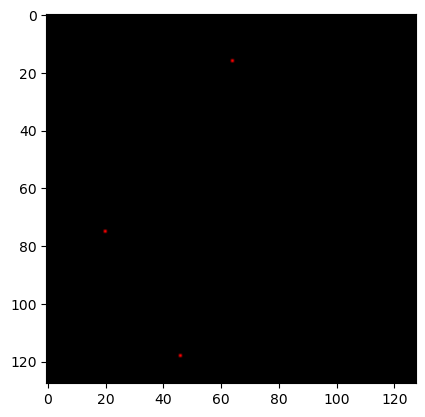

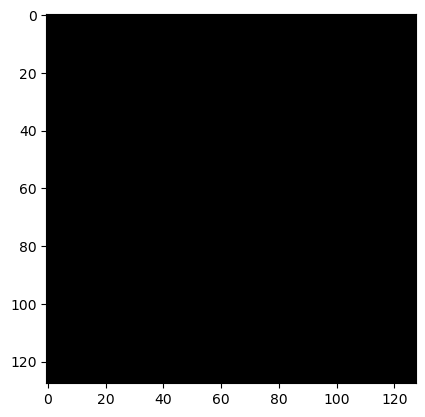

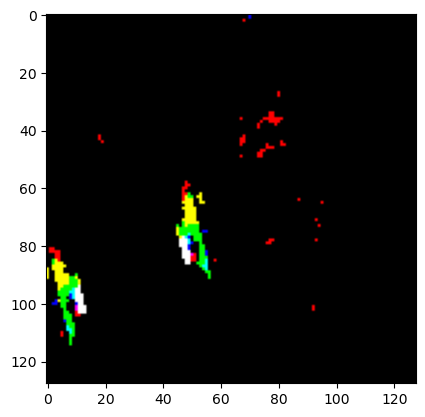

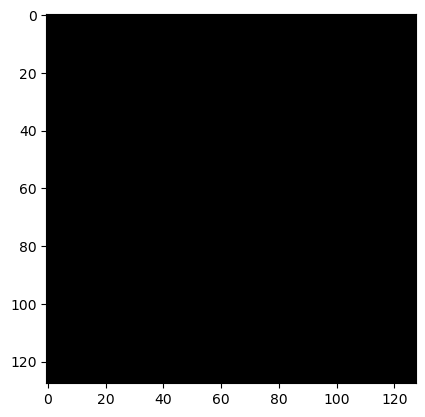

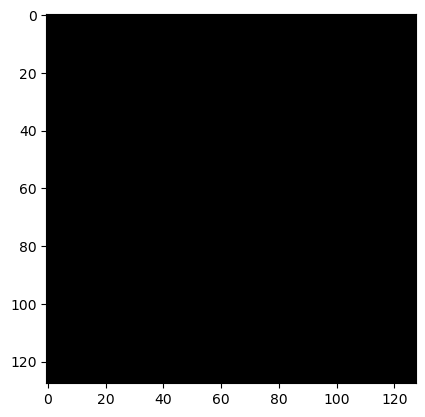

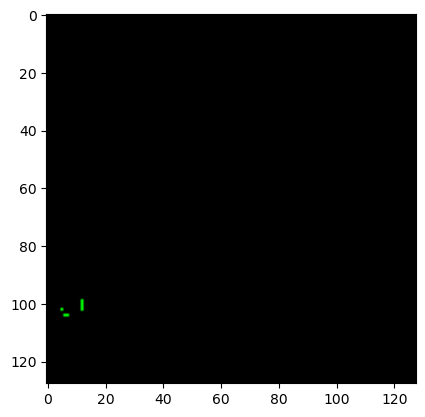

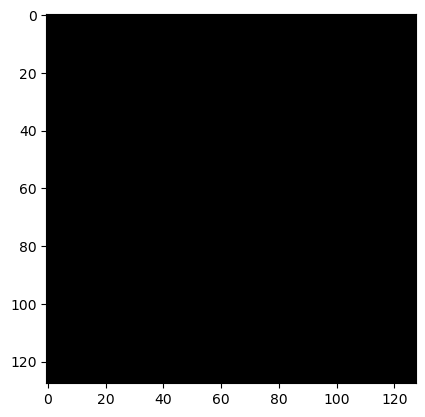

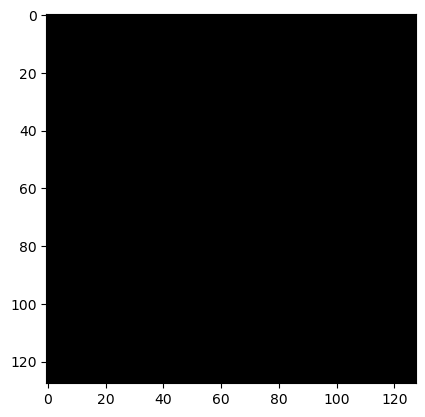

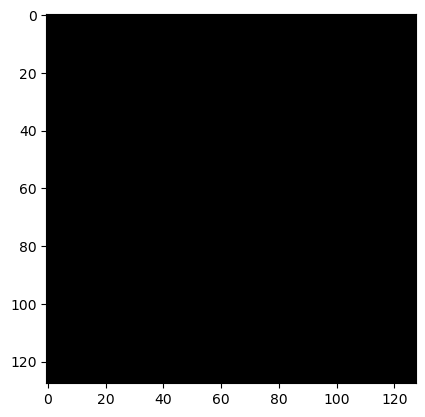

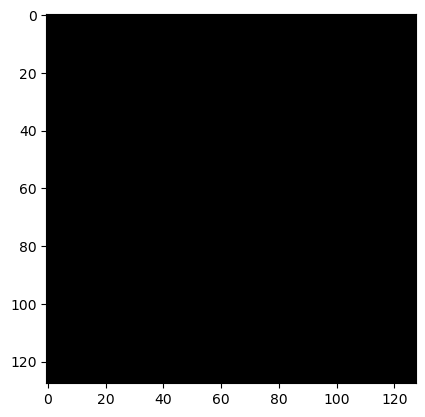

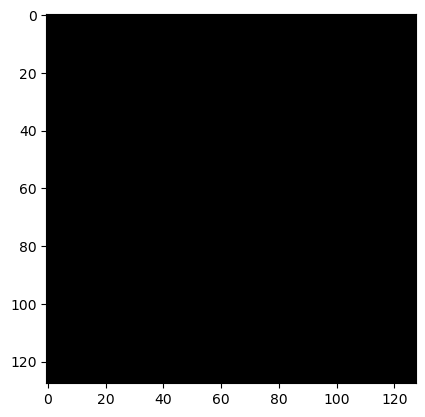

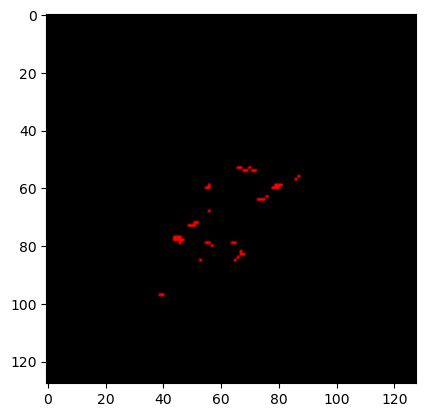

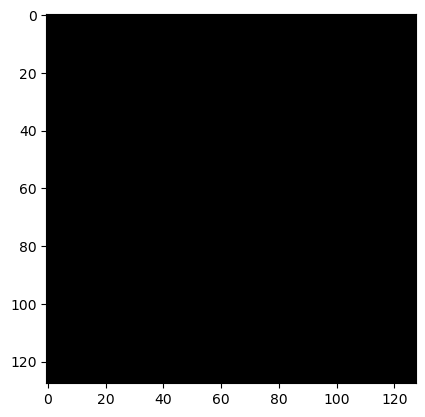

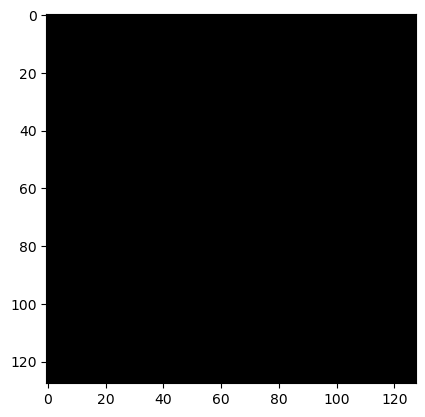

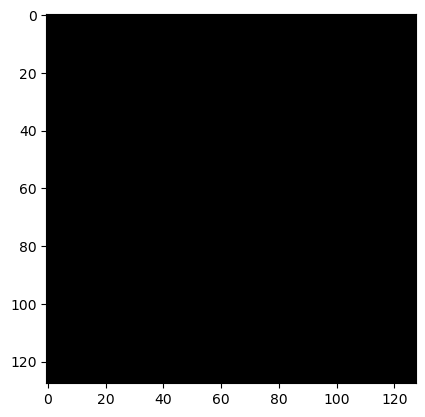

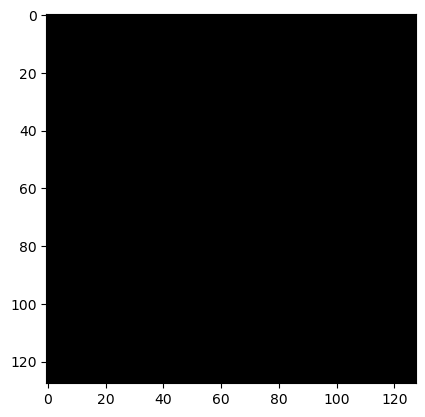

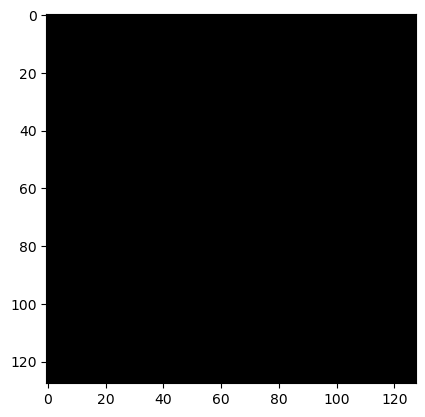

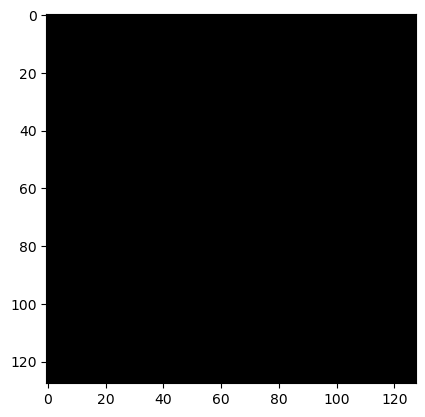

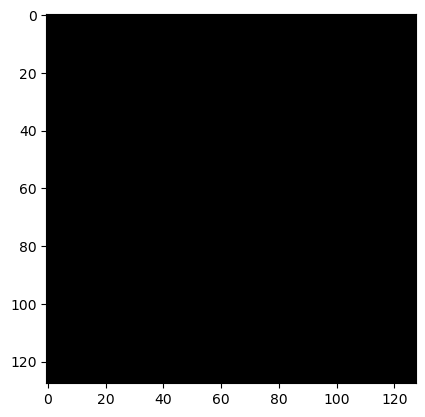

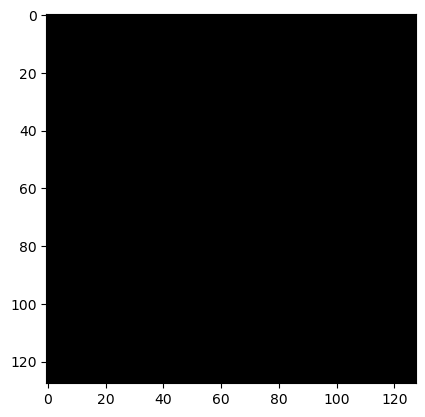

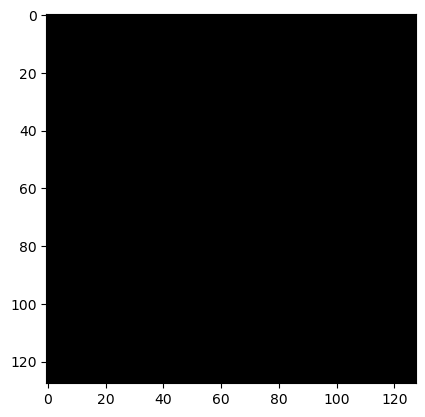

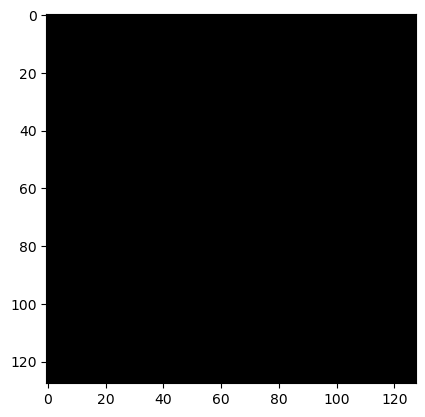

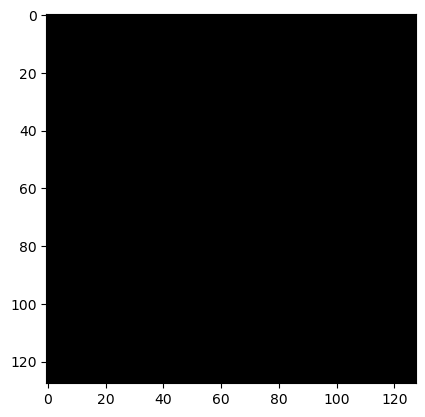

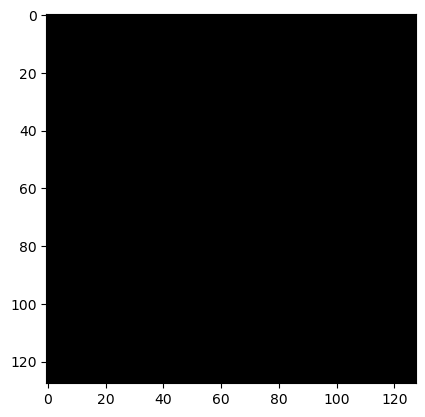

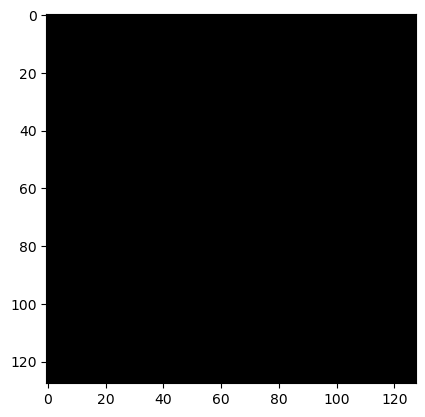

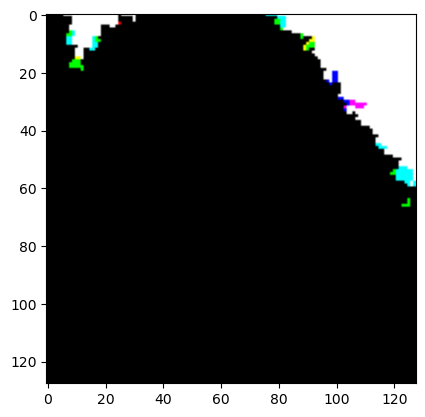

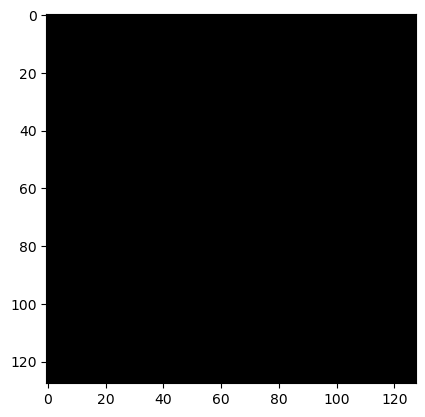

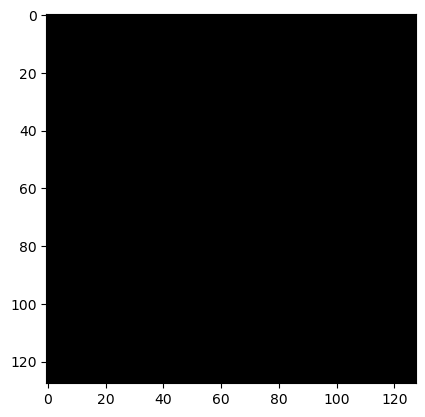

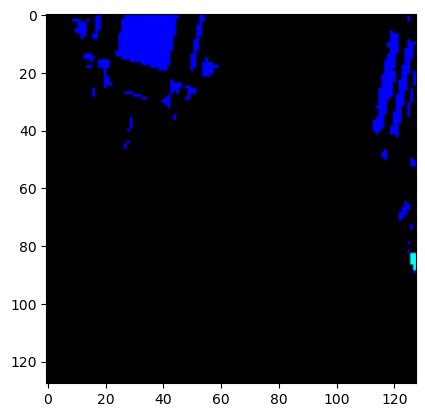

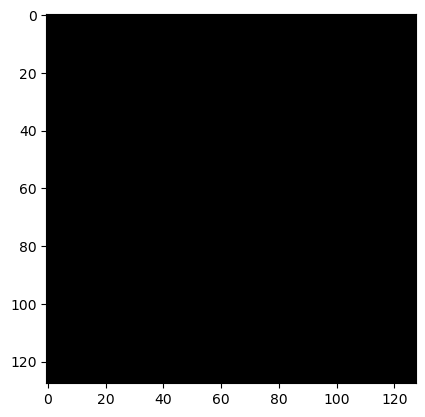

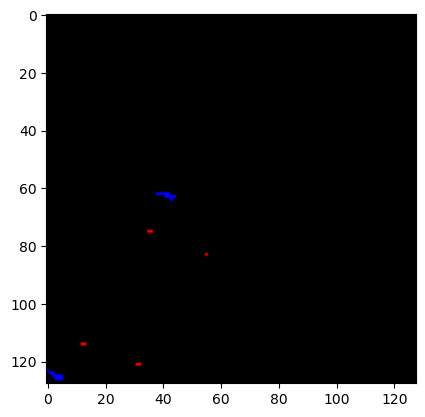

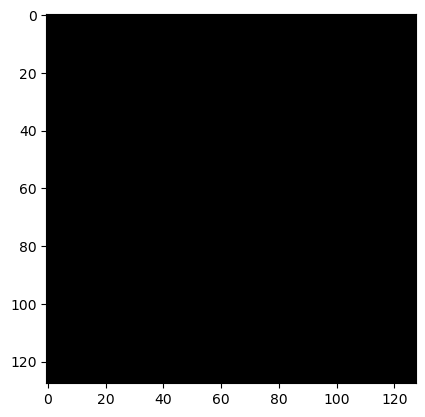

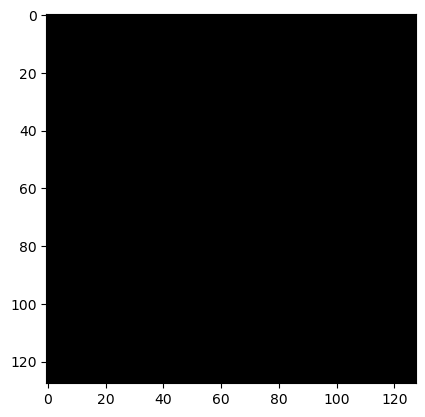

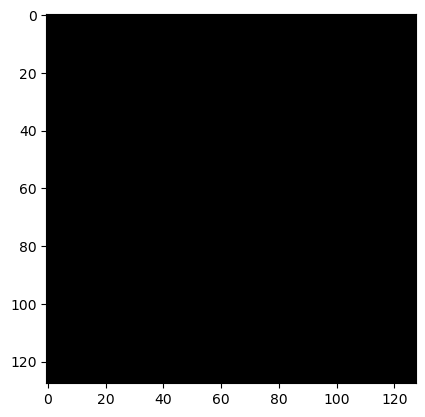

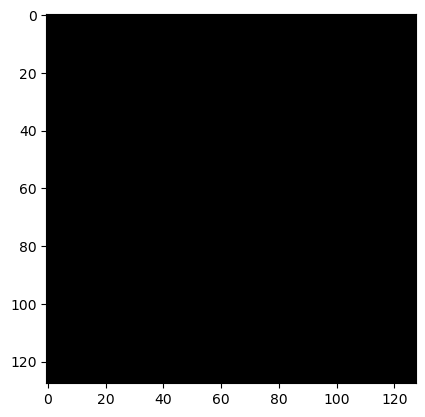

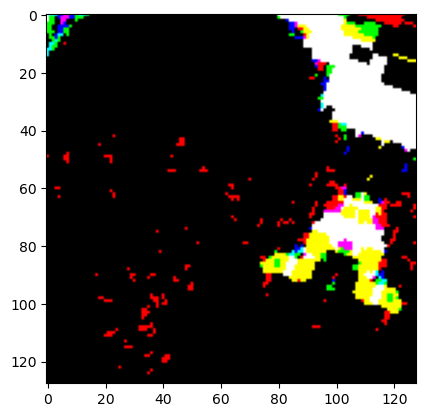

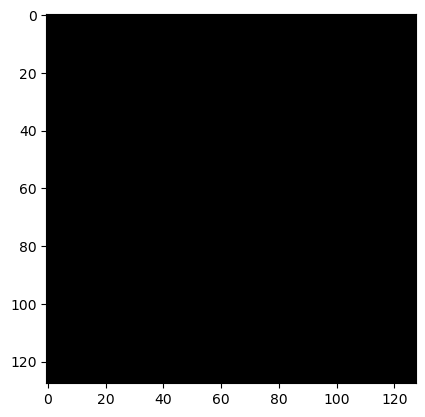

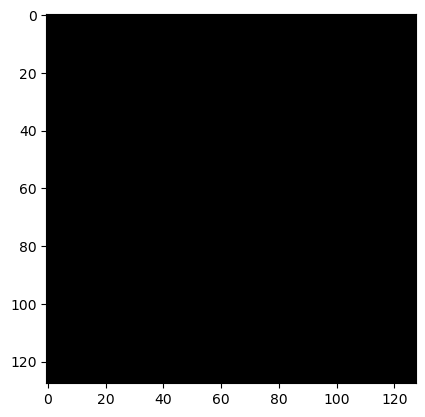

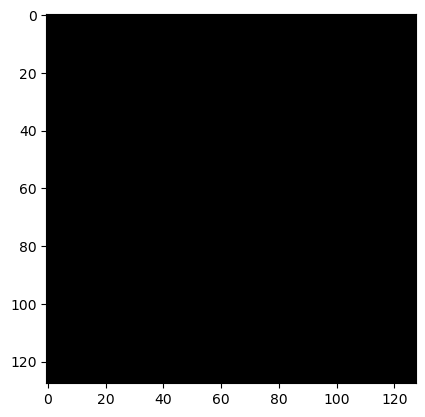

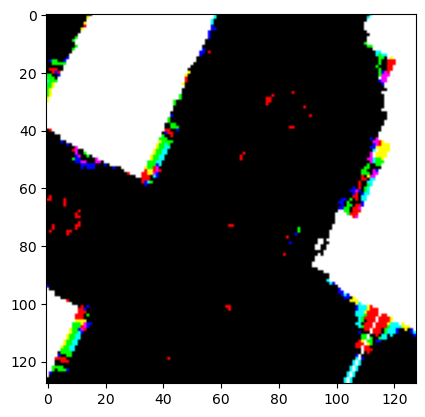

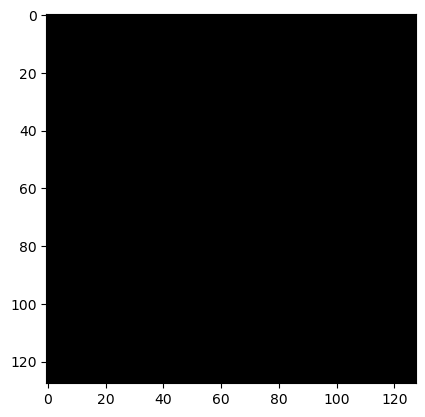

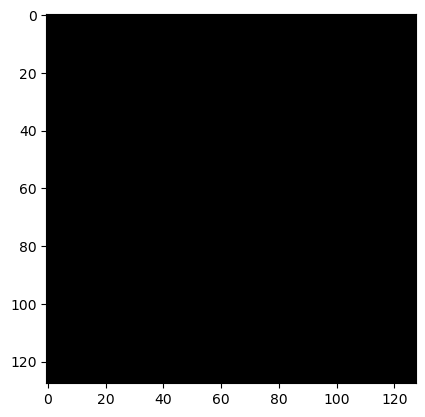

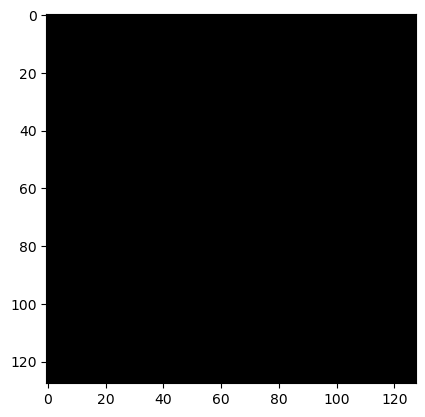

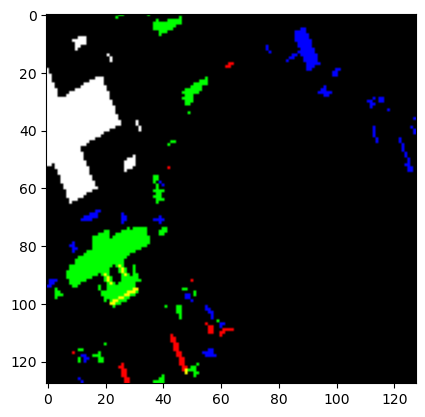

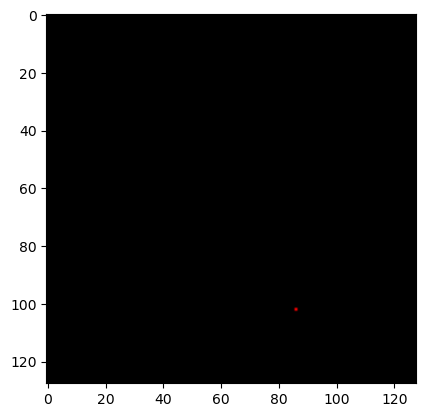

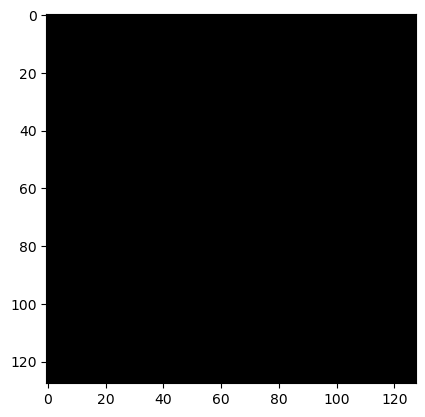

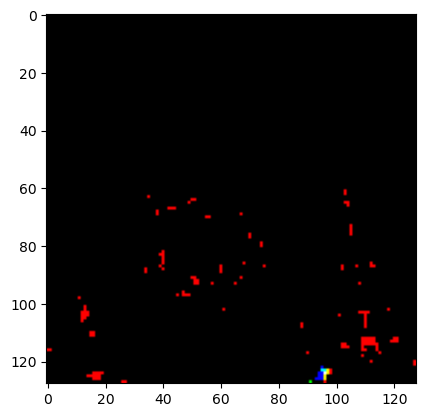

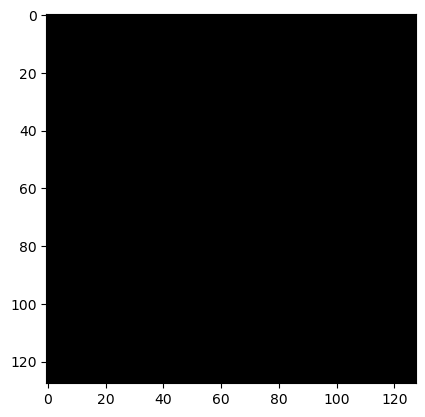

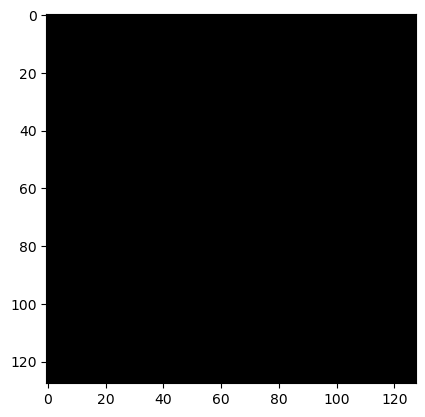

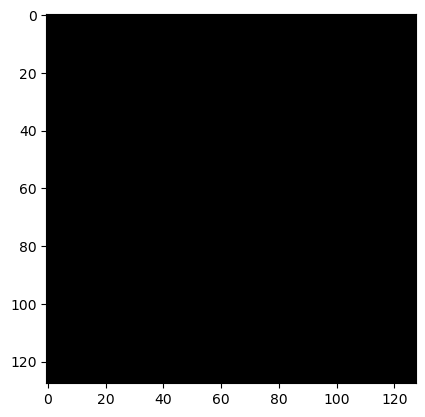

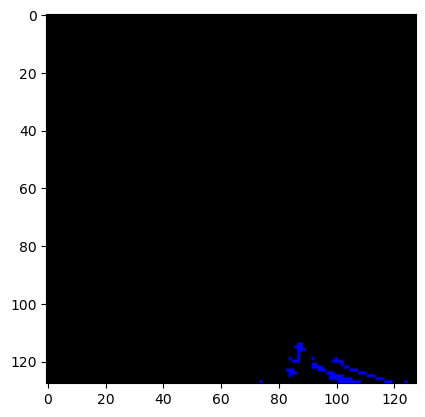

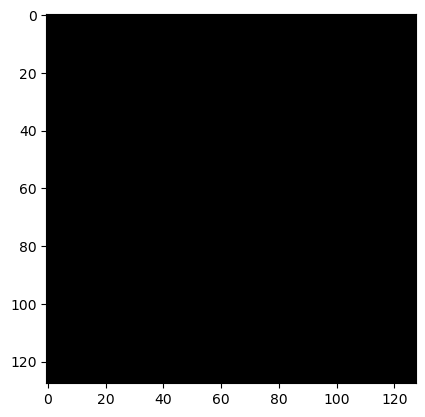

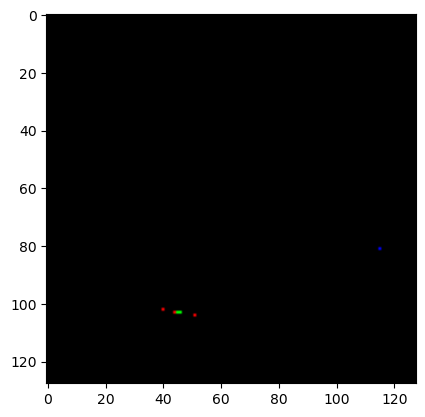

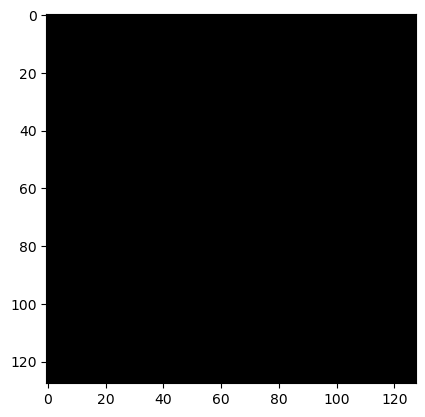

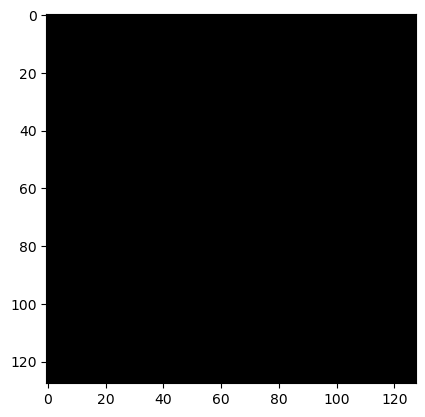

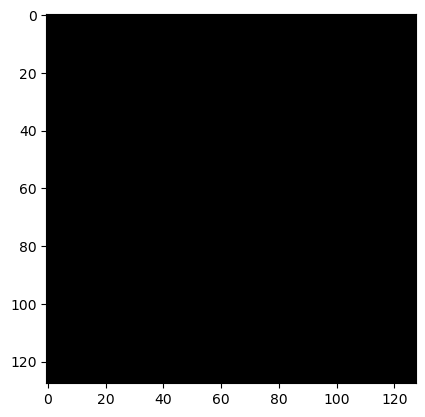

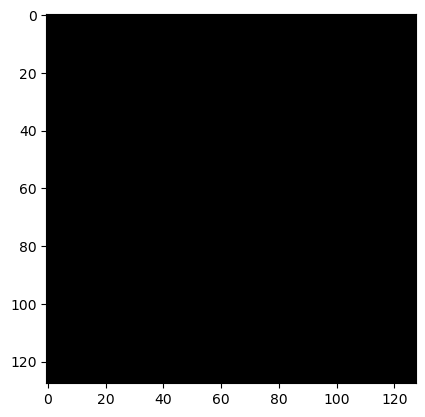

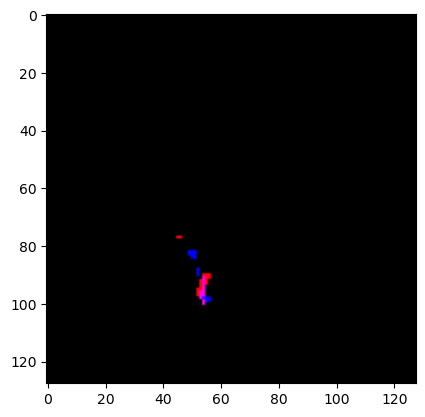

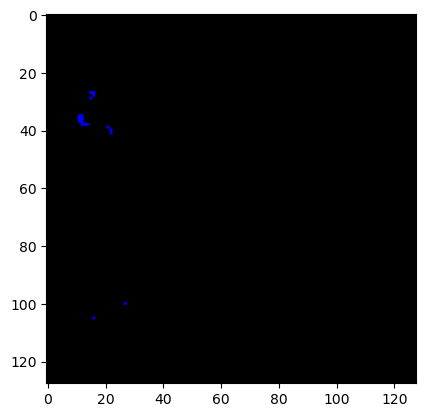

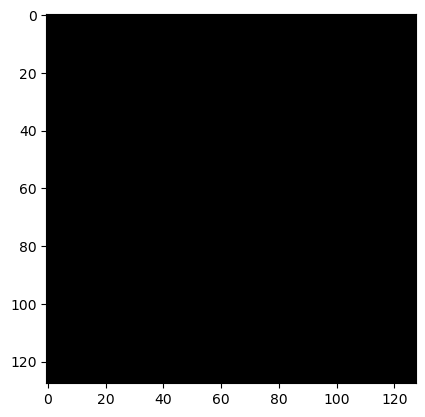

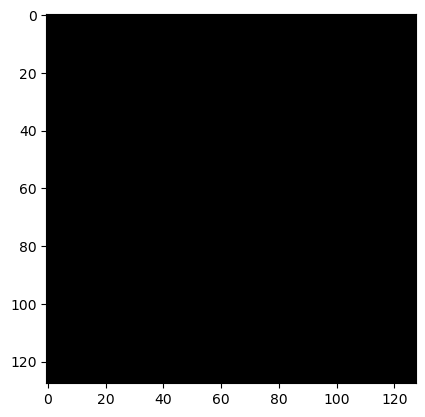

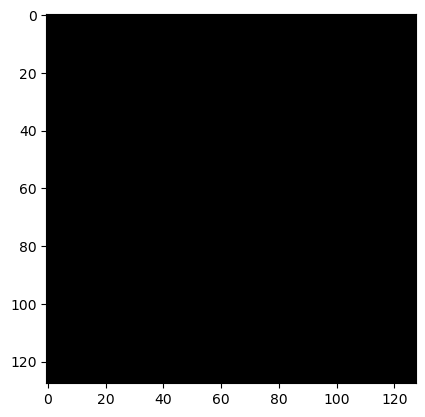

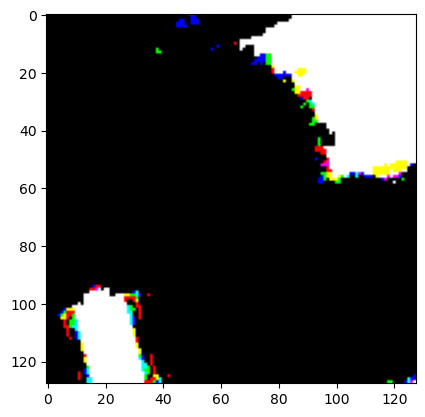

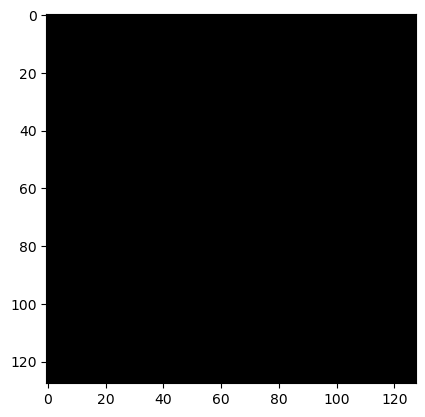

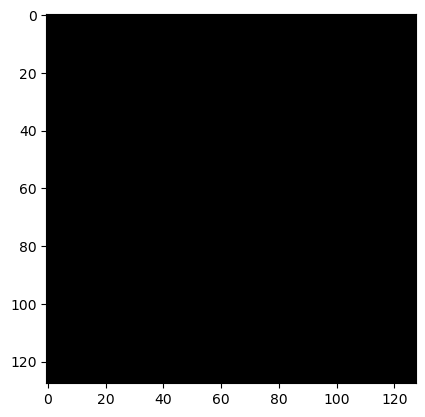

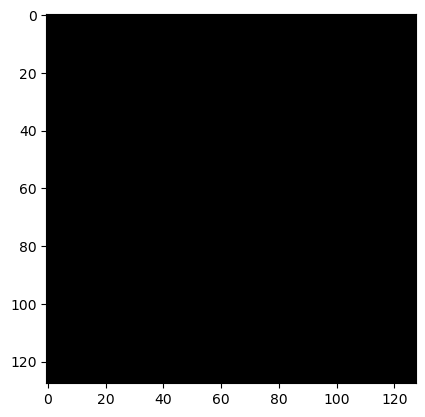

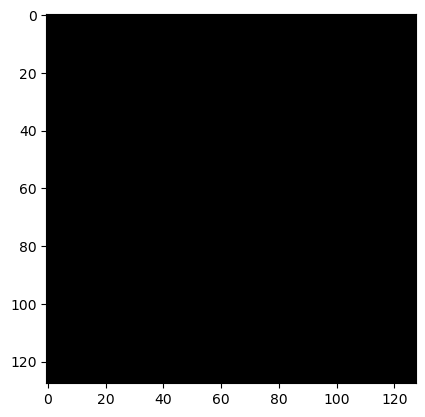

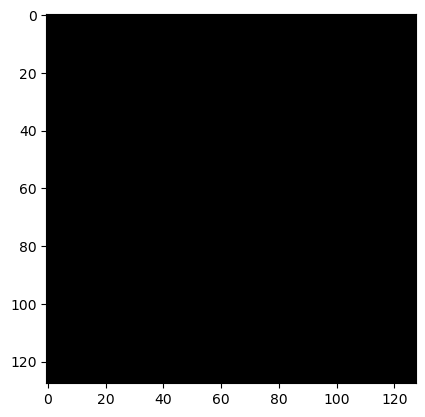

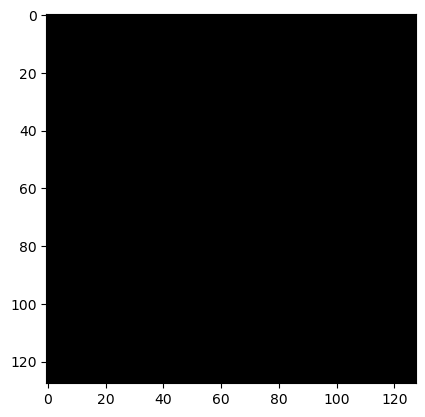

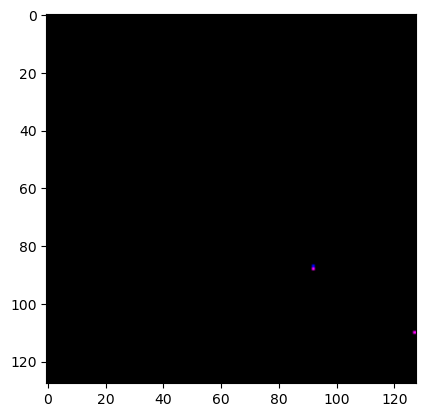

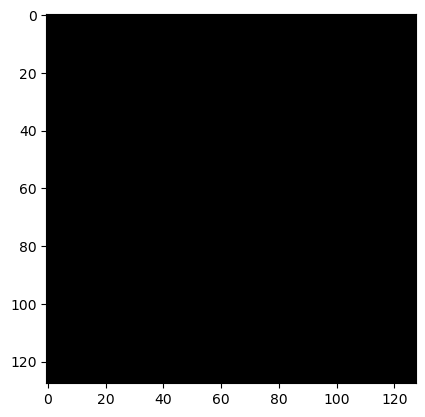

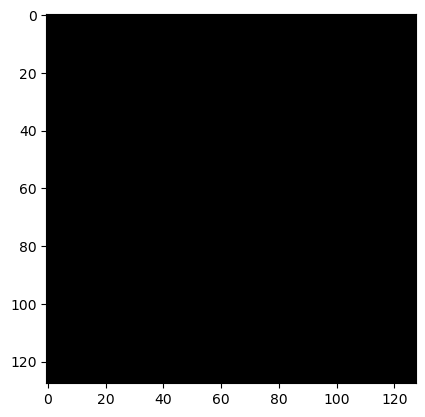

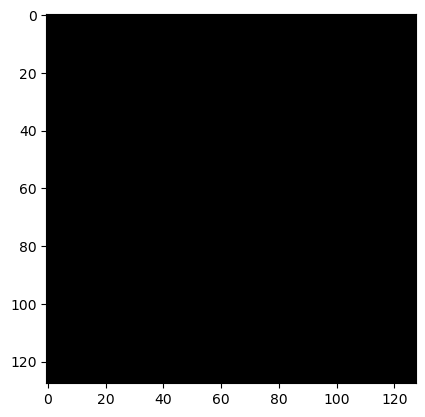

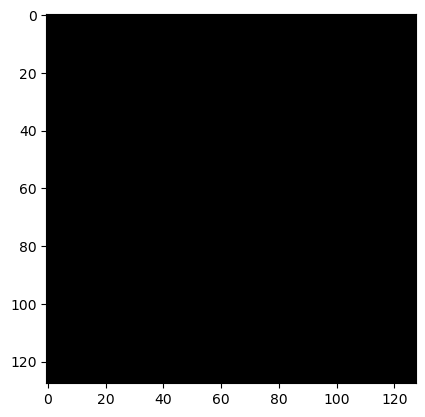

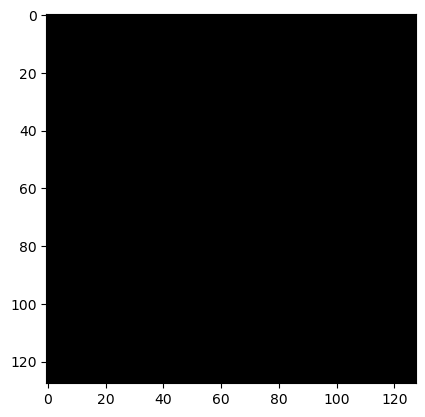

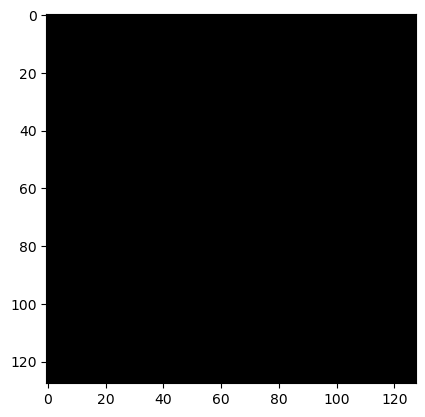

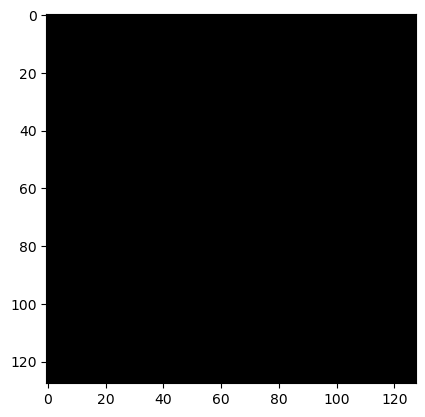

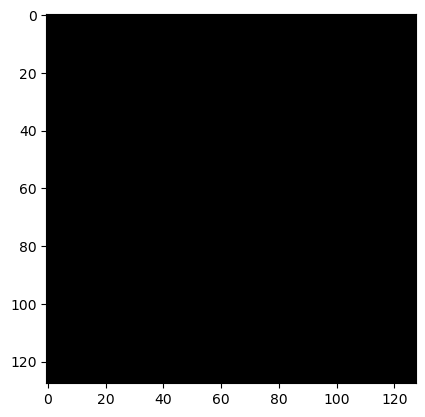

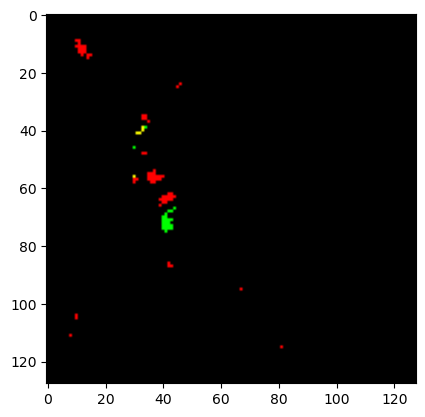

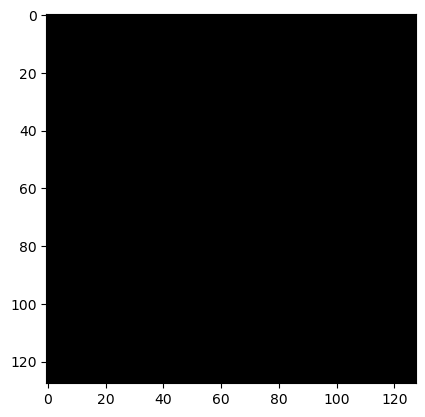

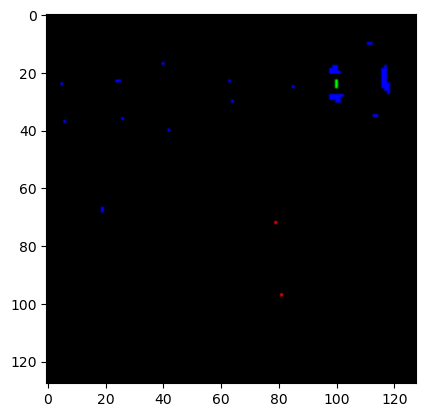

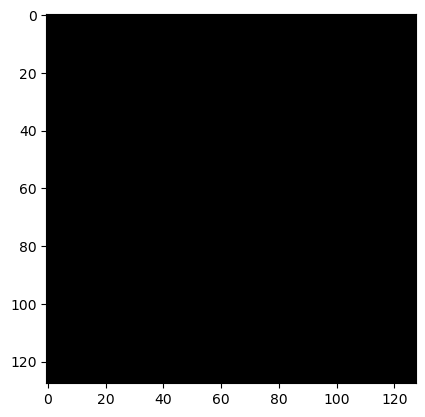

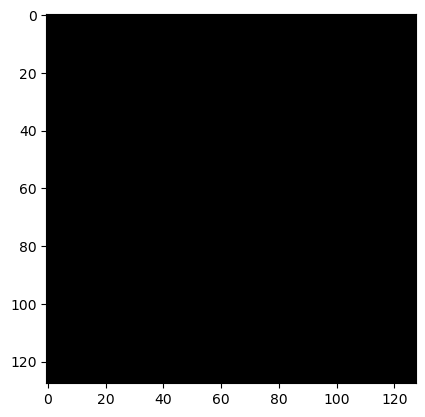

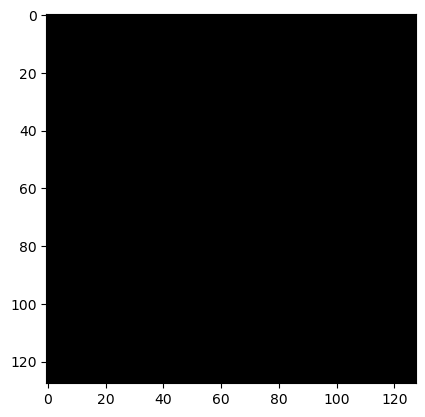

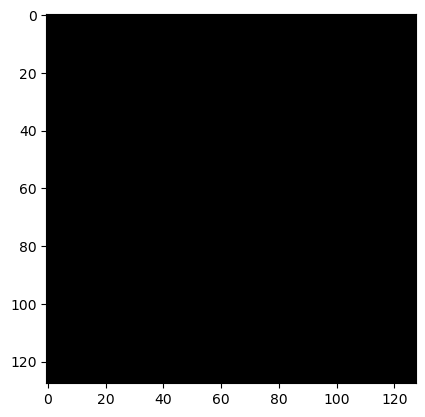

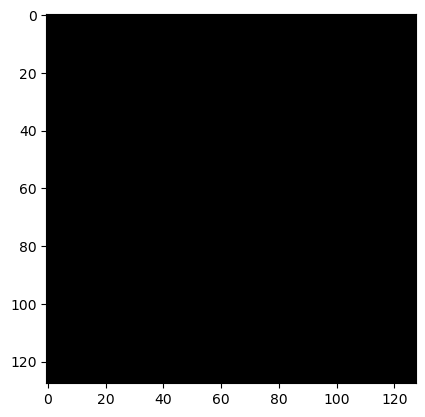

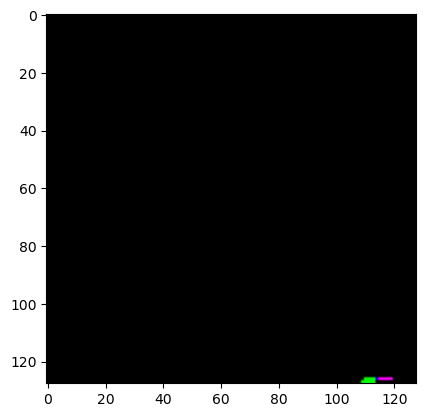

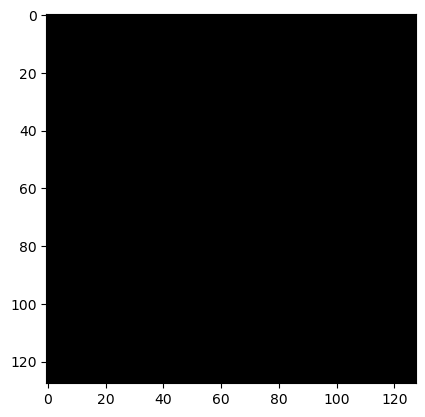

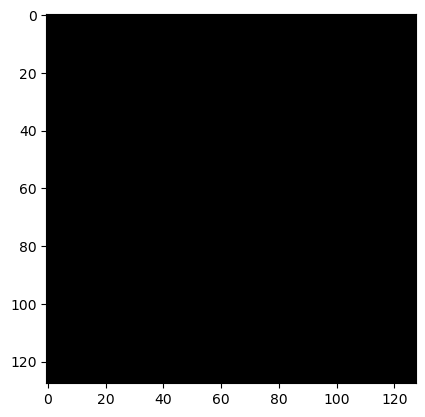

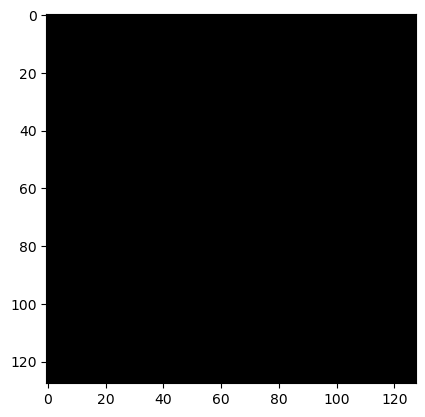

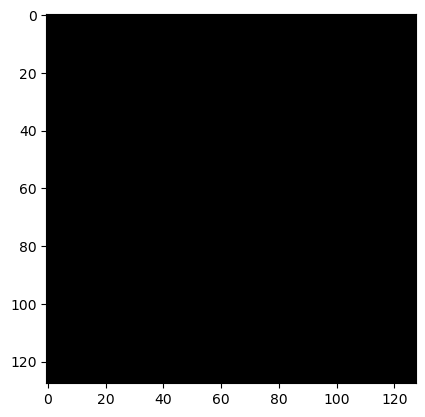

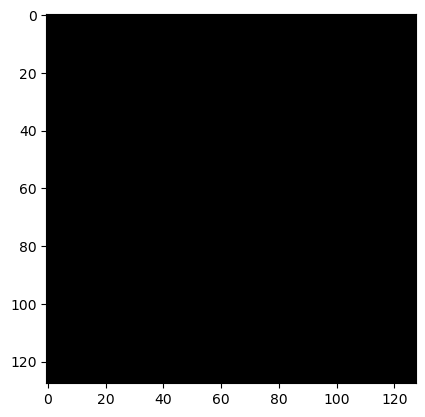

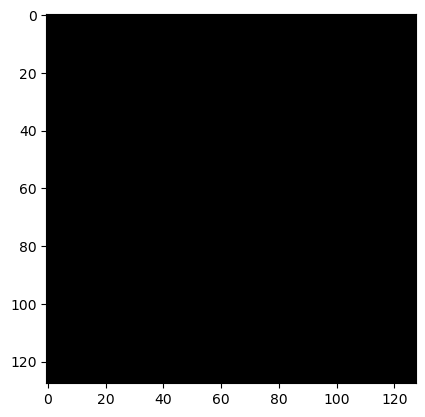

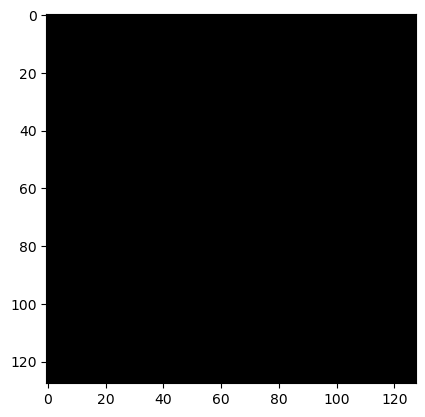

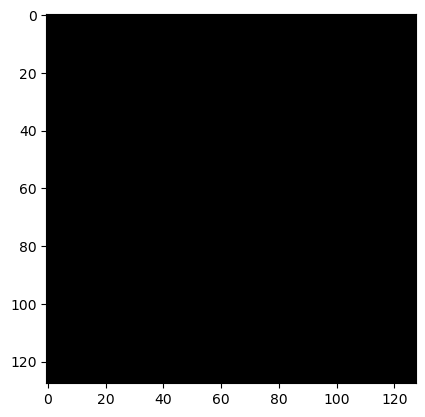

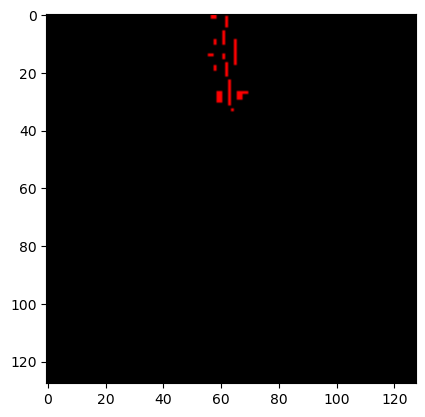

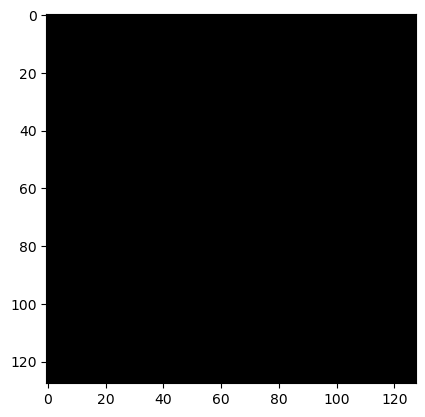

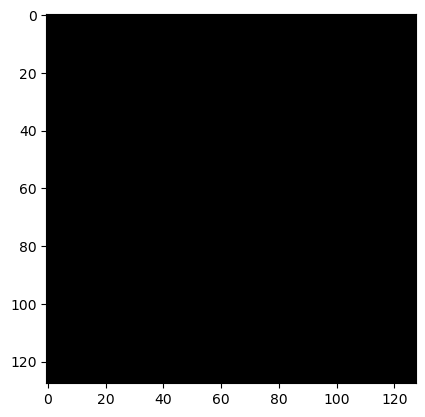

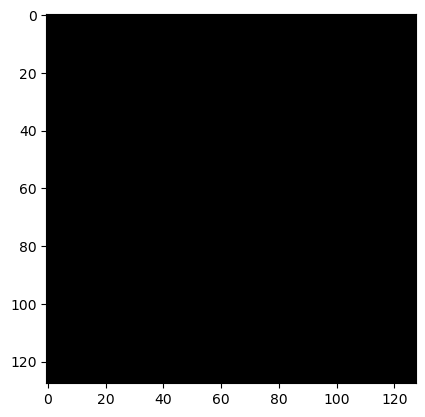

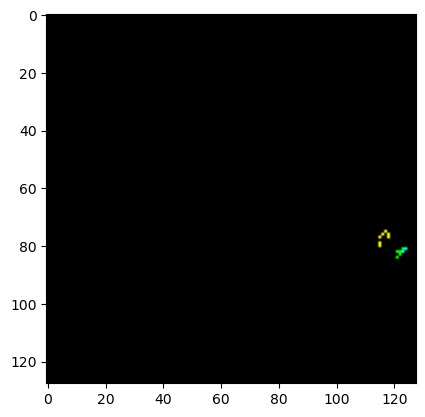

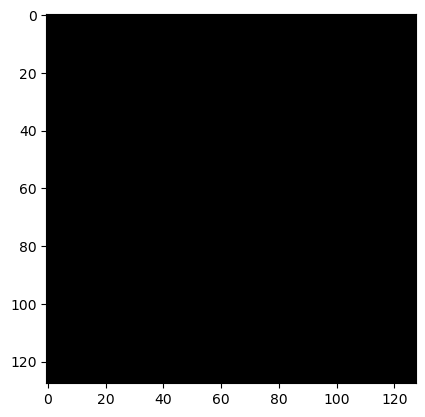

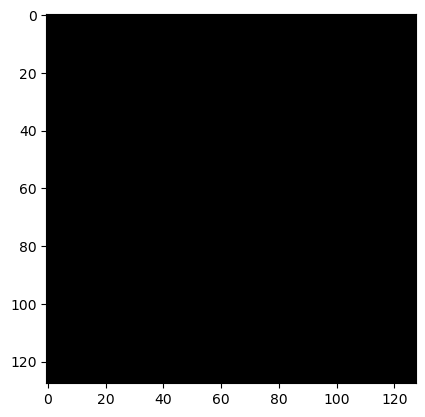

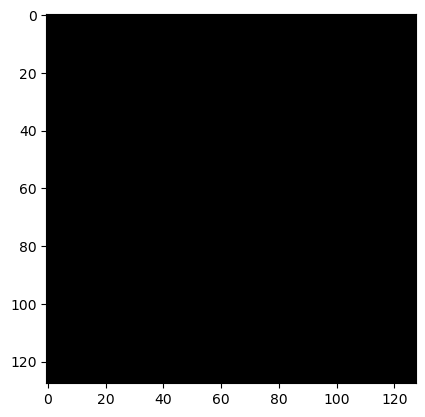

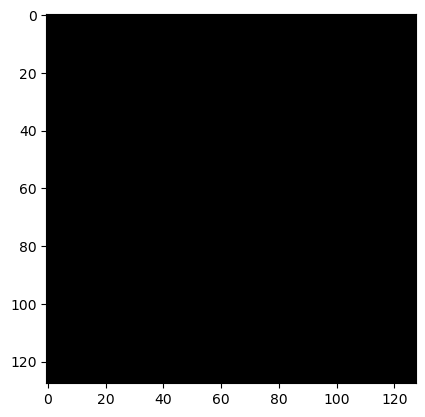

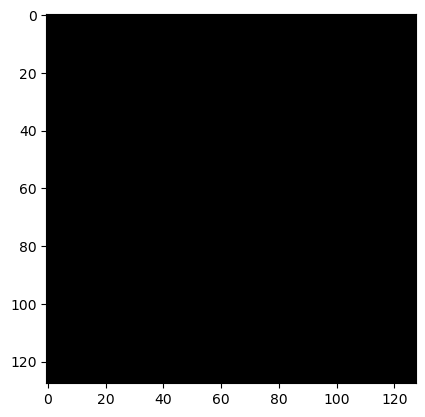

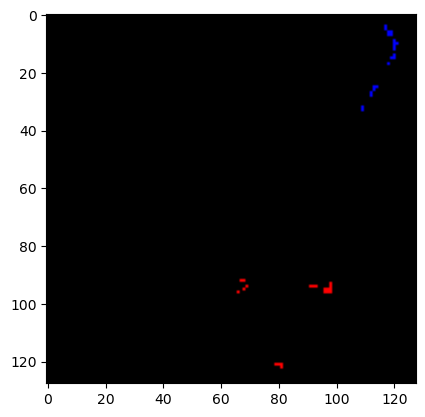

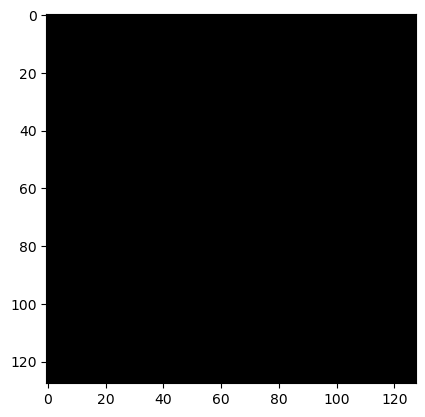

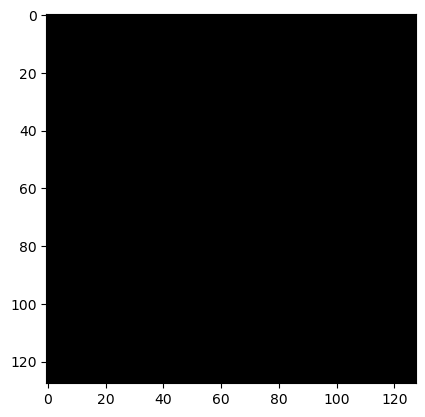

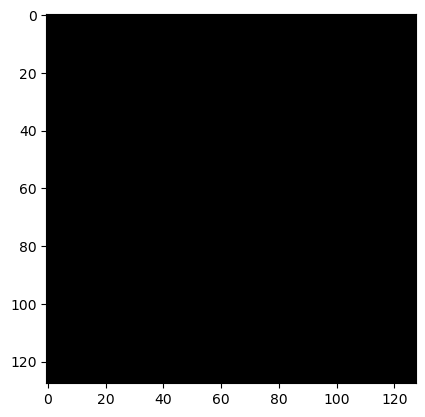

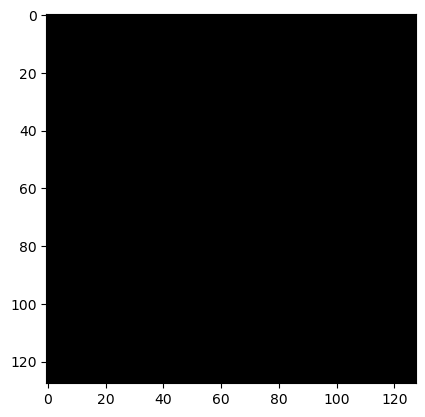

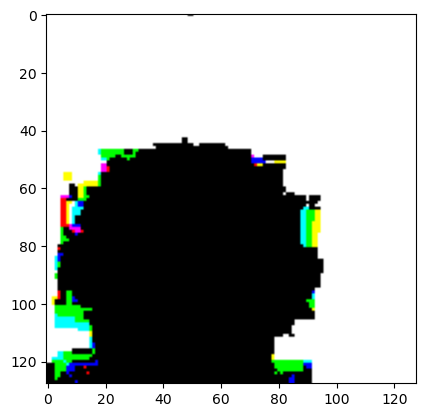

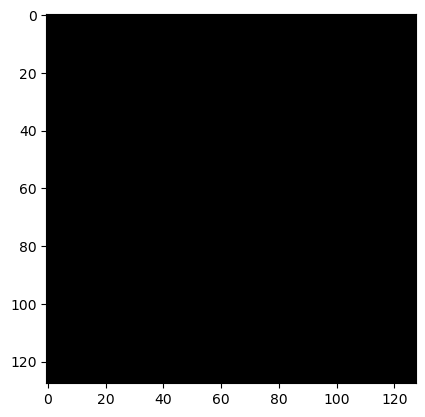

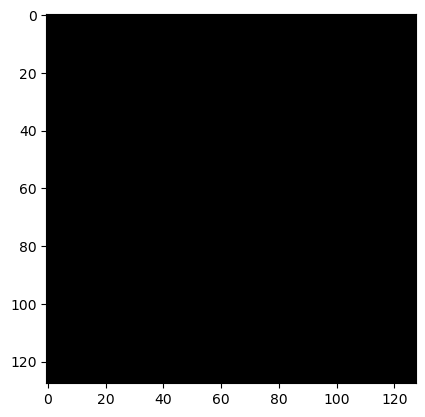

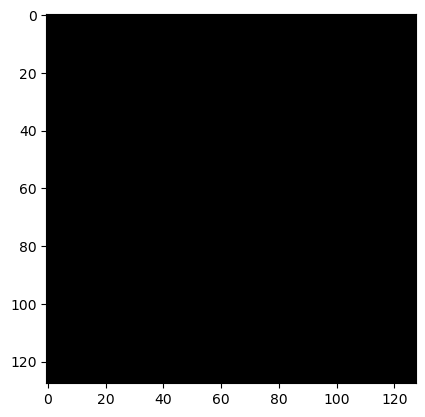

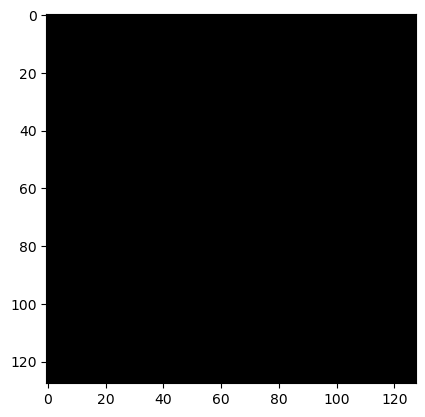

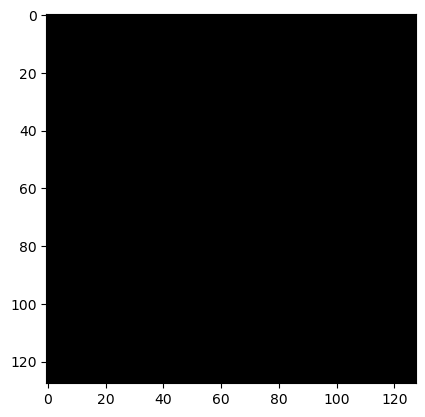

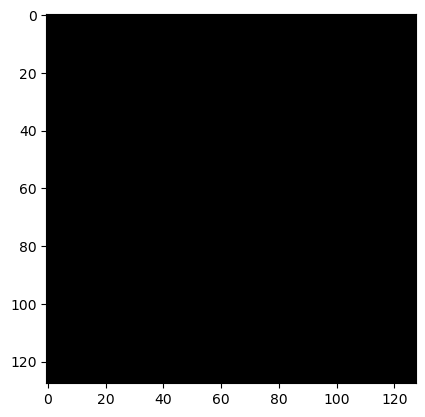

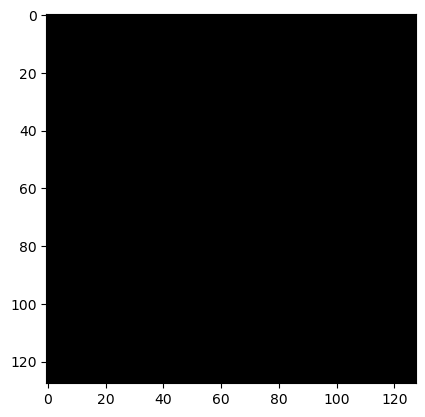

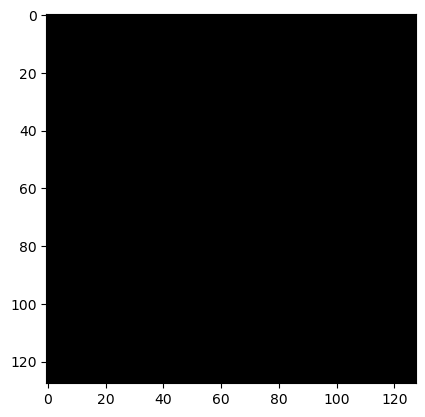

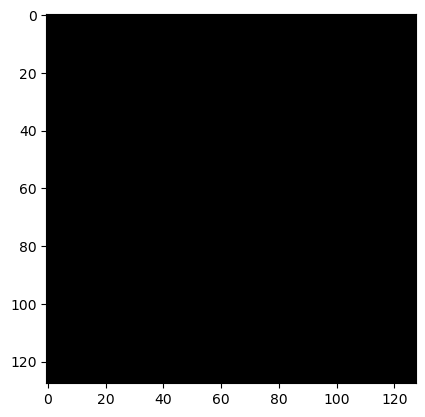

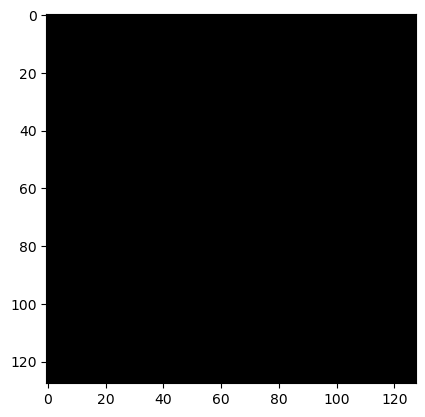

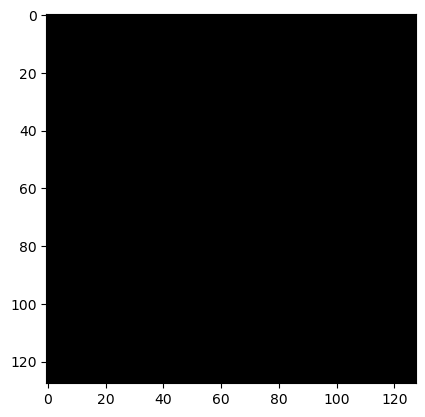

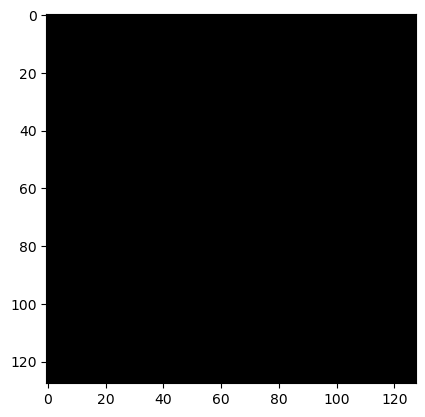

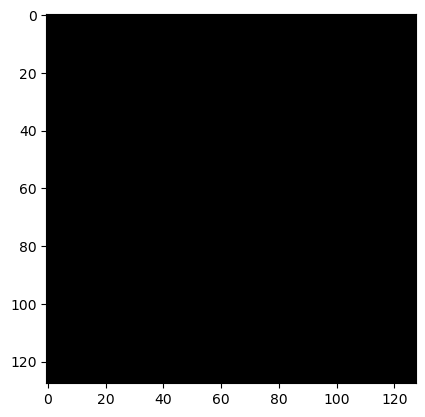

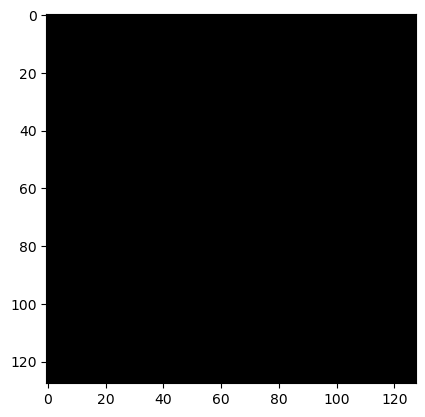

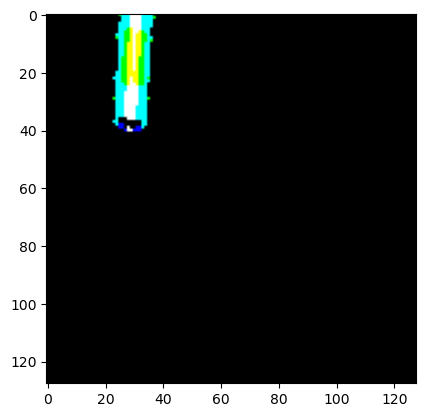

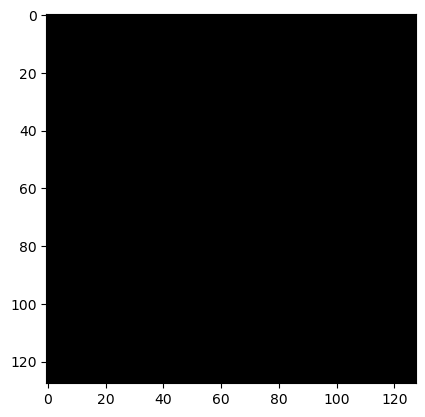

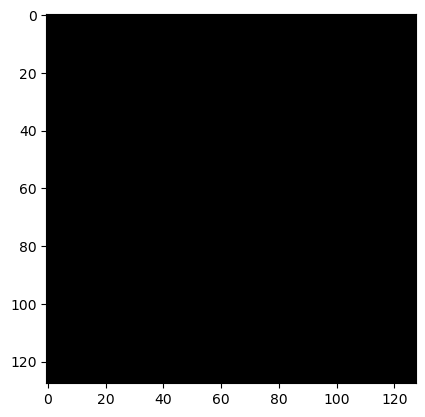

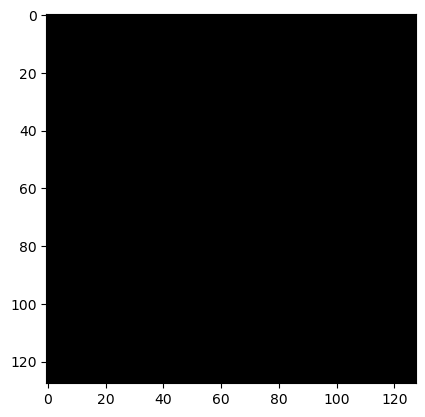

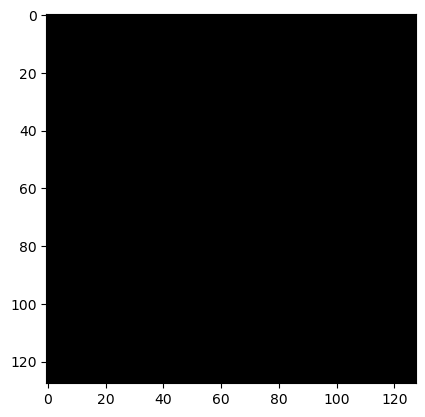

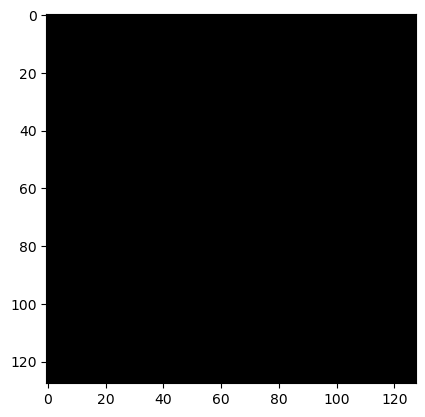

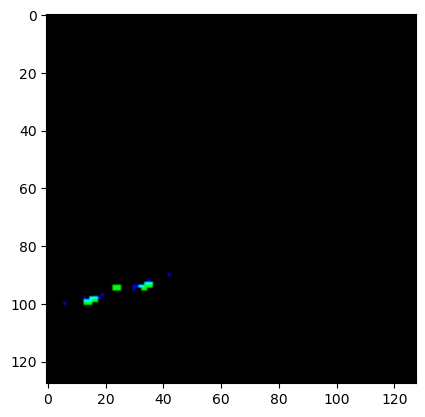

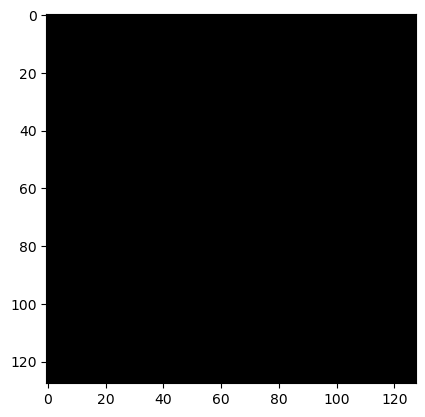

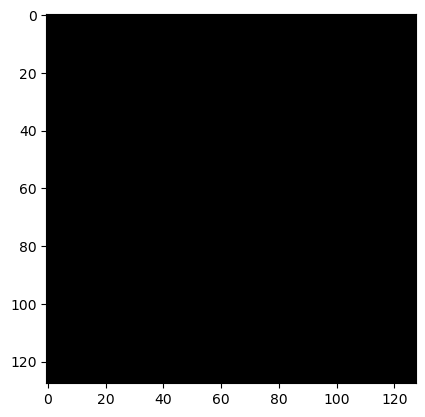

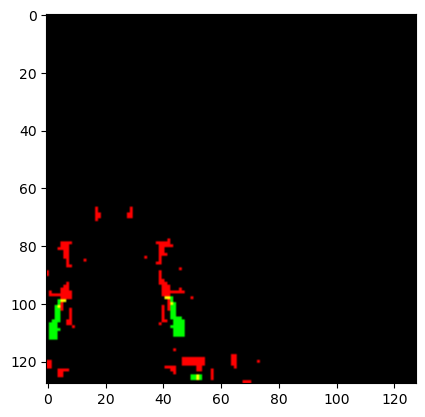

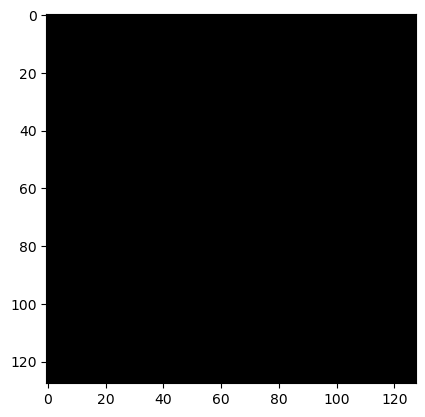

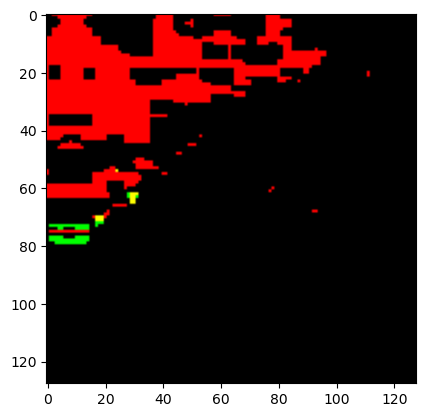

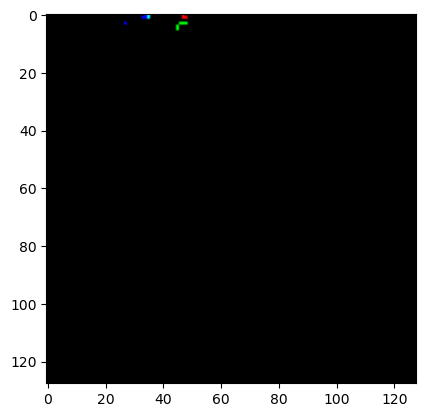

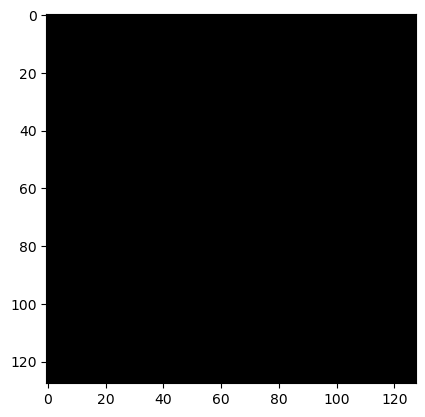

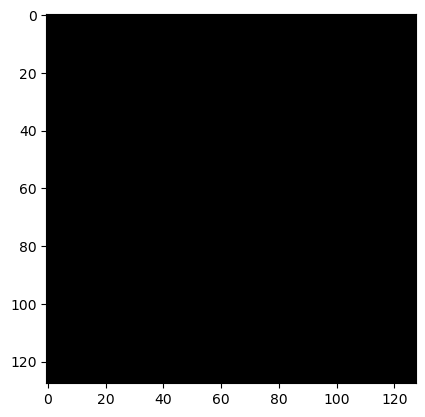

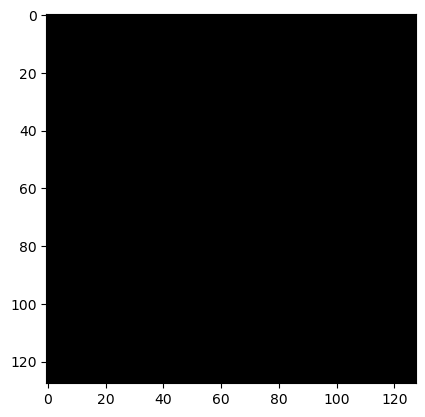

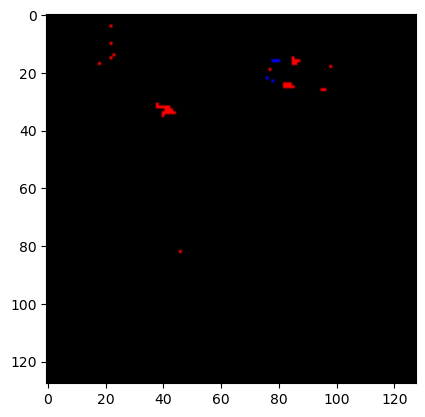

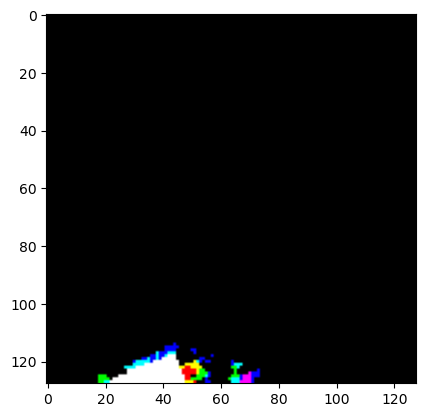

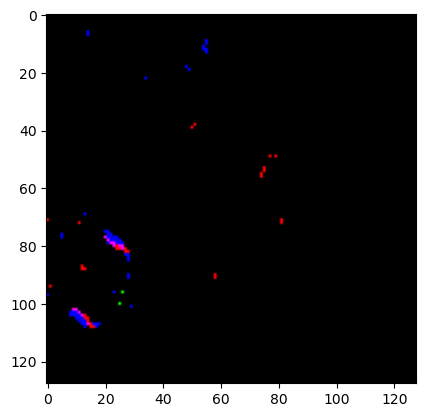

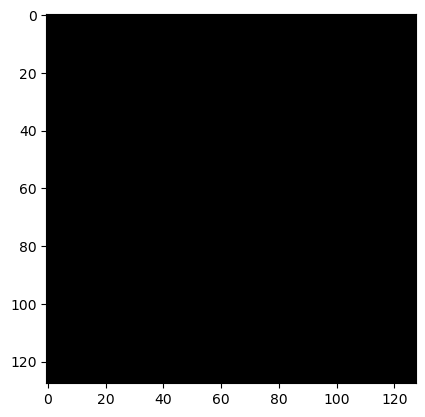

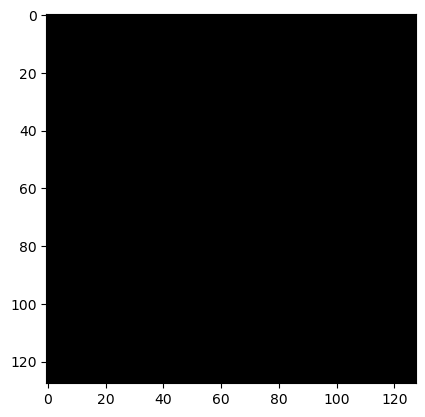

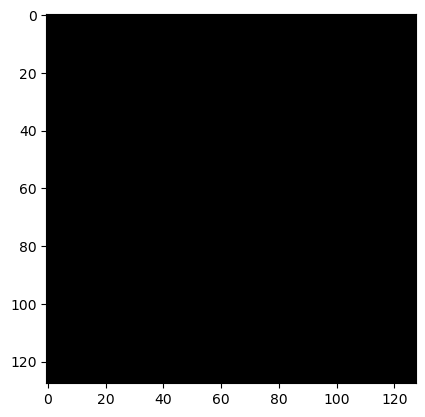

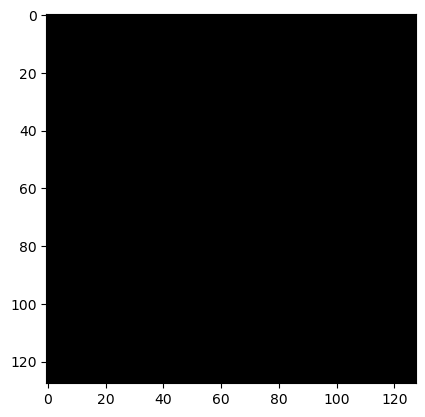

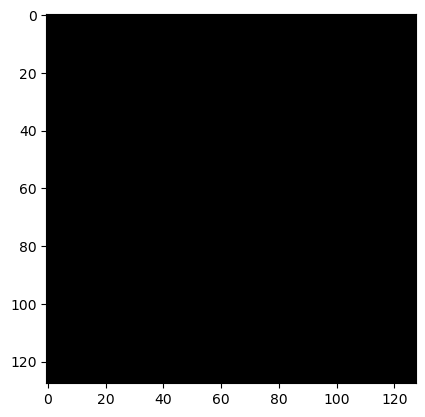

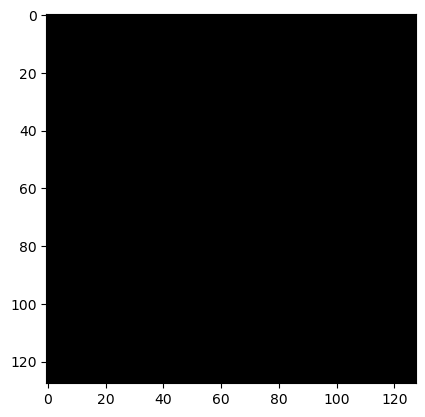

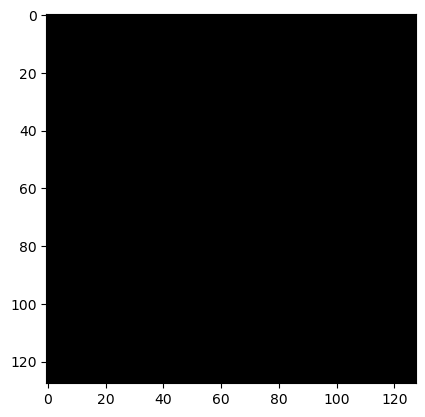

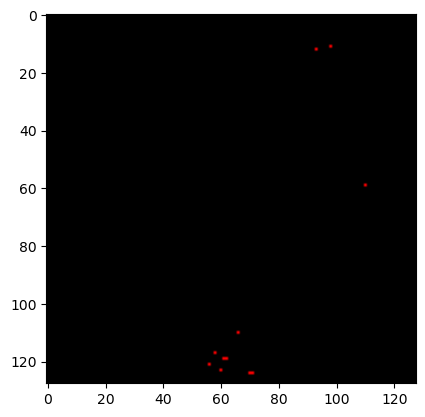

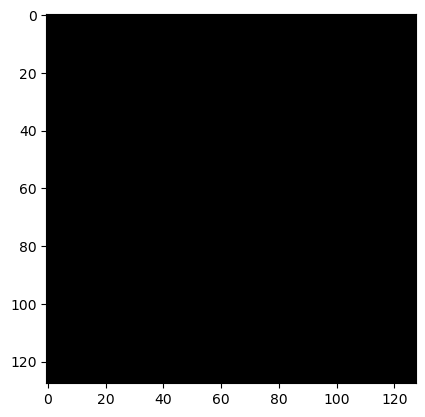

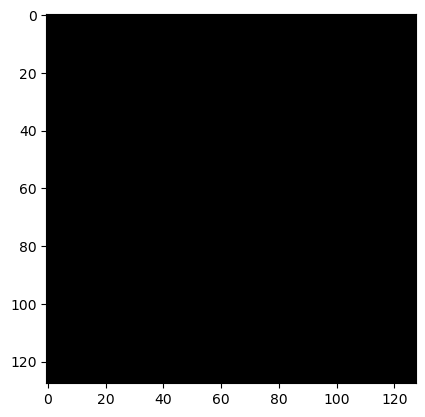

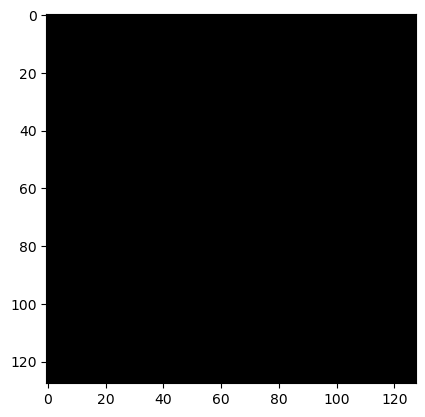

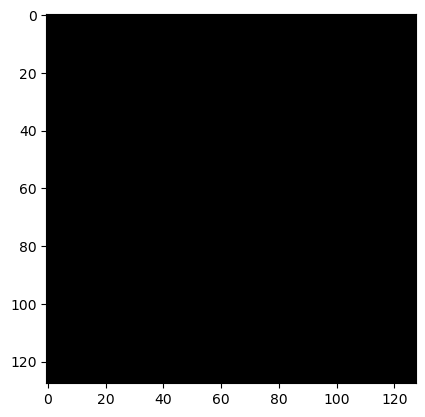

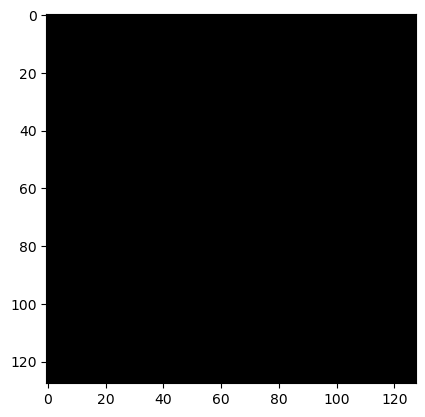

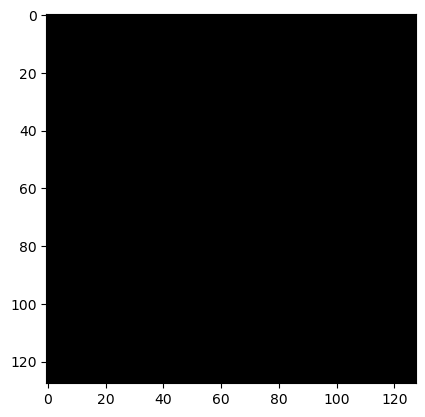

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

# EXPAND THE IMAGE AND CREATE AUGMENTED IMAGES - GÖRSELİ GENİŞLETİP ARTIRILMIŞ GÖRSELLER OLUŞTURMA
img_array = img_array.reshape((1, 128, 128, 3))

datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2],
    fill_mode='reflect'
)

for img_file in img_files:
    img_path = os.path.join(img_folder, img_file)
    img = Image.open(img_path)
    img = img.resize((128, 128))
    img_array = np.array(img) / 255.0
    img_array = img_array.reshape((1, 128, 128, 3))
    
    for batch in datagen.flow(img_array, batch_size=1):
        plt.imshow(batch[0])
        plt.show()
        break  

In [17]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,392,449 (28.20 MB)

 Trainable params: 7,392,449 (28.20 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
# PRINT THE SIZE OF THE IMAGE AND THE FIRST FEW PIXELS - GÖRÜNTÜNÜN BOYUTUNU VE İLK BİRKAÇ PİKSELİNİ YAZDIRMA
print(f"{img_name} size: {img_array.shape}")
print(f"First 5 pixels: {img_array[0, :5]}")

000474.jpg size: (1, 128, 128, 3)
First 5 pixels: [[[0.44705882 0.41568627 0.3254902 ]
  [0.45490196 0.42352941 0.33333333]
  [0.44705882 0.41568627 0.3254902 ]
  ...
  [0.43529412 0.40784314 0.29803922]
  [0.43529412 0.40392157 0.30196078]
  [0.43137255 0.4        0.30980392]]

 [[0.44705882 0.41568627 0.3254902 ]
  [0.45490196 0.42352941 0.33333333]
  [0.44705882 0.41568627 0.3254902 ]
  ...
  [0.43529412 0.40784314 0.29803922]
  [0.43529412 0.40392157 0.30196078]
  [0.43137255 0.4        0.30980392]]

 [[0.44705882 0.41568627 0.3254902 ]
  [0.45490196 0.42352941 0.33333333]
  [0.44705882 0.41568627 0.3254902 ]
  ...
  [0.43529412 0.40784314 0.29803922]
  [0.43529412 0.40392157 0.30196078]
  [0.43137255 0.4        0.30980392]]

 [[0.44705882 0.41568627 0.3254902 ]
  [0.45490196 0.42352941 0.33333333]
  [0.44705882 0.41568627 0.3254902 ]
  ...
  [0.43529412 0.40784314 0.29803922]
  [0.43529412 0.40392157 0.30196078]
  [0.43137255 0.4        0.30980392]]

 [[0.45098039 0.41960784 0.329